żródła danych: 
1. https://www.kaggle.com/datasets/sevgisarac/temperature-change
2. https://www.kaggle.com/datasets/brsdincer/all-natural-disasters-19002021-eosdis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
#wczytanie danych 
df = pd.read_csv('C:/Users/Agata/Desktop/Data science/projekt nr 2/DISASTERS/1900_2021_DISASTERS.csv')

temp_change = pd.read_csv('C:/Users/Agata/Desktop/Data science/projekt nr 2/temp_change.csv')
pd.set_option('display.max_columns', None)

In [3]:
df.head(20)

Year   Seq Glide Disaster Group Disaster Subgroup        Disaster Type  \
0   1900  9002   NaN        Natural    Climatological              Drought   
1   1900  9001   NaN        Natural    Climatological              Drought   
2   1902    12   NaN        Natural       Geophysical           Earthquake   
3   1902     3   NaN        Natural       Geophysical    Volcanic activity   
4   1902    10   NaN        Natural       Geophysical    Volcanic activity   
5   1903     6   NaN        Natural       Geophysical  Mass movement (dry)   
6   1903    12   NaN        Natural       Geophysical    Volcanic activity   
7   1904     3   NaN        Natural    Meteorological                Storm   
8   1905     5   NaN        Natural       Geophysical  Mass movement (dry)   
9   1905     3   NaN        Natural       Geophysical           Earthquake   
10  1906    14   NaN        Natural       Geophysical           Earthquake   
11  1906     2   NaN        Natural       Geophysical           Earthquake   
12  1906    23   NaN        Natural      Hydrological                Flood   
13  1906    24   NaN        Natural      Hydrological                Flood   
14  1906    15   NaN        Natural    Meteorological                Storm   
15  1907     6   NaN        Natural       Geophysical           Earthquake   
16  1907     1   NaN        Natural        Biological             Epidemic   
17  1908    11   NaN        Natural       Geophysical  Mass movement (dry)   
18  1909    10   NaN        Natural    Meteorological                Storm   
19  1909    13   NaN        Natural    Meteorological                Storm   

     Disaster Subtype Disaster Subsubtype      Event Name        Country  ISO  \
0             Drought                 NaN             NaN     Cabo Verde  CPV   
1             Drought                 NaN             NaN          India  IND   
2     Ground movement                 NaN             NaN      Guatemala  GTM   
3            Ash fall                 NaN     Santa Maria      Guatemala  GTM   
4            Ash fall                 NaN     Santa Maria      Guatemala  GTM   
5            Rockfall                 NaN             NaN         Canada  CAN   
6            Ash fall                 NaN  Mount Karthala  Comoros (the)  COM   
7    Tropical cyclone                 NaN             NaN     Bangladesh  BGD   
8            Rockfall                 NaN             NaN         Canada  CAN   
9     Ground movement                 NaN             NaN          India  IND   
10    Ground movement                 NaN             NaN          Chile  CHL   
11    Ground movement                 NaN             NaN       Colombia  COL   
12                NaN                 NaN             NaN        Belgium  BEL   
13                NaN                 NaN             NaN        Belgium  BEL   
14   Tropical cyclone                 NaN             NaN      Hong Kong  HKG   
15    Ground movement                 NaN             NaN          China  CHN   
16  Bacterial disease                 NaN         Bubonic          India  IND   
17          Landslide                 NaN             NaN         Canada  CAN   
18   Tropical cyclone                 NaN             NaN     Bangladesh  BGD   
19   Tropical cyclone                 NaN             NaN     Bangladesh  BGD   

              Region Continent                           Location Origin  \
0     Western Africa    Africa                        Countrywide    NaN   
1      Southern Asia      Asia                             Bengal    NaN   
2    Central America  Americas          Quezaltenango, San Marcos    NaN   
3    Central America  Americas                                NaN    NaN   
4    Central America  Americas                                NaN    NaN   
5   Northern America  Americas                     Frank, Alberta    NaN   
6     Eastern Africa    Africa                                NaN    NaN   
7      Southern Asia      Asia                         

In [4]:
df.isna().sum()

Year                              0
Seq                               0
Glide                         14545
Disaster Group                    0
Disaster Subgroup                 0
Disaster Type                     0
Disaster Subtype               3110
Disaster Subsubtype           15049
Event Name                    12265
Country                           0
ISO                               0
Region                            0
Continent                         0
Location                       1792
Origin                        12332
Associated Dis                12778
Associated Dis2               15419
OFDA Response                 14432
Appeal                        13557
Declaration                   12870
Aid Contribution              15449
Dis Mag Value                 11180
Dis Mag Scale                  1190
Latitude                      13397
Longitude                     13394
Local Time                    15023
River Basin                   14839
Start Year                  

In [5]:
df.columns


Index(['Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Insured Damages ('000 US$)',
       'Total Damages ('000 US$)', 'CPI', 'Adm Level', 'Admin1 Code',
       'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [6]:
#usuwanie kolumn nieprzydatnych do kolejnych analiz
df = df.drop(columns=['Local Time','No Injured','No Homeless','Glide', 'Disaster Subsubtype',
                    'Admin1 Code', 'Admin2 Code', 'River Basin', 'Latitude', 'Longitude', 'Associated Dis', 'Associated Dis2',
                    'Origin', 'OFDA Response', 'Dis Mag Scale', 'Geo Locations', 'Adm Level', "Insured Damages ('000 US$)",
                    'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value', 'CPI'
                    ])

In [7]:
df.isna().sum()

Year                            0
Seq                             0
Disaster Group                  0
Disaster Subgroup               0
Disaster Type                   0
Disaster Subtype             3110
Event Name                  12265
Country                         0
ISO                             0
Region                          0
Continent                       0
Location                     1792
Start Year                      0
Start Month                   387
Start Day                    3628
End Year                        0
End Month                     708
End Day                      3556
Total Deaths                 4713
No Affected                  6906
Total Affected               4509
Total Damages ('000 US$)    10881
dtype: int64

In [8]:
df

Year   Seq Disaster Group Disaster Subgroup      Disaster Type  \
0      1900  9002        Natural    Climatological            Drought   
1      1900  9001        Natural    Climatological            Drought   
2      1902    12        Natural       Geophysical         Earthquake   
3      1902     3        Natural       Geophysical  Volcanic activity   
4      1902    10        Natural       Geophysical  Volcanic activity   
...     ...   ...            ...               ...                ...   
16121  2021   449        Natural      Hydrological              Flood   
16122  2021    75        Natural      Hydrological              Flood   
16123  2021   599        Natural        Biological           Epidemic   
16124  2021    20        Natural      Hydrological              Flood   
16125  2021   481        Natural      Hydrological              Flood   

      Disaster Subtype   Event Name                                 Country  \
0              Drought          NaN                              Cabo Verde   
1              Drought          NaN                                   India   
2      Ground movement          NaN                               Guatemala   
3             Ash fall  Santa Maria                               Guatemala   
4             Ash fall  Santa Maria                               Guatemala   
...                ...          ...                                     ...   
16121              NaN          NaN                                   Yemen   
16122              NaN          NaN                            South Africa   
16123    Viral disease   Meningitis  Congo (the Democratic Republic of the)   
16124              NaN          NaN                                  Serbia   
16125              NaN          NaN                             South Sudan   

       ISO           Region Continent  \
0      CPV   Western Africa    Africa   
1      IND    Southern Asia      Asia   
2      GTM  Central America  Americas   
3      GTM  Central America  Americas   
4      GTM  Central America  Americas   
...    ...              ...       ...   
16121  YEM     Western Asia      Asia   
16122  ZAF  Southern Africa    Africa   
16123  COD    Middle Africa    Africa   
16124  SRB  Southern Europe    Europe   
16125  SSD  Northern Africa    Africa   

                                                Location  Start Year  \
0                                            Countrywide        1900   
1                                                 Bengal        1900   
2                              Quezaltenango, San Marcos        1902   
3                                                    NaN        1902   
4                                                    NaN        1902   
...                                                  ...         ...   
16121  Dhamar, Amran, Al Mahwit, Marib, Ibb, Sana’a C...        2021   
16122  Mpumalanga Province, Free State Province and t...        2021   
16123                                    Tshopo province        2021   
16124  Zitoradja (Toplicki), Doljevac (Nisavski) , Di...        2021   
16125  Mayendit County (Unity); Ayod, Fangak Counties...        2021   

       Start Month  Start Day  End Year  End Month  End Day  Total Deaths  \
0              NaN        NaN      1900        NaN      NaN       11000.0   
1              NaN        NaN      1900        NaN      NaN     1250000.0   
2              4.0       18.0      1902        4.0     18.0        2000.0   
3              4.0        8.0      1902        4.0      8.0        1000.0   
4             10.0       24.0      1902       10.0     24.0        6000.0   
...            ...        ...       ...        ...      ...           ...   
16121          7.0       16.0      2021        8.0      7.0          11.0   
16122          2.0        1.0      2021        2.0     15.0          31.0   
16123          9.0        7.0      2021        9.0     13.0         131.0   
16124          1.0       11.0      2021        1.0   

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      16126 non-null  int64  
 1   Seq                       16126 non-null  int64  
 2   Disaster Group            16126 non-null  object 
 3   Disaster Subgroup         16126 non-null  object 
 4   Disaster Type             16126 non-null  object 
 5   Disaster Subtype          13016 non-null  object 
 6   Event Name                3861 non-null   object 
 7   Country                   16126 non-null  object 
 8   ISO                       16126 non-null  object 
 9   Region                    16126 non-null  object 
 10  Continent                 16126 non-null  object 
 11  Location                  14334 non-null  object 
 12  Start Year                16126 non-null  int64  
 13  Start Month               15739 non-null  float64
 14  Start 

In [10]:
pd.DataFrame.shape

In [11]:
# sprawdzamy czy mamy jakies duplikaty w danych
df.duplicated().sum()

0

In [12]:
# sprawdzamy dane statystyczne
df.describe()


Year           Seq   Start Year   Start Month     Start Day  \
count  16126.000000  16126.000000  16126.00000  15739.000000  12498.000000   
mean    1996.764790    714.784820   1996.77837      6.444374     15.233957   
std       20.159065   1929.635089     20.15571      3.393965      8.953821   
min     1900.000000      1.000000   1900.00000      1.000000      1.000000   
25%     1989.000000     93.000000   1989.00000      4.000000      7.000000   
50%     2001.000000    270.000000   2001.00000      7.000000     15.000000   
75%     2011.000000    486.000000   2011.00000      9.000000     23.000000   
max     2021.000000   9881.000000   2021.00000     12.000000     31.000000   

           End Year     End Month       End Day  Total Deaths   No Affected  \
count  16126.000000  15418.000000  12570.000000  1.141300e+04  9.220000e+03   
mean    1996.835607      6.576728     15.775020  2.842866e+03  8.823612e+05   
std       20.143010      3.352965      8.865486  6.860595e+04  8.573913e+06   
min     1900.000000      1.000000      1.000000  1.000000e+00  1.000000e+00   
25%     1989.000000      4.000000      8.000000  6.000000e+00  1.244750e+03   
50%     2001.000000      7.000000     16.000000  2.000000e+01  1.000000e+04   
75%     2011.000000      9.000000     23.000000  6.300000e+01  9.182300e+04   
max     2021.000000     12.000000     31.000000  3.700000e+06  3.300000e+08   

       Total Affected  Total Damages ('000 US$)  
count    1.161700e+04              5.245000e+03  
mean     7.165088e+05              7.247835e+05  
std      7.718598e+06              4.723131e+06  
min      1.000000e+00              2.000000e+00  
25%      6.500000e+02              8.300000e+03  
50%      5.965000e+03              6.000000e+04  
75%      5.825500e+04              3.173000e+05  
max      3.300000e+08              2.100000e+08

In [13]:
# Tworzymy kopie 
df_clean = df.copy()

In [14]:
#nazwy kolumn bez spacji
df_clean.columns = df_clean.columns.str.replace(' ','')
#dane powyżej 1961 roku
df_1961 = df_clean.query('Year>=1961')
#dane powyżej 1961 roku oraz do 2020 roku
df_1961_2020 = df_1961.query('Year<=2020')
#wypisanie kolumn 
df_1961.columns

Index(['Year', 'Seq', 'DisasterGroup', 'DisasterSubgroup', 'DisasterType',
       'DisasterSubtype', 'EventName', 'Country', 'ISO', 'Region', 'Continent',
       'Location', 'StartYear', 'StartMonth', 'StartDay', 'EndYear',
       'EndMonth', 'EndDay', 'TotalDeaths', 'NoAffected', 'TotalAffected',
       'TotalDamages('000US$)'],
      dtype='object')

In [15]:
#wypisanie DisasterType
df_1961['DisasterType'].unique()

array(['Storm', 'Drought', 'Earthquake', 'Landslide', 'Flood',
       'Extreme temperature ', 'Volcanic activity', 'Epidemic',
       'Wildfire', 'Mass movement (dry)', 'Insect infestation', 'Impact',
       'Animal accident', 'Glacial lake outburst'], dtype=object)

In [16]:
df_1961.loc[(df_1961['DisasterType']=='Animal accident')]
#df_2000_dw = df_2000.loc[(df_2000['DisasterType']  == 'Drought')


Year  Seq DisasterGroup DisasterSubgroup     DisasterType  \
13456  2014  461       Natural       Biological  Animal accident   

      DisasterSubtype EventName      Country  ISO          Region Continent  \
13456             NaN       NaN  Niger (the)  NER  Western Africa    Africa   

          Location  StartYear  StartMonth  StartDay  EndYear  EndMonth  \
13456  Near Niamey       2014        11.0      17.0     2014      11.0   

       EndDay  TotalDeaths  NoAffected  TotalAffected  TotalDamages('000US$)  
13456    17.0         12.0         5.0            5.0                    NaN

In [17]:
#wypisanie DisasterSubgroup
df_1961['DisasterSubgroup'].unique()


array(['Meteorological', 'Climatological', 'Geophysical', 'Hydrological',
       'Biological', 'Extra-terrestrial'], dtype=object)

c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


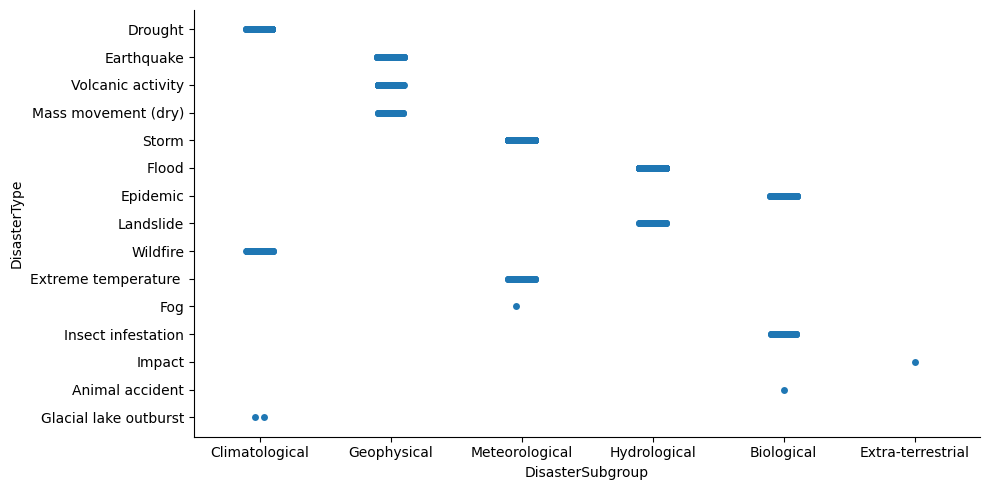

In [18]:
# wykres pokazuje co zawierają Disaster Subgroup, czyli jakie Disaster Typ mamy w danych Disaster Subgroup
sns.catplot(data = df_clean,x = 'DisasterSubgroup',  y = 'DisasterType', kind='strip', height=5, aspect=2,);

c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


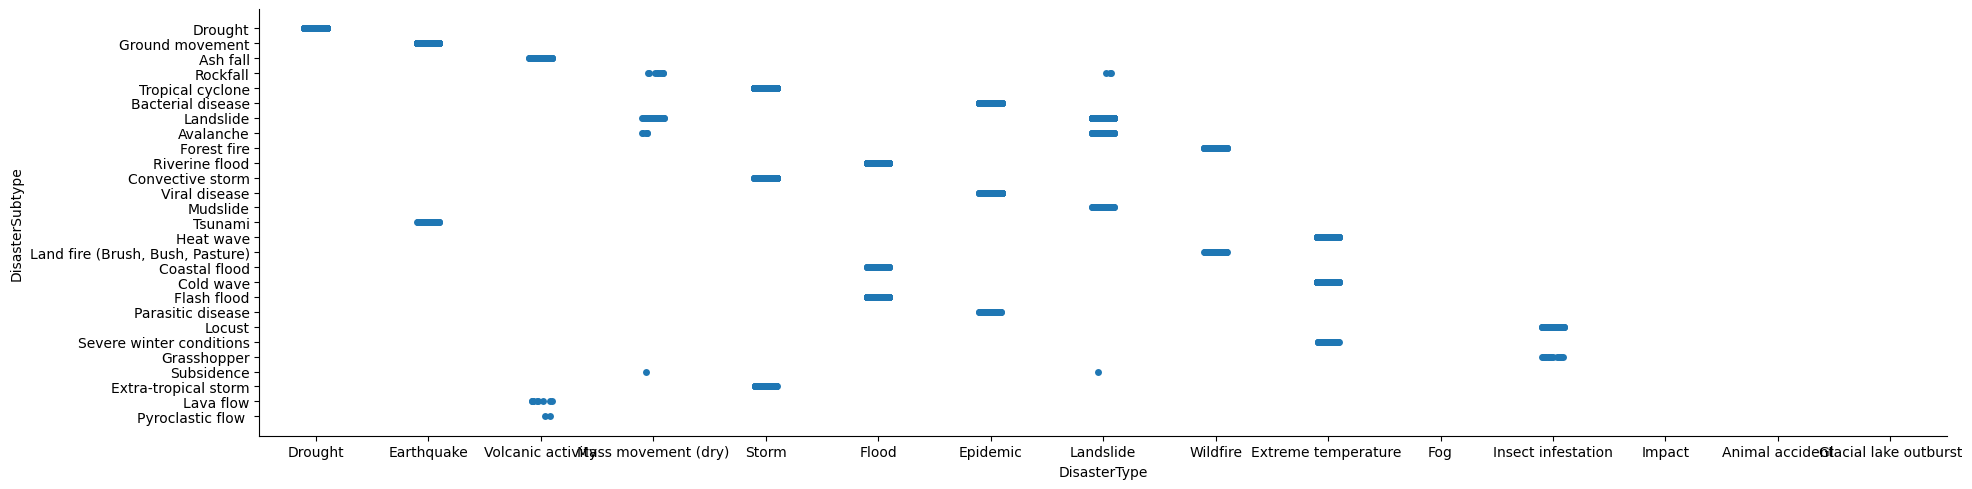

In [19]:
# wykres pokazuje co zaweirają Disaster Subtype, czyli jakie Disaster Typ mamy w danych Disaster Subtype
sns.catplot(data = df_clean,x = 'DisasterType',  y = 'DisasterSubtype', kind='strip', height=5, aspect=3.95);

In [20]:
# funkcja do tworzenia nowych df z podzbiorem wybranych disastertype 
def FilterByDisasterType(df, DisasterType_list):
   name_new = pd.DataFrame()
   for type in DisasterType_list:
      temp = df[(df['DisasterType'] == type)]
      name_new = pd.concat([name_new,temp])
   return name_new


In [21]:
# df do map i porównania tabel
DisasterType_list =['Storm', 'Drought', 'Earthquake', 'Landslide', 'Flood',
       'Extreme temperature ', 'Volcanic activity', 'Epidemic',
       'Wildfire', 'Mass movement (dry)', 'Insect infestation']

df_1961_tableau = FilterByDisasterType(df_1961, DisasterType_list)

df_1961_2020_tableau = FilterByDisasterType(df_1961_2020, DisasterType_list)

#tabela zawiera zjawiska z DisasterSubgroup : Meteorological, Climatological, Hydrological
df_1961_mch=df_1961.loc[(df_1961['DisasterSubgroup']  == 'Meteorological') | (df_1961['DisasterType'] == 'Climatological') | (df_1961['DisasterType'] == ' Hydrological')]

# tabela zawiera DisasterSubgroup : Climatological, czyli DisasterType: ['Drought', 'Wildfire', 'Glacial lake outburst']
df_1961_Climatological=df_1961[df_1961["DisasterSubgroup"].isin(["Climatological"])]

# tabela zawiera DisasterType: drought i wildfire
DisasterType_list =['Drought','Wildfire']
df_1961_dw = FilterByDisasterType(df_1961, DisasterType_list)

# tabela zawiera DisasterType: drought i wildfire po 2000
df_2000 = df_clean.query('Year>=2000')
DisasterType_list =['Drought','Wildfire']
df_2000_dw = FilterByDisasterType(df_2000, DisasterType_list)

# tabela zawiera DisasterType: drought i wildfire ['Storm', 'Drought', 'Earthquake', 'Landslide', 'Flood', 'Extreme temperature ', 'Volcanic activity','Wildfire', 'Mass movement (dry)', 'Insect infestation',]
DisasterType_list =['Storm', 'Drought', 'Earthquake', 'Landslide', 'Flood',
       'Extreme temperature ', 'Volcanic activity',
       'Wildfire', 'Mass movement (dry)', 'Insect infestation']

df_1961_aa=FilterByDisasterType(df_1961, DisasterType_list)

#TABELE DO 2020 ROKU 

# tabela zawiera DisasterType: drought i wildfire
DisasterType_list =[ 'Drought', 'Wildfire']

df_1961_2020_dw = FilterByDisasterType(df_1961_2020, DisasterType_list)

# tabela zawiera DisasterType: ['Storm', 'Earthquake', 'Landslide', 'Flood', 'Extreme temperature ', 'Volcanic activity', 'Mass movement (dry)', 'Insect infestation'] bez: drought i wildfire
DisasterType_list =['Storm', 'Earthquake', 'Landslide', 'Flood',
       'Extreme temperature ', 'Volcanic activity', 'Epidemic',
        'Mass movement (dry)', 'Insect infestation']

df_1961_2020_aa2 = FilterByDisasterType(df_1961_2020, DisasterType_list)


# tabela zawiera DisasterType: [ 'Earthquake', 'Landslide',  'Extreme temperature ', 'Volcanic activity', 'Mass movement (dry)', 'Insect infestation'] bez: drought i wildfire, 'Storm', 'Flood',
DisasterType_list =[ 'Earthquake', 'Landslide',
       'Extreme temperature ', 'Volcanic activity', 'Epidemic',
        'Mass movement (dry)', 'Insect infestation']

df_1961_2020_aa3 = FilterByDisasterType(df_1961_2020, DisasterType_list)


In [22]:
# zapis df na potrzeby tableau
#df_1961_2020_tableau.to_csv('C:/Users/Agata/Desktop/Data science/projekt nr 2/df_1961_2020_tableau.csv')
#df_1961_tableau.to_csv('C:/Users/Agata/Desktop/Data science/projekt nr 2/df_1961_tableau.csv')

In [23]:
# zapis tabeli 
#df_1961_Climatological.to_csv('C:/Users/Agata/Desktop/Data science/df_1961_Climatological.csv')

In [24]:
# wypisanie DisasterType 
df_1961_Climatological['DisasterType'].unique()

array(['Drought', 'Wildfire', 'Glacial lake outburst'], dtype=object)

In [25]:
# zliczenie ilości drought i wildfire łącznie w odniesieniu do kontynentów
df_1961_dw.groupby('Continent')[['DisasterGroup']].count()


DisasterGroup
Continent               
Africa               352
Americas             330
Asia                 275
Europe               164
Oceania               76

In [26]:
# zliczenie ilości drought i wildfire łącznie w odniesieniu do danego roku
df_1961_dw.groupby('Year')[['DisasterGroup']].count()


DisasterGroup
Year               
1961              1
1963              1
1964              7
1965              8
1966             10
1967              7
1968             10
1969             16
1970              5
1971              8
1972              7
1973              6
1974              6
1975              3
1976             11
1977             15
1978             11
1979             15
1980             28
1981             22
1982              9
1983             38
1984             13
1985             16
1986             10
1987             23
1988             17
1989             10
1990             24
1991             20
1992             19
1993             11
1994             25
1995             13
1996             12
1997             33
1998             38
1999             48
2000             55
2001             36
2002             46
2003             28
2004             19
2005             33
2006             18
2007             29
2008             21
2009             27
2010             28
2011             24
2012             24
2013             19
2014             24
2015             40
2016             24
2017             27
2018             27
2019             29
2020             17
2021             26

In [27]:
#zliczenie ilości wszystkich katastrof łącznie w odniesieniu do roku
df_1961.groupby('Year')[['DisasterGroup']].count()

DisasterGroup
Year               
1961             29
1962             29
1963             44
1964             63
1965             68
...             ...
2017            371
2018            338
2019            442
2020            398
2021            315

[61 rows x 1 columns]

In [28]:
# zliczenie ['Drought', 'Wildfire', 'Glacial lake outburst'] łącznie w każdym roku 
df_1961_Climatological.groupby('Year')[['DisasterGroup']].count()

DisasterGroup
Year               
1961              1
1963              1
1964              7
1965              8
1966             10
1967              7
1968             10
1969             16
1970              5
1971              8
1972              7
1973              6
1974              6
1975              3
1976             11
1977             15
1978             11
1979             15
1980             28
1981             22
1982              9
1983             38
1984             13
1985             16
1986             10
1987             23
1988             17
1989             10
1990             24
1991             20
1992             19
1993             11
1994             25
1995             13
1996             12
1997             33
1998             38
1999             48
2000             55
2001             36
2002             46
2003             28
2004             19
2005             33
2006             18
2007             29
2008             21
2009             27
2010             28
2011             24
2012             24
2013             19
2014             24
2015             40
2016             24
2017             27
2018             27
2019             29
2020             17
2021             28

In [29]:
# analiza danych ['Drought', 'Wildfire', 'Glacial lake outburst'] dla Polski 
df_1961_Climatological.loc[(df_1961_Climatological['Country']  == 'Poland')]

Year   Seq DisasterGroup DisasterSubgroup DisasterType DisasterSubtype  \
3050   1983   377       Natural   Climatological     Wildfire     Forest fire   
4620   1992   218       Natural   Climatological     Wildfire     Forest fire   
14655  2018  9187       Natural   Climatological      Drought         Drought   

      EventName Country  ISO          Region Continent  \
3050        NaN  Poland  POL  Eastern Europe    Europe   
4620        NaN  Poland  POL  Eastern Europe    Europe   
14655       NaN  Poland  POL  Eastern Europe    Europe   

                                             Location  StartYear  StartMonth  \
3050                                              NaN       1983         8.0   
4620   Gdansk, Szczecin, Bydgoszcz, Katowice, Liegnit       1992         7.0   
14655                                             NaN       2018         6.0   

       StartDay  EndYear  EndMonth  EndDay  TotalDeaths  NoAffected  \
3050        3.0     1983       8.0     3.0          NaN         NaN   
4620        1.0     1992       8.0    18.0         35.0         NaN   
14655       NaN     2018       7.0     NaN          NaN         NaN   

       TotalAffected  TotalDamages('000US$)  
3050             NaN                    NaN  
4620             NaN                    NaN  
14655            NaN                    NaN

In [30]:
# analiza wszystkich katastrof dla Polski 
df_1961.loc[(df_1961['Country']  == 'Poland')]

Year   Seq DisasterGroup DisasterSubgroup          DisasterType  \
1815   1977   101       Natural     Hydrological                 Flood   
2819   1980    60       Natural     Hydrological                 Flood   
2968   1982   307       Natural      Geophysical            Earthquake   
2969   1982     3       Natural     Hydrological                 Flood   
3049   1983    12       Natural   Meteorological                 Storm   
3050   1983   377       Natural   Climatological              Wildfire   
3354   1987    91       Natural     Hydrological                 Flood   
4402   1990   717       Natural   Meteorological                 Storm   
4620   1992   218       Natural   Climatological              Wildfire   
4764   1994    15       Natural   Meteorological                 Storm   
6267   1997   143       Natural     Hydrological                 Flood   
6268   1997     7       Natural   Meteorological  Extreme temperature    
6370   1998   225       Natural     Hydrological                 Flood   
7168   1998   378       Natural   Meteorological  Extreme temperature    
7250   1999   590       Natural   Meteorological                 Storm   
7251   1999   613       Natural   Meteorological  Extreme temperature    
7388   2000   830       Natural   Meteorological  Extreme temperature    
8188   2001   390       Natural     Hydrological                 Flood   
8189   2001   661       Natural   Meteorological  Extreme temperature    
8395   2002   678       Natural   Meteorological                 Storm   
8396   2002   754       Natural   Meteorological  Extreme temperature    
8397   2002    59       Natural   Meteorological                 Storm   
9258   2004   369       Natural     Hydrological                 Flood   
9353   2005    45       Natural   Meteorological                 Storm   
9377   2005   131       Natural     Hydrological                 Flood   
9378   2005    11       Natural   Meteorological                 Storm   
9904   2005   713       Natural   Meteorological  Extreme temperature    
10159  2006   302       Natural     Hydrological                 Flood   
10276  2007    19       Natural   Meteorological                 Storm   
10853  2007   391       Natural   Meteorological                 Storm   
11051  2008    82       Natural   Meteorological                 Storm   
11052  2008   633       Natural   Meteorological  Extreme temperature    
11142  2009   228       Natural     Hydrological                 Flood   
11693  2009   273       Natural   Meteorological                 Storm   
11694  2009   571       Natural   Meteorological  Extreme temperature    
11762  2010   380       Natural     Hydrological                 Flood   
11763  2010   193       Natural     Hydrological                 Flood   
11853  2010   615       Natural   Meteorological  Extreme temperature    
12559  2011   628       Natural   Meteorological  Extreme temperature    
12687  2012   206       Natural   Meteorological                 Storm   
12688  2012    19       Natural   Meteorological  Extreme temperature    
12689  2012   413       Natural   Meteorological  Extreme temperature    
12690  2012   485       Natural   Meteorological  Extreme temperature    
12846  2013   517       Natural   Meteorological                 Storm   
12847  2013   165       Natural   Meteorological  Extreme temperature    
12893  2014    30       Natural   Meteorological  Extreme temperature    
13649  2015   263       Natural   Meteorological                 Storm   
13650  2015   577       Natural   Meteorological  Extreme temperature    
13708  2016   179       Natural     Hydrological                 Flood   
13762  2016     1       Natural   Meteorological  Extreme temperature    
14495  2017   341       Natural   Meteorological                 Storm   
14654  2018    61       Natural   Meteorological  Extreme temperature    
14655  2018  9187       Natural   Climatological               Drought   
15473  2019

c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1075: Fu

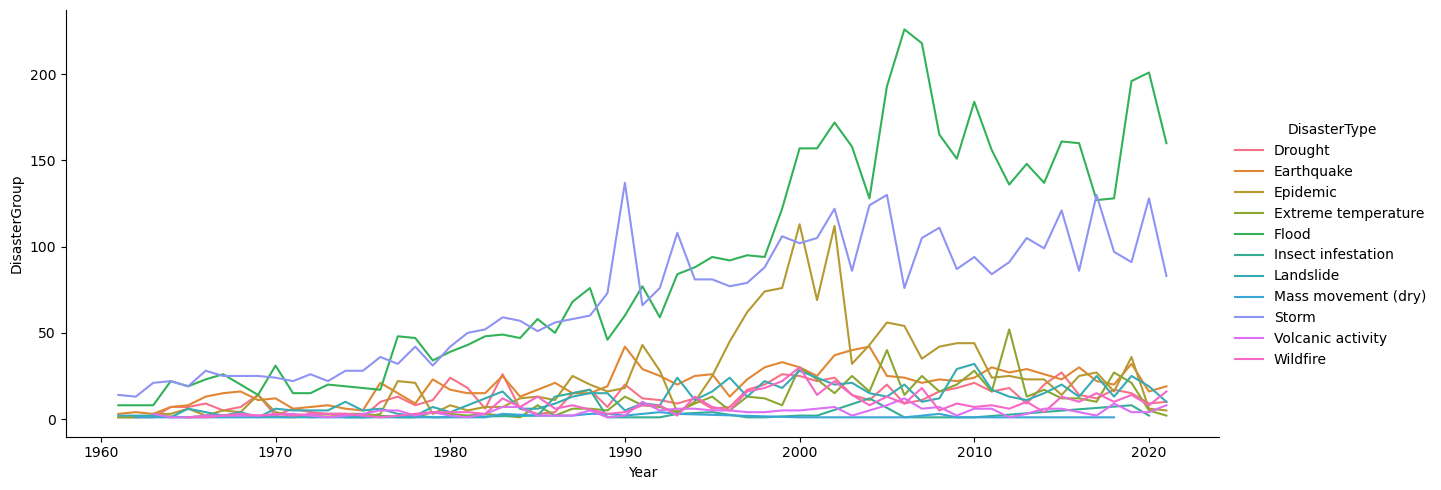

In [31]:
df_1961_tableau.groupby(['DisasterType','Year'])[['DisasterGroup']].count()
sns.relplot(data = df_1961_tableau.groupby(['DisasterType','Year'])[['DisasterGroup']].count(), x = 'Year', y = 'DisasterGroup', hue="DisasterType", kind  = 'line', height= 5, aspect=2.5)

In [32]:
df_1961_ins = df_1961_2020[(df_1961_2020['DisasterType']  == 'Storm')]
df_1961_ins

Year  Seq DisasterGroup DisasterSubgroup DisasterType  \
297    1961    4       Natural   Meteorological        Storm   
298    1961    5       Natural   Meteorological        Storm   
299    1961   46       Natural   Meteorological        Storm   
300    1961   13       Natural   Meteorological        Storm   
304    1961   53       Natural   Meteorological        Storm   
...     ...  ...           ...              ...          ...   
16053  2020  307       Natural   Meteorological        Storm   
16054  2020  425       Natural   Meteorological        Storm   
16055  2020  462       Natural   Meteorological        Storm   
16056  2020  558       Natural   Meteorological        Storm   
16057  2020  132       Natural   Meteorological        Storm   

        DisasterSubtype                              EventName     Country  \
297    Tropical cyclone                                    NaN  Bangladesh   
298    Tropical cyclone                                    NaN  Bangladesh   
299                 NaN                                    NaN  Bangladesh   
300    Tropical cyclone                                 Hattie      Belize   
304    Tropical cyclone                                    NaN      Greece   
...                 ...                                    ...         ...   
16053  Tropical cyclone             Tropical cyclone 'Sinlaku'    Viet Nam   
16054  Tropical cyclone         Tropical storm 'Nangka' (Nika)    Viet Nam   
16055  Tropical cyclone           Tropical storm 'Noul' (Leon)    Viet Nam   
16056  Tropical cyclone  Tropical depression 'Vicky' (Krovanh)    Viet Nam   
16057  Tropical cyclone                       Cyclone 'Harold'     Vanuatu   

       ISO              Region Continent  \
297    BGD       Southern Asia      Asia   
298    BGD       Southern Asia      Asia   
299    BGD       Southern Asia      Asia   
300    BLZ     Central America  Americas   
304    GRC     Southern Europe    Europe   
...    ...                 ...       ...   
16053  VNM  South-Eastern Asia      Asia   
16054  VNM  South-Eastern Asia      Asia   
16055  VNM  South-Eastern Asia      Asia   
16056  VNM  South-Eastern Asia      Asia   
16057  VUT           Melanesia   Oceania   

                                                Location  StartYear  \
297                                       Megna Eestuary       1961   
298                                           Chittagong       1961   
299                                                  NaN       1961   
300                              Belize city other towns       1961   
304                                                  NaN       1961   
...                                                  ...        ...   
16053                    Hoa Binh, Quang Ninh Provinces        2020   
16054          Nam Dinh, Ninh Bình, Thanh Hóa provinces        2020   
16055                                            Da Nang       2020   
16056                                                NaN       2020   
16057   Pentecost, Espiritu Santo, Penama, Sanma, Mal...       2020   

       StartMonth  StartDay  EndYear  EndMonth  EndDay  TotalDeaths  \
297           5.0       9.0     1961       5.0     9.0      11000.0   
298           5.0      30.0     1961       5.0    30.0          NaN   
299           3.0       NaN     1961       3.0     NaN        266.0   
300          10.0      30.0     1961      10.0    31.0        275.0   
304          11.0       NaN     1961      11.0     NaN         43.0   
...           ...       ...      ...       ...     ...          ...   
16053         7.0      29.0     2020       7.0    30.0          2.0   
16054        10.0      13.0     2020      10.0    14.0          2.0   
16055         9.0      18.0     2020       9.0    21.0          6.0   
16056        12.0      21.0     2020      12.0    21.0          1.0   
16057         4.0       4.0     2020       4.0     5.0          5.0   

       NoAffected  TotalAffected  TotalDamages('000US$)  
297     

In [33]:
# df_1961_tableau
df_1961[(df_1961['DisasterType']  == 'Storm')]

Year  Seq DisasterGroup DisasterSubgroup DisasterType  \
297    1961    4       Natural   Meteorological        Storm   
298    1961    5       Natural   Meteorological        Storm   
299    1961   46       Natural   Meteorological        Storm   
300    1961   13       Natural   Meteorological        Storm   
304    1961   53       Natural   Meteorological        Storm   
...     ...  ...           ...              ...          ...   
16098  2021  211       Natural   Meteorological        Storm   
16101  2021  166       Natural   Meteorological        Storm   
16115  2021  373       Natural   Meteorological        Storm   
16117  2021  171       Natural   Meteorological        Storm   
16119  2021  595       Natural   Meteorological        Storm   

        DisasterSubtype                           EventName  \
297    Tropical cyclone                                 NaN   
298    Tropical cyclone                                 NaN   
299                 NaN                                 NaN   
300    Tropical cyclone                              Hattie   
304    Tropical cyclone                                 NaN   
...                 ...                                 ...   
16098  Convective storm                                 NaN   
16101  Convective storm                                 NaN   
16115  Tropical cyclone                    Hurricane 'Elsa'   
16117  Convective storm                                 NaN   
16119  Tropical cyclone  Tropical cyclone 'Conson' (Jolina)   

                                Country  ISO              Region Continent  \
297                          Bangladesh  BGD       Southern Asia      Asia   
298                          Bangladesh  BGD       Southern Asia      Asia   
299                          Bangladesh  BGD       Southern Asia      Asia   
300                              Belize  BLZ     Central America  Americas   
304                              Greece  GRC     Southern Europe    Europe   
...                                 ...  ...                 ...       ...   
16098    United States of America (the)  USA    Northern America  Americas   
16101    United States of America (the)  USA    Northern America  Americas   
16115  Saint Vincent and the Grenadines  VCT           Caribbean  Americas   
16117                          Viet Nam  VNM  South-Eastern Asia      Asia   
16119                          Viet Nam  VNM  South-Eastern Asia      Asia   

                                    Location  StartYear  StartMonth  StartDay  \
297                           Megna Eestuary       1961         5.0       9.0   
298                               Chittagong       1961         5.0      30.0   
299                                      NaN       1961         3.0       NaN   
300                  Belize city other towns       1961        10.0      30.0   
304                                      NaN       1961        11.0       NaN   
...                                      ...        ...         ...       ...   
16098  Southern Louisiana and the Gulf Coast       2021         4.0      13.0   
16101         Louisiana, Alabama,Mississippi       2021         3.0      16.0   
16115           Northern half of St. Vincent       2021         7.0       2.0   
16117                                    NaN       2021         3.0      22.0   
16119                                    NaN       2021         9.0      12.0   

       EndYear  EndMonth  EndDay  TotalDeaths  NoAffected  TotalAffected  \
297       1961       5.0     9.0      11000.0         NaN            NaN   
298       1961       5.0    30.0          NaN         NaN            NaN   
299       1961       3.0     NaN        266.0         NaN            NaN   
300       1961      10.0    31.0        275.0         NaN            NaN   
304       1961      11.0     NaN         43.0         NaN            NaN   
...        ...       ...     ...          ...         ...            ...   
16098     2021       4.0    15.0       

In [34]:
df_group=df_1961_2020.groupby(['DisasterType','Year'])[['DisasterGroup']].count()
df_group

DisasterGroup
DisasterType    Year               
Animal accident 2014              1
Drought         1961              1
                1963              1
                1964              7
                1965              7
...                             ...
Wildfire        2016             10
                2017             15
                2018             10
                2019             14
                2020              8

[568 rows x 1 columns]

In [35]:
df_1961_2020.columns


Index(['Year', 'Seq', 'DisasterGroup', 'DisasterSubgroup', 'DisasterType',
       'DisasterSubtype', 'EventName', 'Country', 'ISO', 'Region', 'Continent',
       'Location', 'StartYear', 'StartMonth', 'StartDay', 'EndYear',
       'EndMonth', 'EndDay', 'TotalDeaths', 'NoAffected', 'TotalAffected',
       'TotalDamages('000US$)'],
      dtype='object')

In [36]:
#funkcja rysująca wykresy, pogrupowanie po 10 lat 

def FilterByDisasterType(DisasterType_list, df_draw):
    df_1961_draw = pd.DataFrame()
    for type in DisasterType_list:
       temp = df_draw[(df_draw['DisasterType'] == type)]
       df_1961_draw = pd.concat([df_1961_draw,temp])
    return df_1961_draw

def CountByYear(DF):
    #pogrupowanie po rodzajach katastrof i latach - zlicza sumy wszystkich katastrof osobno w każdytm roku 
    df_group=DF.groupby(['DisasterType','Year'])[['DisasterGroup']].count()
    df_group = df_group.rename(columns={'DisasterGroup' : 'Number Of Disasters'} )
    return df_group

    # stworzenie listy buckets po 10 lat 
def GroupBy10(df_group):
    group_list_10 = []
    for item in df_group['Number Of Disasters'].items():
        group = round(((item[0][1]-5.1)/10))
        result = str(group*10+5)
        group_list_10.append(result)
    return group_list_10

def GroupBy10B(DF):
    df_group=DF.groupby(['DisasterType','Year'])[['Number Of Disasters']].count()
    a = 1965, 1975, 1985, 1995, 2005, 2015 
    group_list_10 = sorted (a *10) * len((df_group['DisasterType']).unique())
    return group_list_10

#utworzenie nowego df z dodaną kolumną bucket 
def AddColumn(df_group, group_list_10):
    df_group.insert(0,'Years', group_list_10)

def Draw(df_group_ready):
    sns.relplot(data = df_group_ready, x = 'Years', y = 'Number Of Disasters', hue="DisasterType", kind  = 'line', height= 5, aspect=1.5)

def RelplotBy10Year(DisasterType_list, df_draw):

    DF = FilterByDisasterType(DisasterType_list, df_draw)
    
    df_group = CountByYear(DF)
    group_list_10 = GroupBy10(df_group)
    AddColumn(df_group, group_list_10)
    #pogrupowanie nowego df po buckets oraz DisasterType - zlicza średnią wszystkich katastrof osobno w każdym przedziale 10 lat  
    df_group_ready=df_group.groupby(['Years','DisasterType'])[['Number Of Disasters']].mean()
    #wyświetlenie nowego df z pogrupowaniem co 10 lat 
    Draw(df_group_ready)



c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1075: Fu

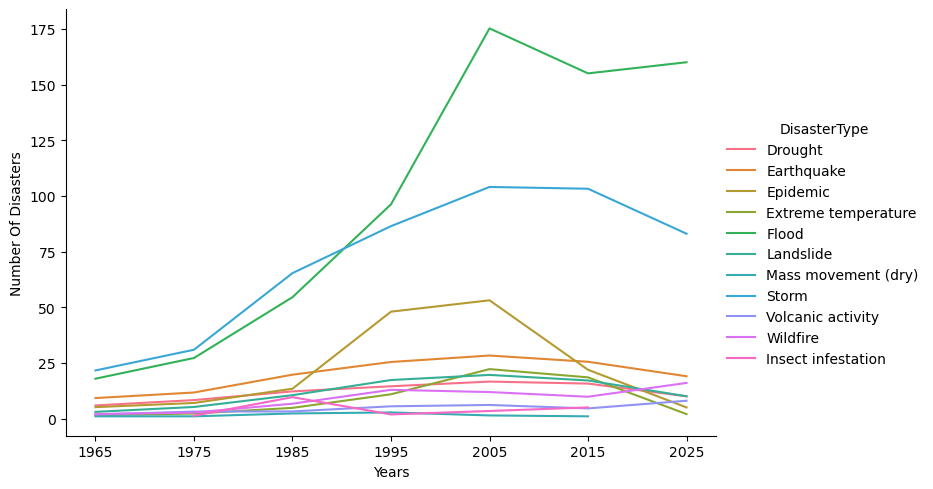

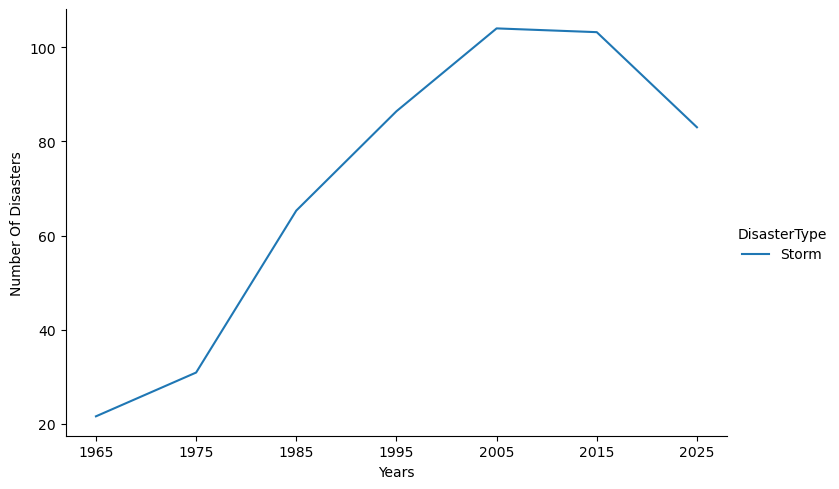

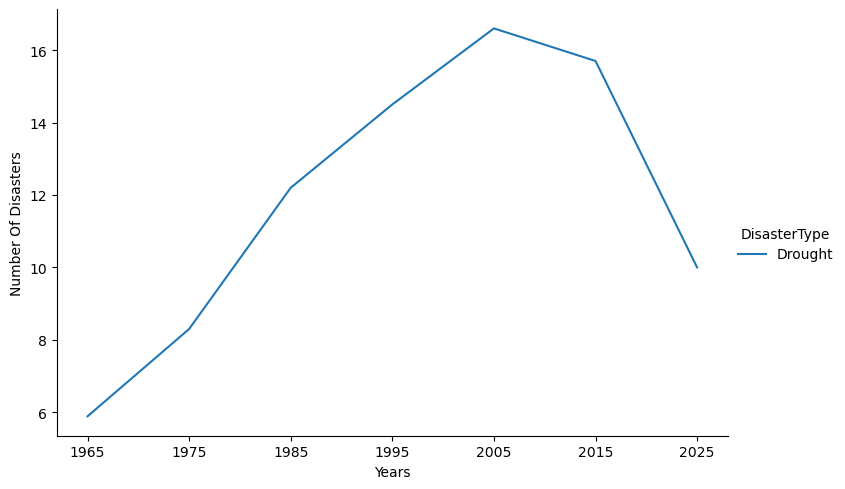

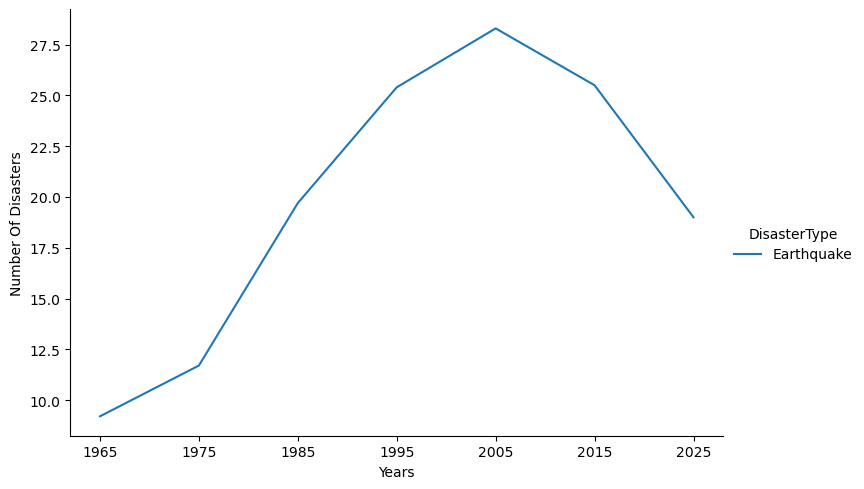

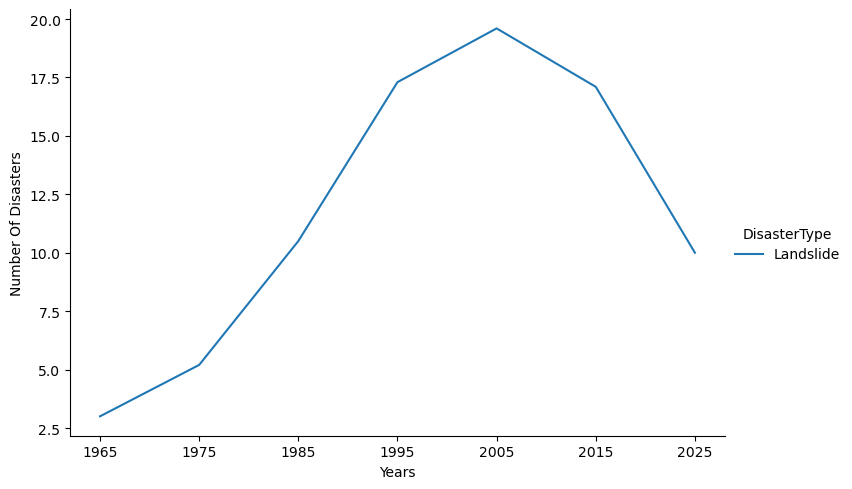

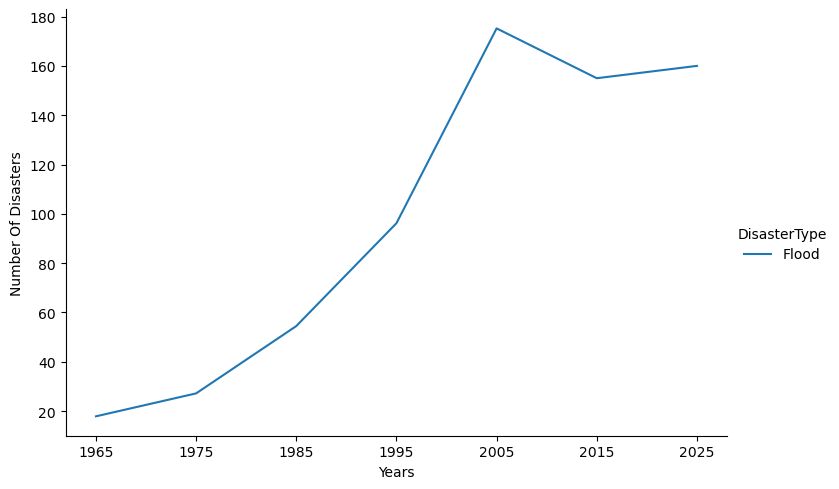

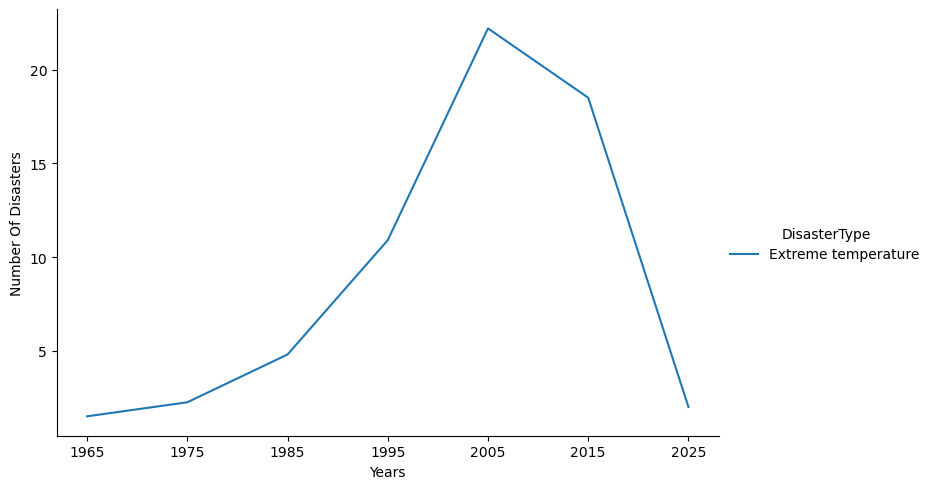

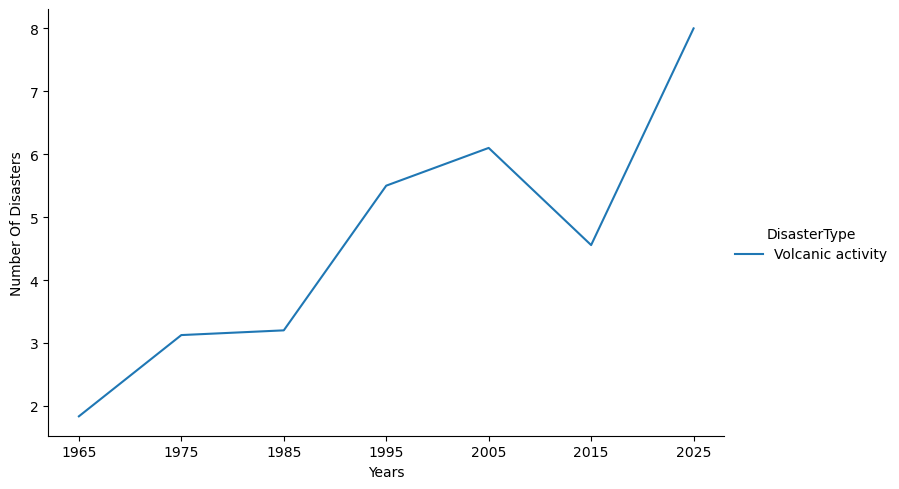

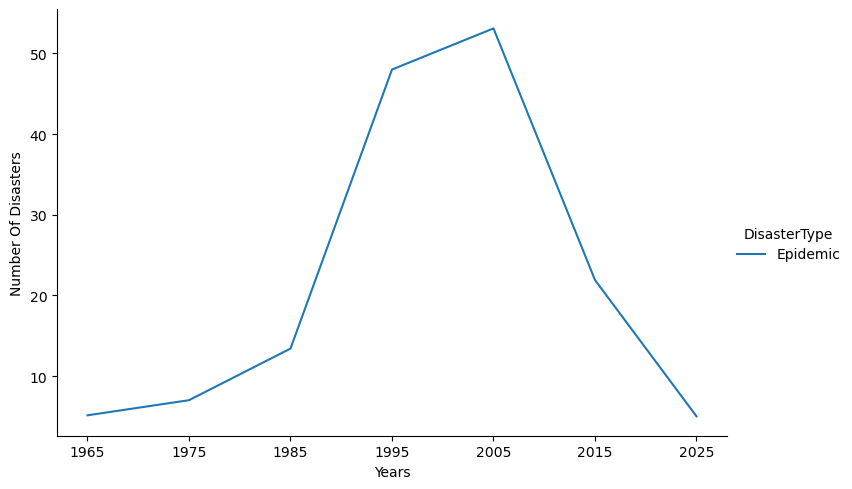

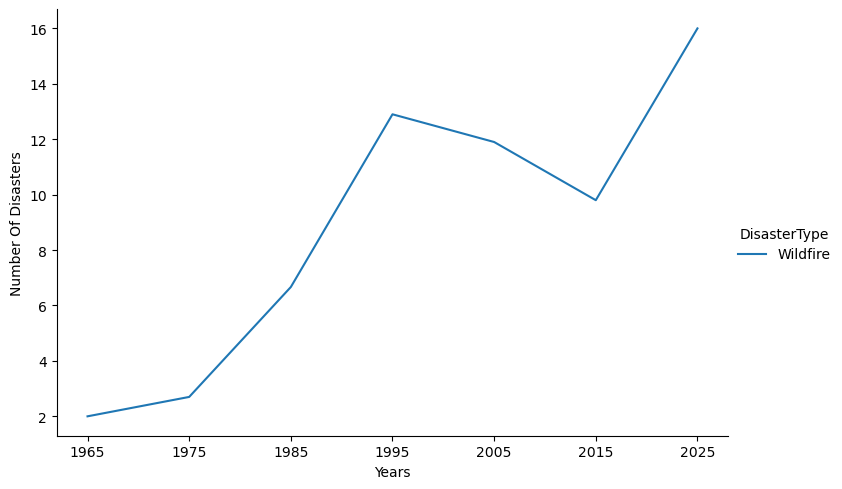

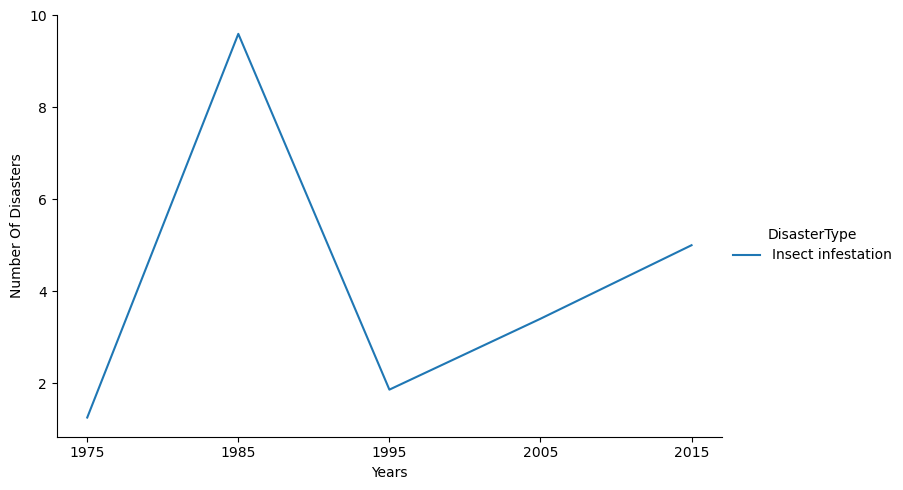

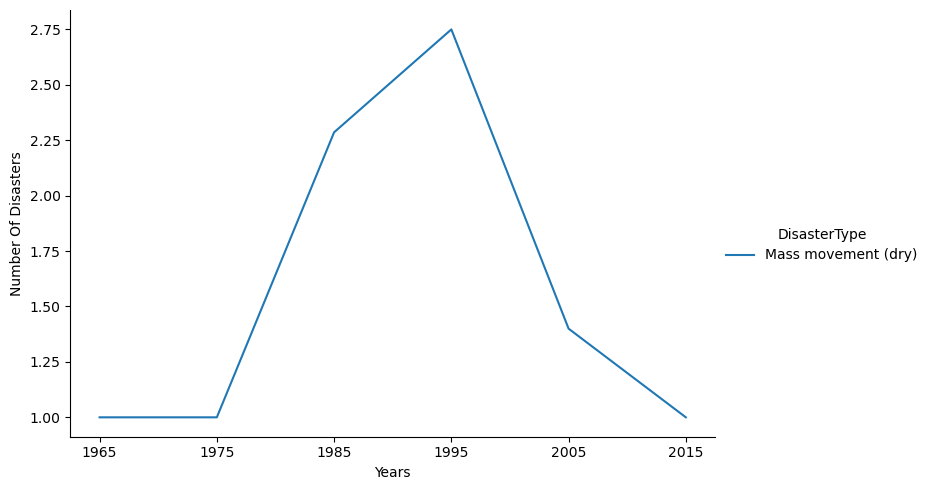

In [37]:
#RYSOWANIE WYKRESÓW 1961-2021

DisasterType_list =['Storm', 'Drought', 'Earthquake', 'Landslide', 'Flood',
       'Extreme temperature ', 'Volcanic activity', 'Epidemic',
       'Wildfire', 'Mass movement (dry)', 'Insect infestation']
RelplotBy10Year(DisasterType_list, df_1961)
RelplotBy10Year(['Storm'],df_1961)
RelplotBy10Year(['Drought'],df_1961)
RelplotBy10Year(['Earthquake'],df_1961)
RelplotBy10Year(['Landslide'],df_1961)
RelplotBy10Year(['Flood'],df_1961)
RelplotBy10Year(['Extreme temperature '],df_1961)
RelplotBy10Year(['Volcanic activity'],df_1961)
RelplotBy10Year(['Epidemic'],df_1961)
RelplotBy10Year(['Wildfire'],df_1961)
RelplotBy10Year(['Insect infestation'],df_1961)
RelplotBy10Year(['Mass movement (dry)'],df_1961)

c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1075: Fu

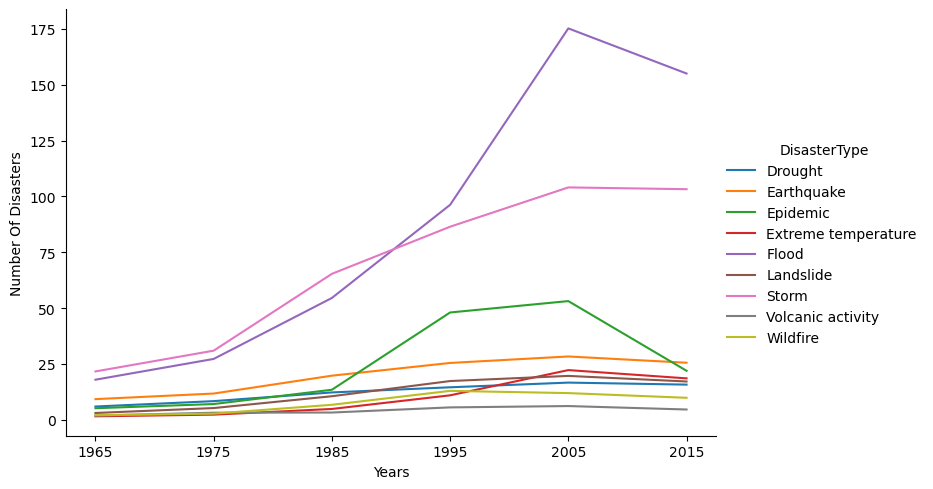

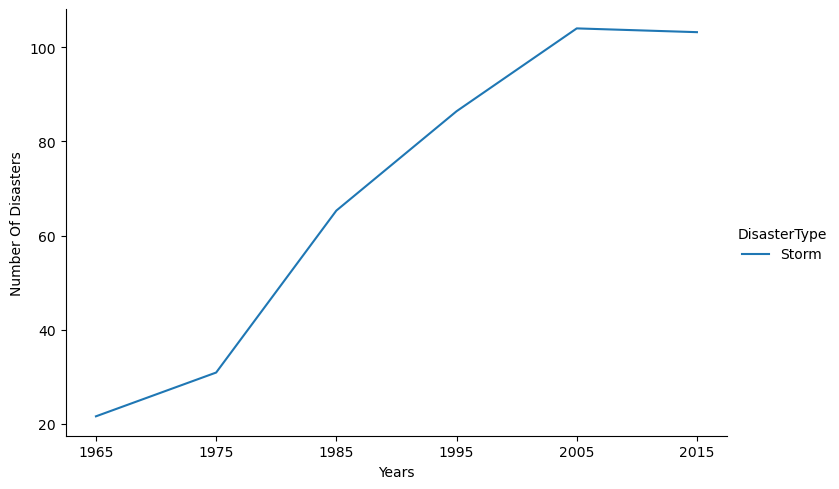

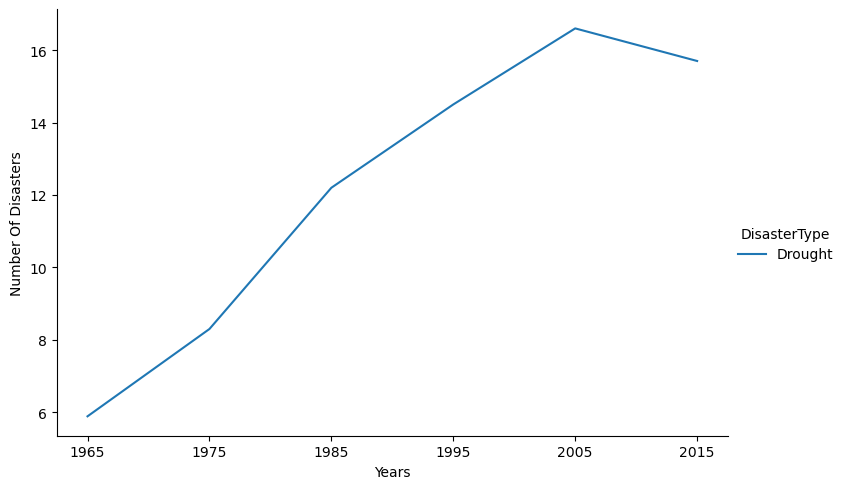

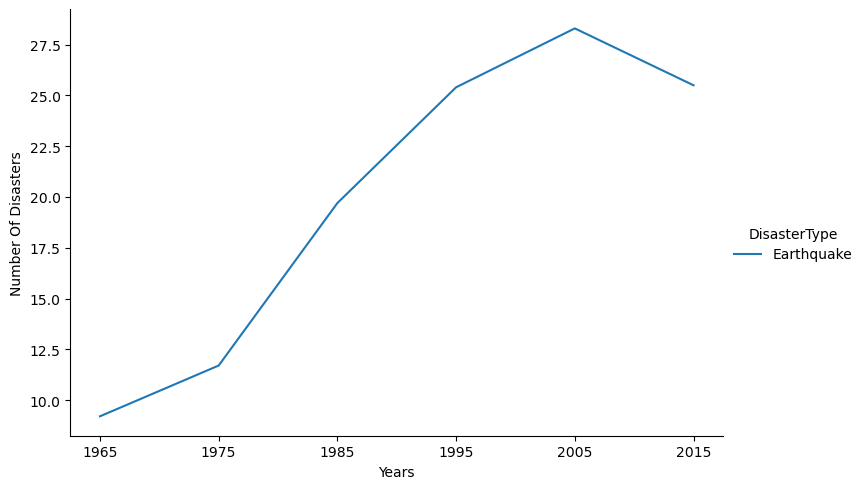

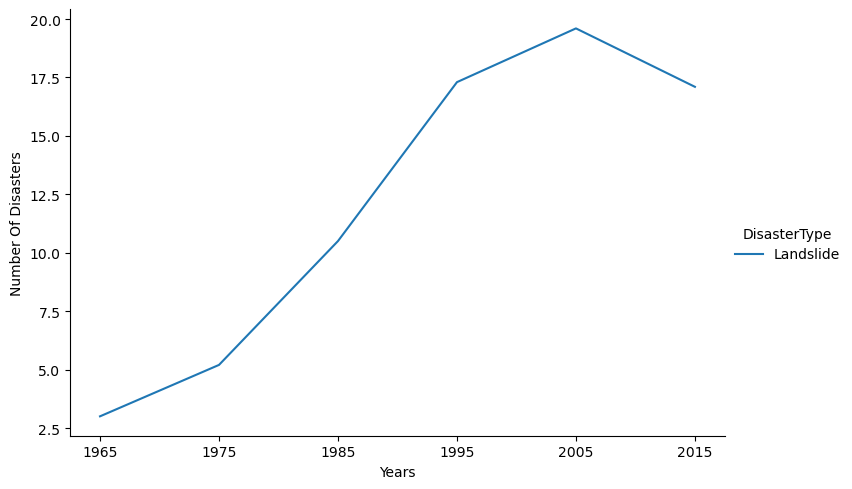

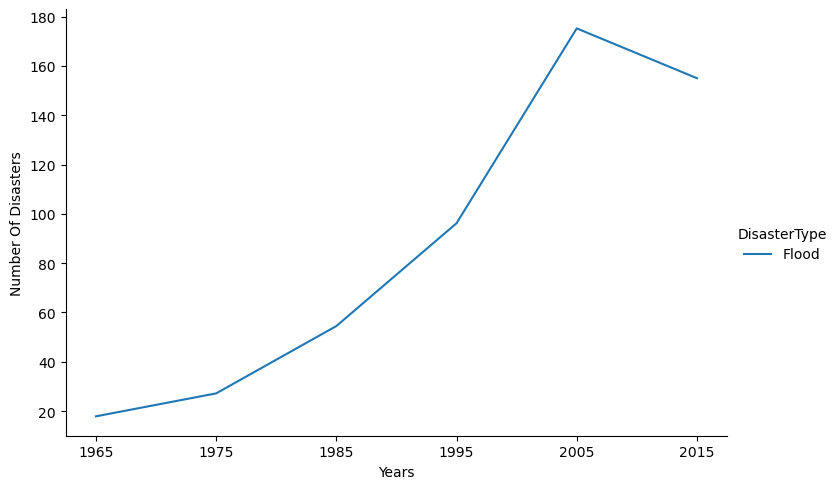

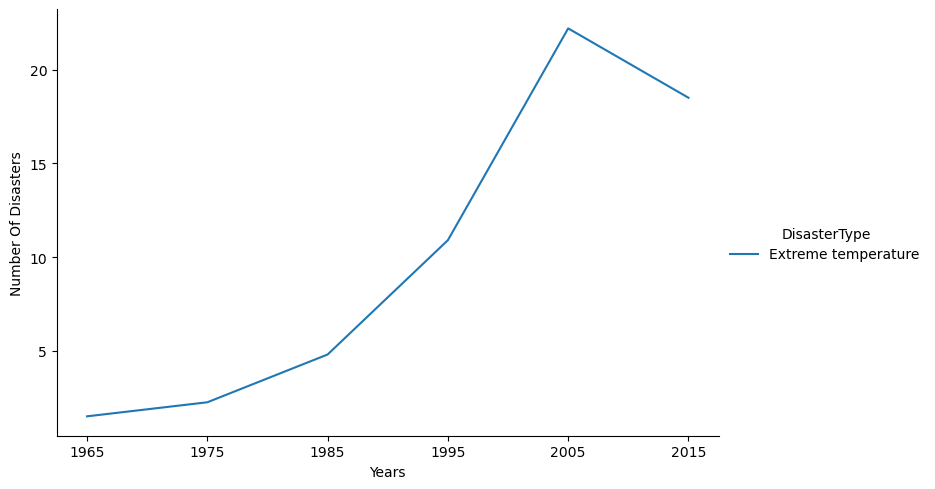

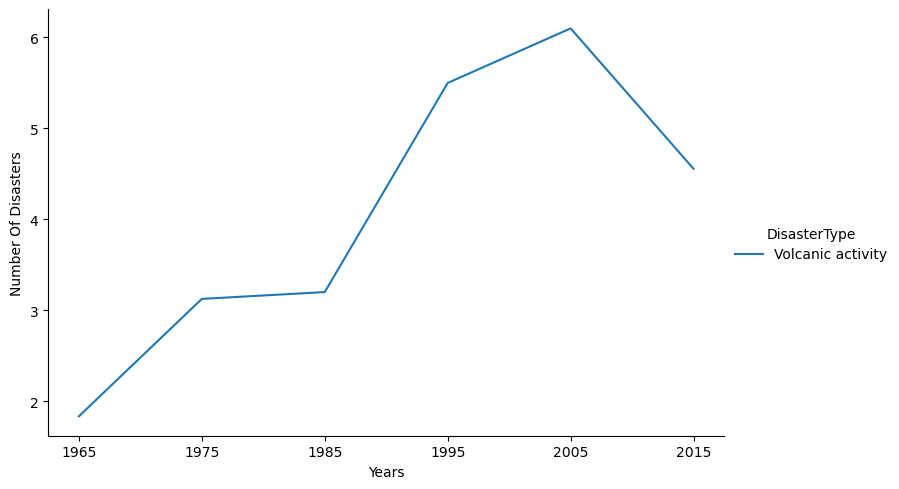

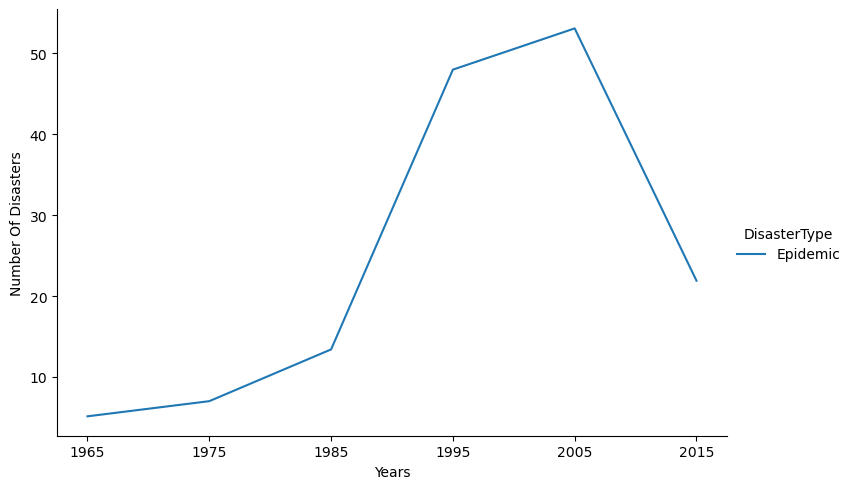

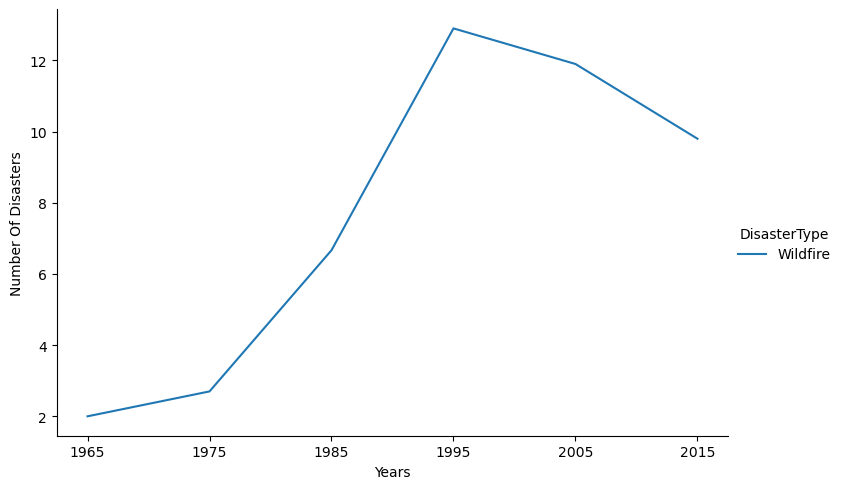

In [38]:
#RYSOWANIE WYKRESÓW 1961-2020
DisasterType_list =['Storm', 'Drought', 'Earthquake', 'Landslide', 'Flood',
       'Extreme temperature ', 'Volcanic activity', 'Epidemic',
       'Wildfire']

RelplotBy10Year(DisasterType_list, df_1961_2020)
RelplotBy10Year(['Storm'], df_1961_2020)
RelplotBy10Year(['Drought'], df_1961_2020)
RelplotBy10Year(['Earthquake'], df_1961_2020)
RelplotBy10Year(['Landslide'], df_1961_2020)
RelplotBy10Year(['Flood'], df_1961_2020)
RelplotBy10Year(['Extreme temperature '], df_1961_2020)
RelplotBy10Year(['Volcanic activity'], df_1961_2020)
RelplotBy10Year(['Epidemic'], df_1961_2020)
RelplotBy10Year(['Wildfire'], df_1961_2020)
#RelplotBy10Year(['Insect infestation'], df_1961_2020)
#RelplotBy10Year(['Mass movement (dry)'], df_1961_2020)

In [39]:

#funkcja rysująca wykresy, pogrupowanie po 10 lat - ŚMIERTELNOŚĆ ! 

def FilterByDisasterType(DisasterType_list, df_draw):
    df_1961_draw = pd.DataFrame()
    for type in DisasterType_list:
       #print('abc')
       temp = df_draw[(df_draw['DisasterType'] == type)]
       #print(temp)
       df_1961_draw = pd.concat([df_1961_draw,temp])
       
       #(df_1961[(df_1961['DisasterType'] == type)]), how='outer', indicator=True)
    return df_1961_draw
#df_1961_draw = FilterByDisasterType(DisasterType_list)

def CountByYear(DF):
    #pogrupowanie po rodzajach katastrof i latach - zlicza sumy wszystkich katastrof osobno w każdytm roku 
    df_group=DF.groupby(['DisasterType','Year'])[['TotalDeaths']].sum()
    #df_group = df_group.rename(columns={'DisasterGroup' : 'NumberOfDisasters'} )
    return df_group

    # stworzenie listy buckets po 10 lat 
def GroupBy10(df_group):
    group_list_10 = []
    for item in df_group['TotalDeaths'].items():
        group = round(((item[0][1]-5.1)/10))
        result = str(group*10+5)
        group_list_10.append(result)
    return group_list_10
#print(group)

def GroupBy10B(DF):
    df_group=DF.groupby(['DisasterType','Year'])[['TotalDeaths']].count()
    a = 1965, 1975, 1985, 1995, 2005, 2015 
    group_list_10 = sorted (a *10) * len((df_group['DisasterType']).unique())
    return group_list_10

#utworzenie nowego df z dodaną kolumną bucket 
def AddColumn(df_group, group_list_10):
    df_group.insert(0,'Years', group_list_10)

def Draw(df_group_ready):
    sns.relplot(data = df_group_ready, x = 'Years', y = 'TotalDeaths', hue="DisasterType", kind  = 'line', height= 5, aspect=1.5)

def RelplotBy10YearDeath(DisasterType_list, df_draw):

    DF = FilterByDisasterType(DisasterType_list, df_draw)
    
    df_group = CountByYear(DF)
    group_list_10 = GroupBy10(df_group)
    AddColumn(df_group, group_list_10)
    #pogrupowanie nowego df po buckets oraz DisasterType - zlicza średnią wszystkich katastrof osobno w każdym przedziale 10 lat  
    df_group_ready=df_group.groupby(['Years','DisasterType'])[['TotalDeaths']].sum()
    #wyświetlenie nowego df z pogrupowaniem co 10 lat 
    #df_group_ready
    Draw(df_group_ready)





c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1075: Fu

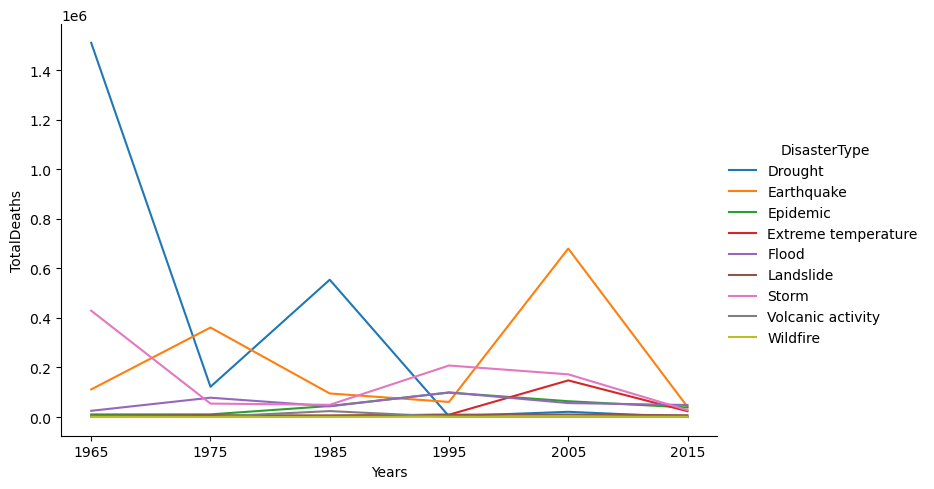

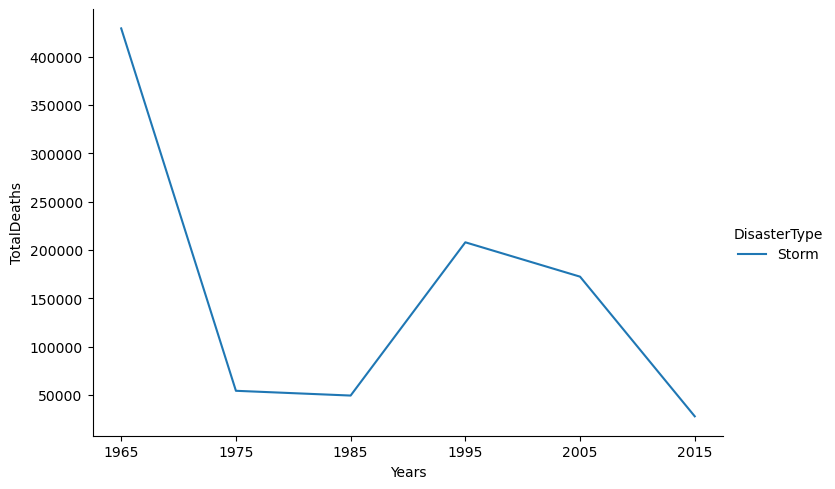

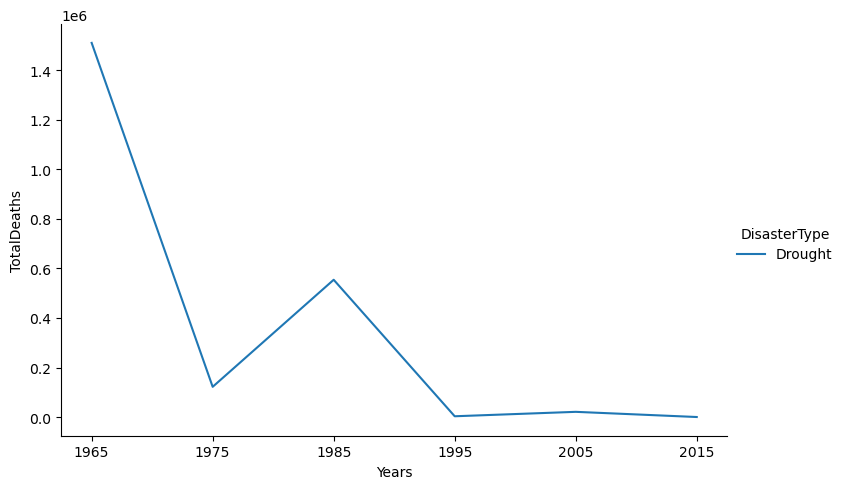

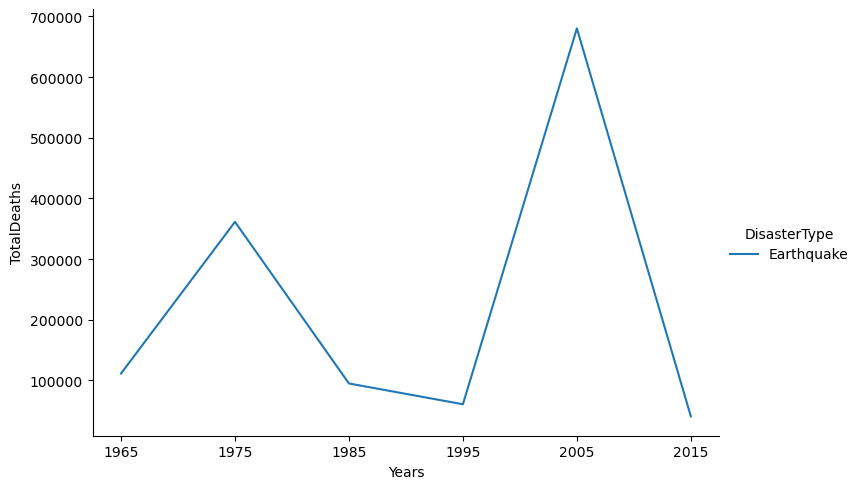

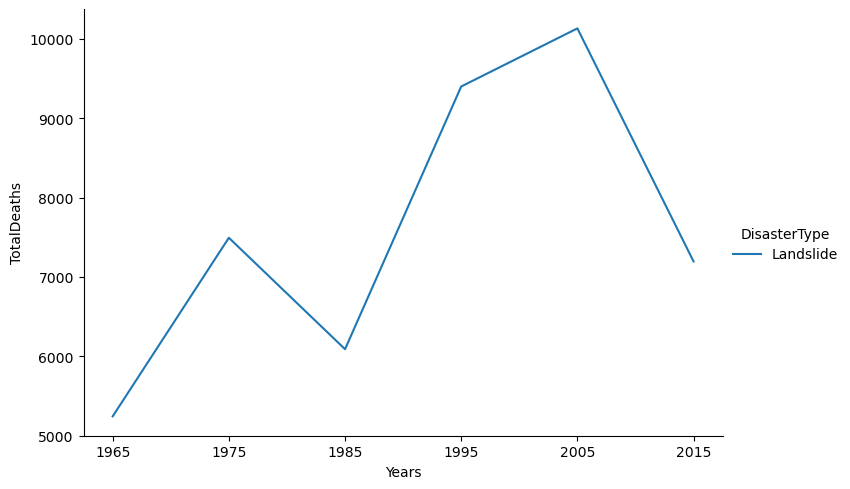

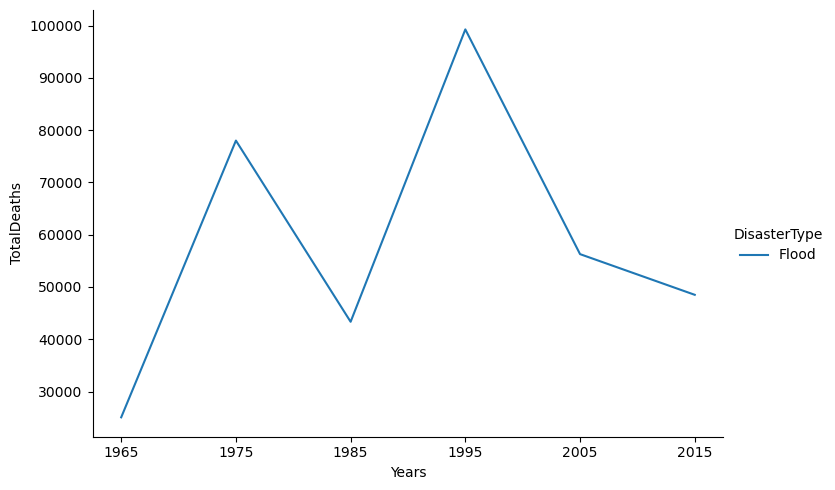

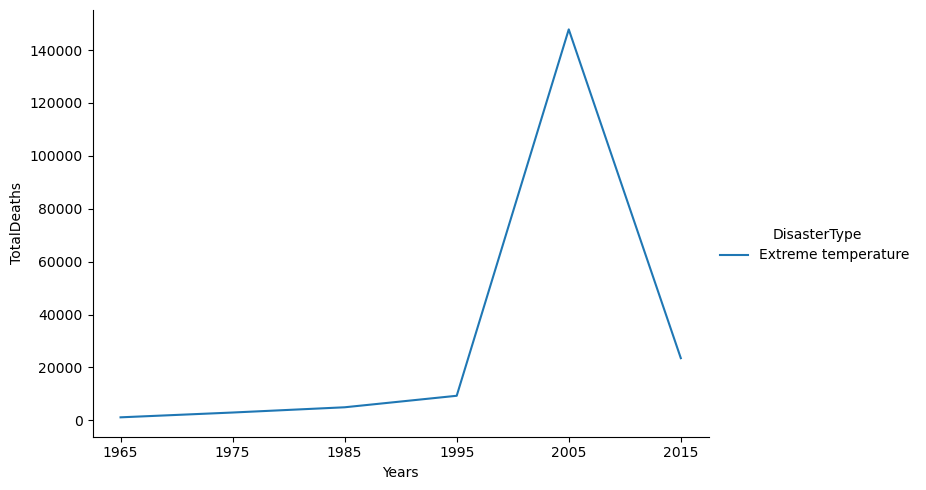

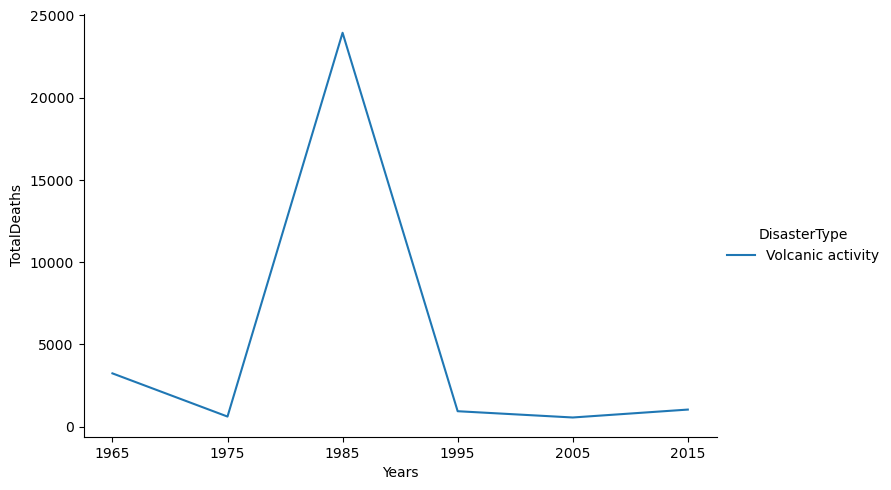

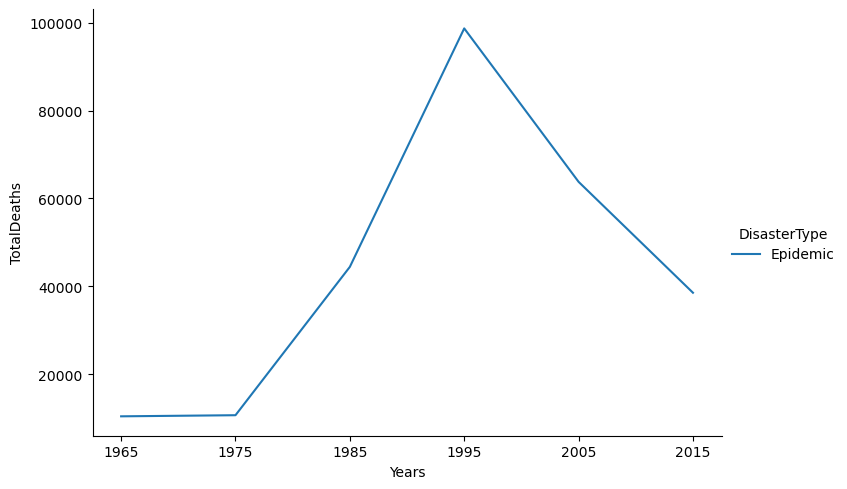

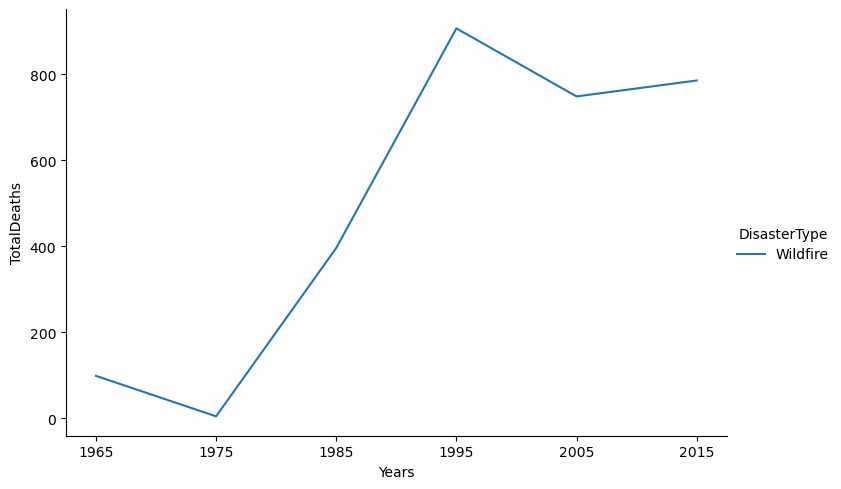

In [40]:
#RYSOWANIE WYKRESÓW 1961-2020
DisasterType_list =['Storm', 'Drought', 'Earthquake', 'Landslide', 'Flood',
       'Extreme temperature ', 'Volcanic activity', 'Epidemic',
       'Wildfire']

RelplotBy10YearDeath(DisasterType_list, df_1961_2020)
RelplotBy10YearDeath(['Storm'], df_1961_2020)
RelplotBy10YearDeath(['Drought'], df_1961_2020)
RelplotBy10YearDeath(['Earthquake'], df_1961_2020)
RelplotBy10YearDeath(['Landslide'], df_1961_2020)
RelplotBy10YearDeath(['Flood'], df_1961_2020)
RelplotBy10YearDeath(['Extreme temperature '], df_1961_2020)
RelplotBy10YearDeath(['Volcanic activity'], df_1961_2020)
RelplotBy10YearDeath(['Epidemic'], df_1961_2020)
RelplotBy10YearDeath(['Wildfire'], df_1961_2020)
#RelplotBy10Year(['Insect infestation'], df_1961_2020)
#RelplotBy10Year(['Mass movement (dry)'], df_1961_2020)

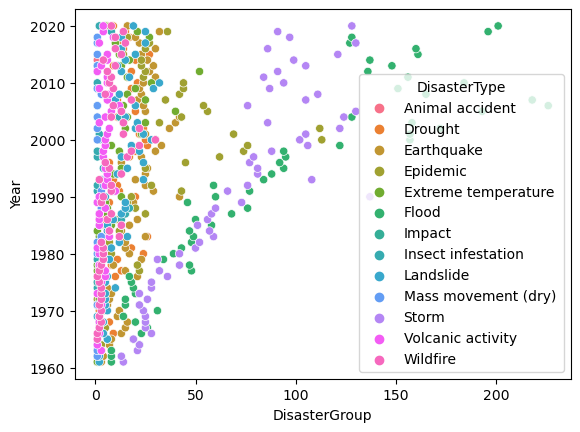

In [41]:
def disaster_type_scatter():
    f_group=df_1961_2020.groupby(['DisasterType','Year'])[['DisasterGroup']].count()
    sns.axes_style("whitegrid")
    sns.scatterplot(x= 'DisasterGroup', y= 'Year', data= f_group, hue='DisasterType')
    
disaster_type_scatter()

POŁĄCZENIE TABEL

In [42]:
temp_change_world = temp_change.groupby(['Year'])[['Temp. Change']].mean()


In [47]:
temp_change.columns

Index(['Unnamed: 0', 'Area Code', 'Area', 'Months Code', 'Months',
       'Element Code', 'Element', 'Unit', 'Temp. Change', 'Year', 'Latitude',
       'Longitude', 'Region', 'Subregion'],
      dtype='object')

In [48]:
df_group

DisasterGroup
DisasterType    Year               
Animal accident 2014              1
Drought         1961              1
                1963              1
                1964              7
                1965              7
...                             ...
Wildfire        2016             10
                2017             15
                2018             10
                2019             14
                2020              8

[568 rows x 1 columns]

Asia
                   Temp. Change  NumberOfDisasters
Temp. Change              1.000              0.649
NumberOfDisasters         0.649              1.000
---------------------------------------------------------------------
Europe
                   Temp. Change  NumberOfDisasters
Temp. Change              1.000              0.532
NumberOfDisasters         0.532              1.000
---------------------------------------------------------------------
Africa
                   Temp. Change  NumberOfDisasters
Temp. Change               1.00               0.65
NumberOfDisasters          0.65               1.00
---------------------------------------------------------------------
Oceania
                   Temp. Change  NumberOfDisasters
Temp. Change              1.000              0.441
NumberOfDisasters         0.441              1.000
---------------------------------------------------------------------
Americas
                   Temp. Change  NumberOfDisasters
Temp. Change         

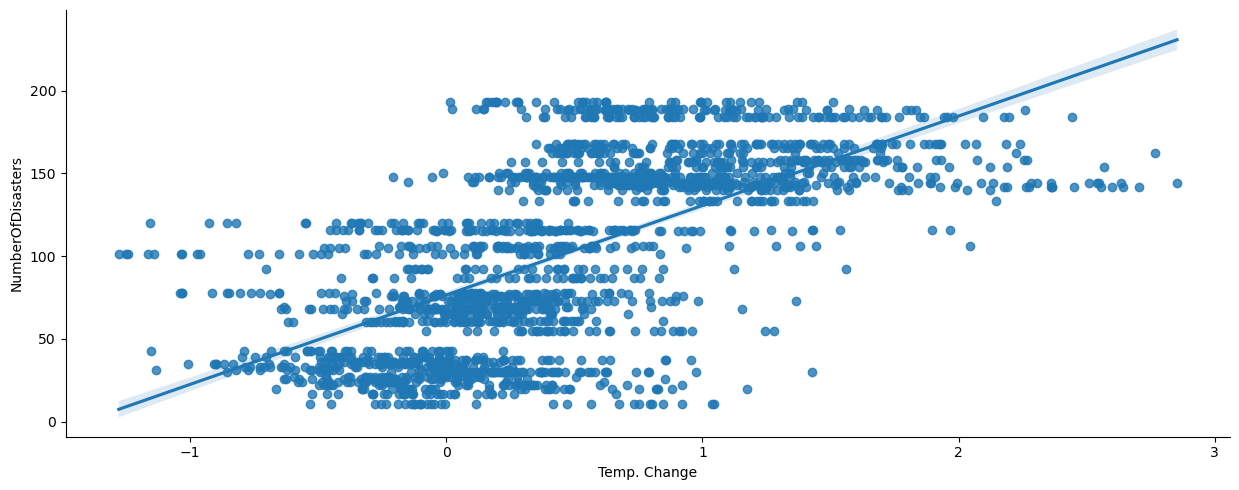

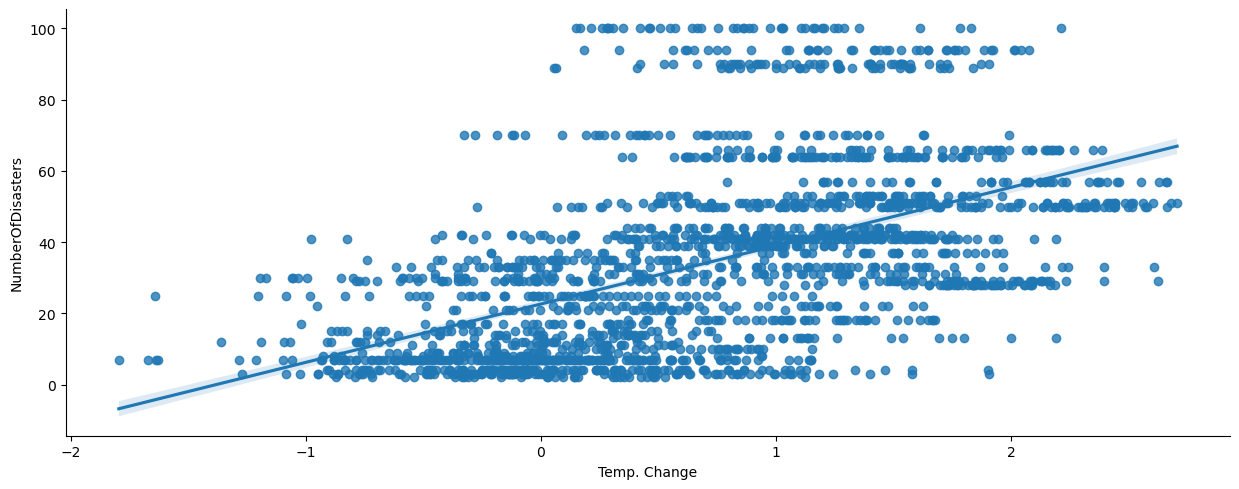

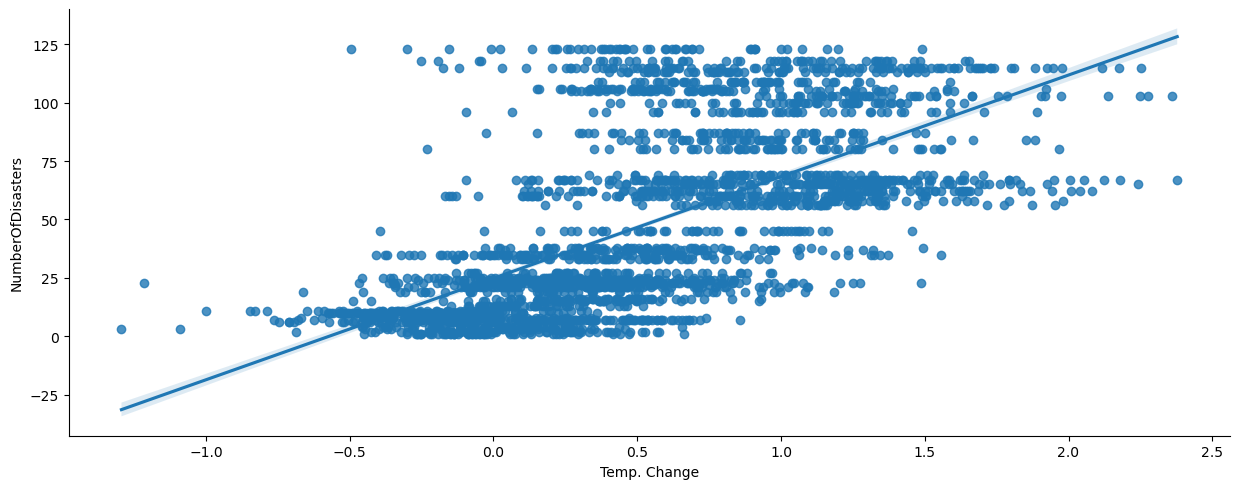

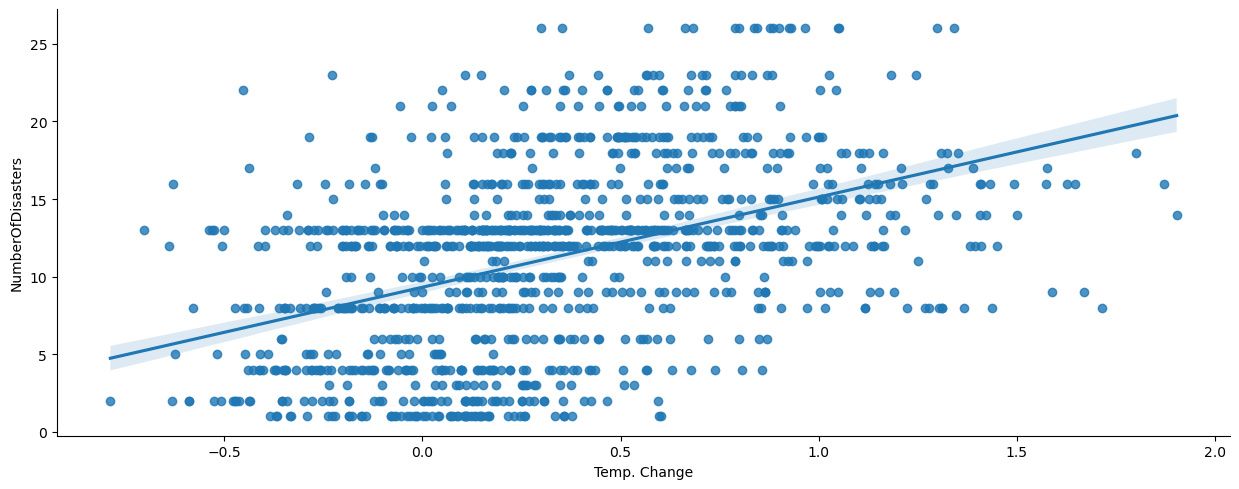

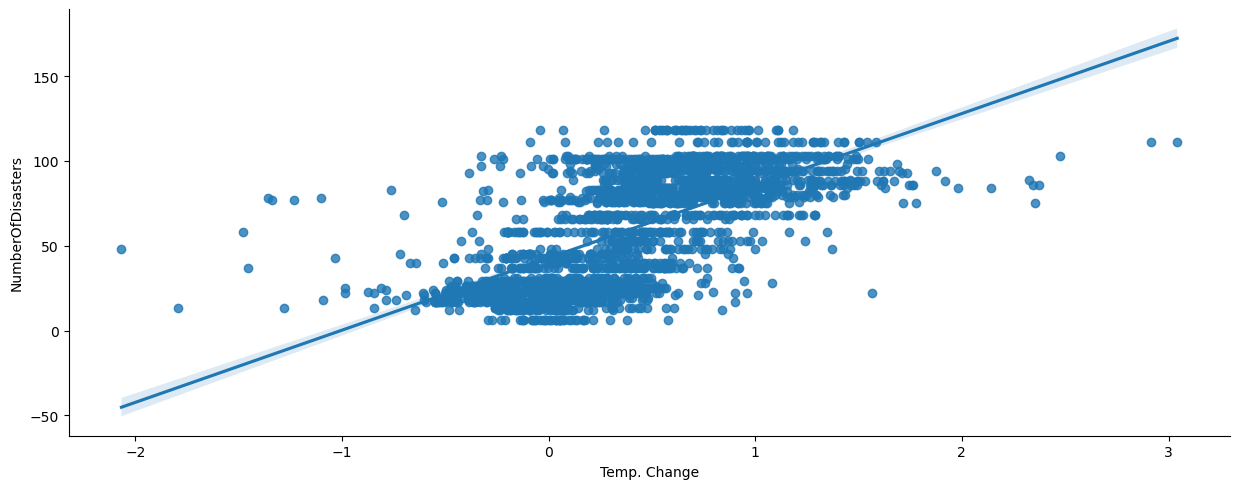

In [49]:
#sprawdzenie korelacji pomiędzy wzrostem temperatur a ilością występowania sumy katastrof w danym roku w zależności od kontynentów 
#połączenie katastrof z temp i korelacje 
#df_1961_2020_tableau


DisasterType_list =['Storm', 'Drought', 'Earthquake', 'Landslide', 'Flood',
       'Extreme temperature ', 'Volcanic activity', 'Epidemic',
       'Wildfire', 'Mass movement (dry)', 'Insect infestation']

Continent_list = ['Asia', 'Europe', 'Africa', 'Oceania', 'Americas']

def PrepareDf():
    list_of_columns = ['Year', 'DisasterGroup','DisasterType', 
            'Country', 'Region', 'Continent']
    df_small = df_1961_2020_tableau.loc[:, list_of_columns]
    return df_small

def Group(df_small):
    df_group=df_small.groupby(['Continent','Year'])[['DisasterGroup']].count()
    return df_group

def Merge(df_group):
    temp = temp_change.rename(columns={'Region':'Continent'})
    disasters_temp_change = df_group.merge(temp, on = ['Year','Continent'] , how= 'right')
    disasters_temp_change = disasters_temp_change.rename(columns = {'DisasterGroup': 'NumberOfDisasters'})
    return disasters_temp_change

def corr_temp_changes(DisasterType_list, disasters_temp_change, Continent_list ):
    for continent in Continent_list:
        disasters_temp_change_reg = disasters_temp_change[(disasters_temp_change['Continent'] == continent)][['Temp. Change','NumberOfDisasters']]
        correlation = round(disasters_temp_change_reg.corr(), 3)
        sns.lmplot(data = disasters_temp_change_reg, x = 'Temp. Change', y = 'NumberOfDisasters', height= 5, aspect=2.5)
        print(continent)
        print(correlation)
        print('---------------------------------------------------------------------')

def show_Corr ():
    df_small = PrepareDf()
    df_group = Group(df_small)
    disasters_temp_change = Merge(df_group)
    corr_temp_changes(DisasterType_list, disasters_temp_change, Continent_list) 

show_Corr ()



                     Number Of Disasters  Temp. Change
Number Of Disasters                1.000         0.873
Temp. Change                       0.873         1.000


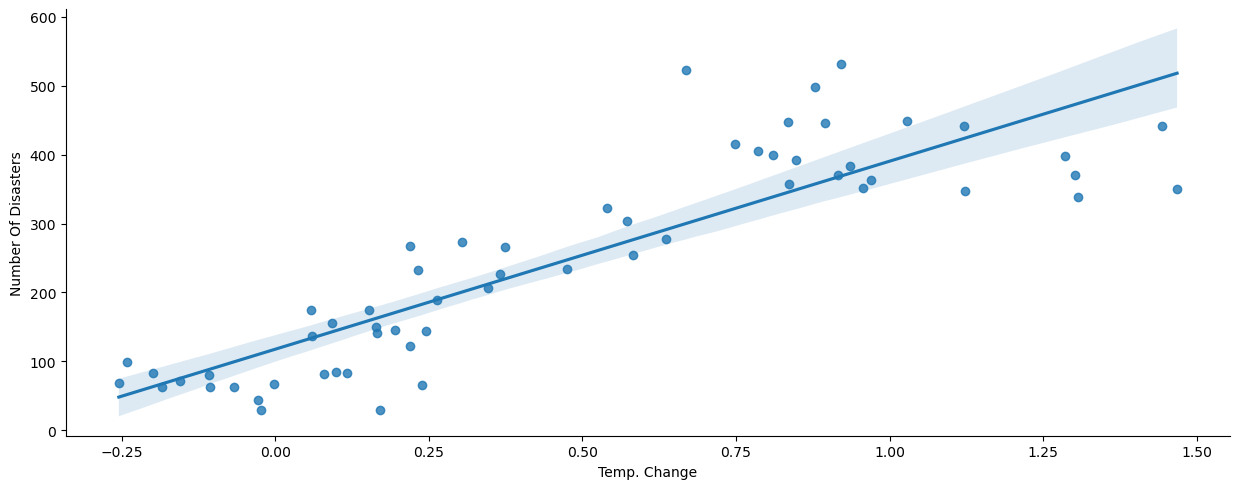

In [50]:
#sprawdzenie korelacji pomiędzy wzrostem temperatur a ilością występowania sumy katastrof w roku cały świat 

DisasterType_list =['Storm', 'Drought', 'Earthquake', 'Landslide', 'Flood',
       'Extreme temperature ', 'Volcanic activity', 'Epidemic',
       'Wildfire', 'Mass movement (dry)', 'Insect infestation']

list_of_columns = ['Year', 'DisasterGroup','DisasterType', 
            'Country', 'Region', 'Continent']
temp_change = temp_change.rename(columns={'Region':'Continent'})
temp_change_world = temp_change.groupby(['Year'])[['Temp. Change']].mean()
temp_change_world

def PrepareDf(list_of_columns):
    df_small = df_1961_2020_tableau.loc[:, list_of_columns]
    return df_small

def Group(df_small):
    df_group=df_small.groupby(['Year'])[['DisasterGroup']].count()
    temp_change_world = temp_change.groupby(['Year'])[['Temp. Change']].mean()
    return df_group, temp_change_world

def Merge(df_group, temp_change_world):
   
    disasters_temp_change = df_group.merge(temp_change_world, on = ['Year',] , how= 'right')
    disasters_temp_change = disasters_temp_change.rename(columns = {'DisasterGroup': 'Number Of Disasters'})
    return disasters_temp_change

def corr_temp_changes(disasters_temp_change):
    correlation = round(disasters_temp_change.corr(), 3)
    print(correlation)


def show_Corr():
    df_small = PrepareDf(list_of_columns)
    df_group, temp_change_world = Group(df_small)
    disasters_temp_change = Merge(df_group, temp_change_world)
    corr_temp_changes(disasters_temp_change) 
    sns.lmplot(data = disasters_temp_change, x = 'Temp. Change', y = 'Number Of Disasters', height= 5, aspect=2.5)

show_Corr ()




^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^ Storm ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                     Number Of Disasters  Temp. Change
Number Of Disasters                1.000         0.822
Temp. Change                       0.822         1.000
--------------------------------------------------------------------------------
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^ Drought ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                     Number Of Disasters  Temp. Change
Number Of Disasters                1.000         0.608
Temp. Change                       0.608         1.000
--------------------------------------------------------------------------------
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^ Earthquake ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                     Number Of Disasters  Temp. Change
Number Of Disasters                1.000         0.691
Temp. Change                       0.691         1.000
------------

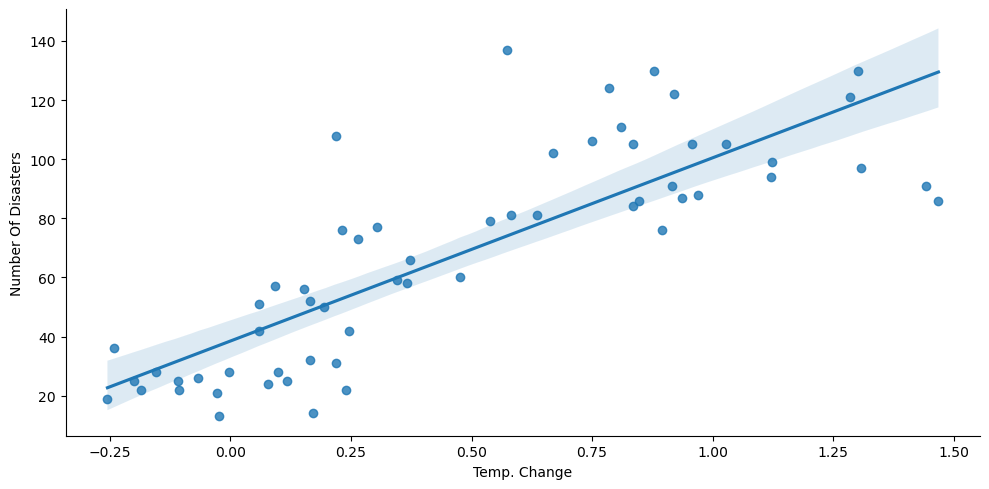

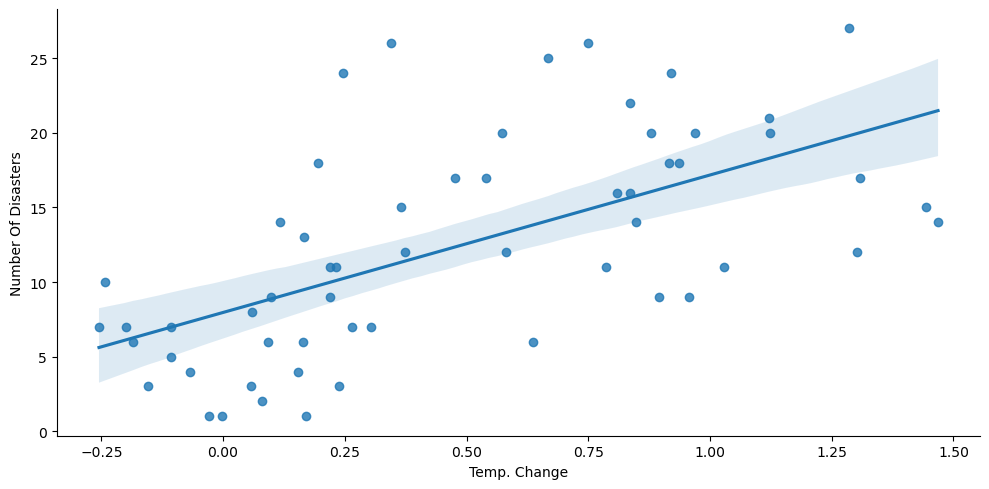

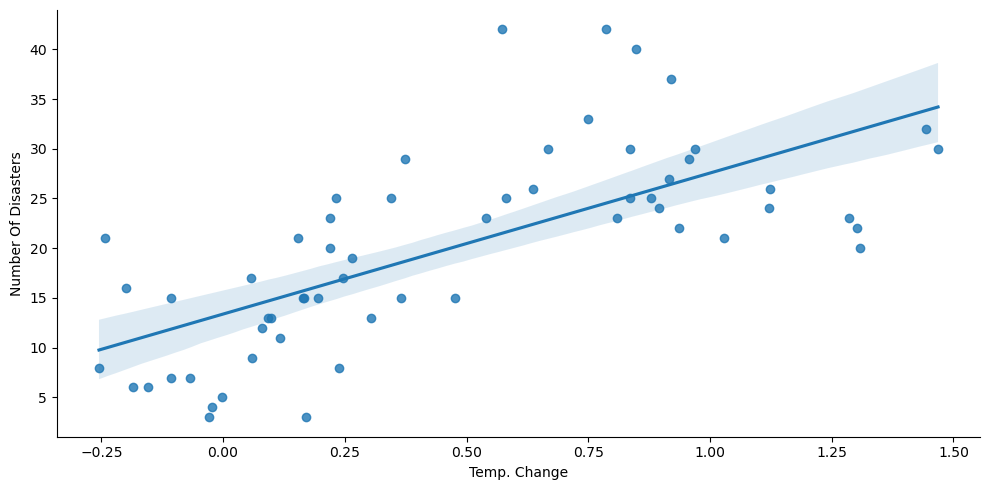

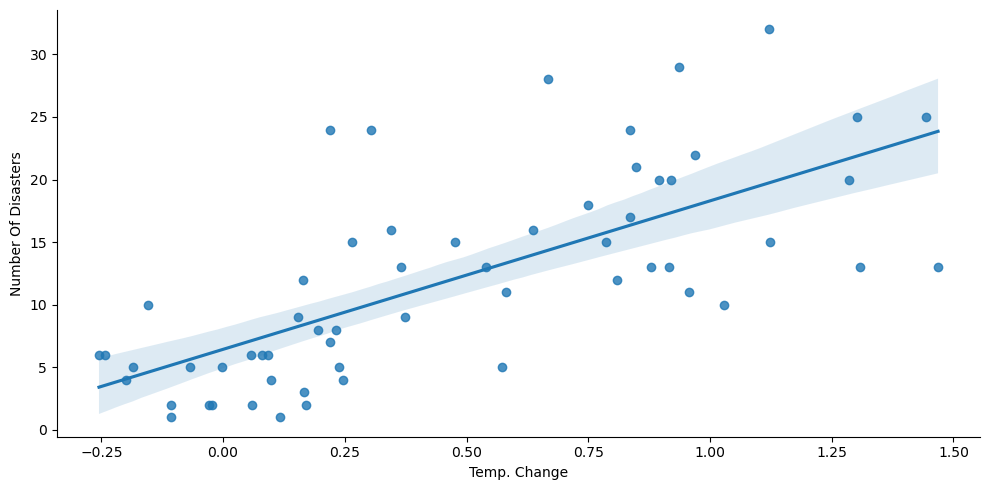

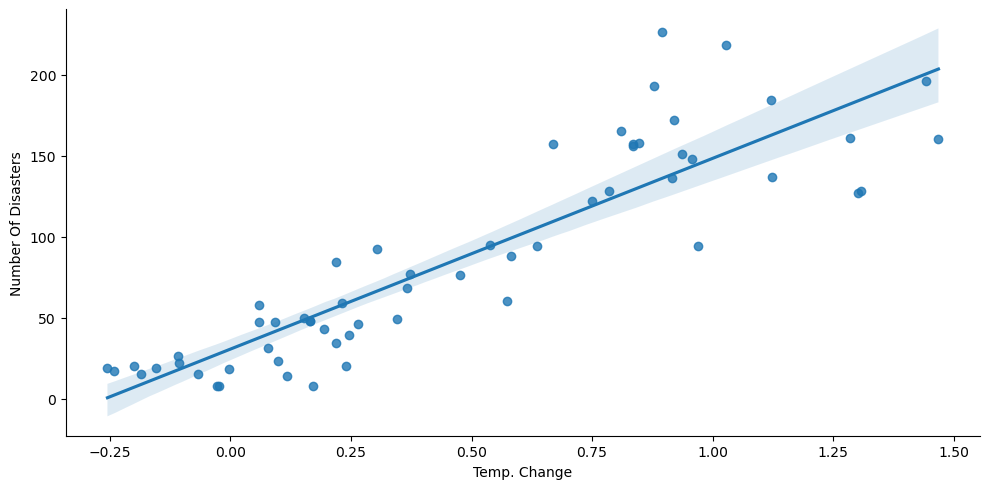

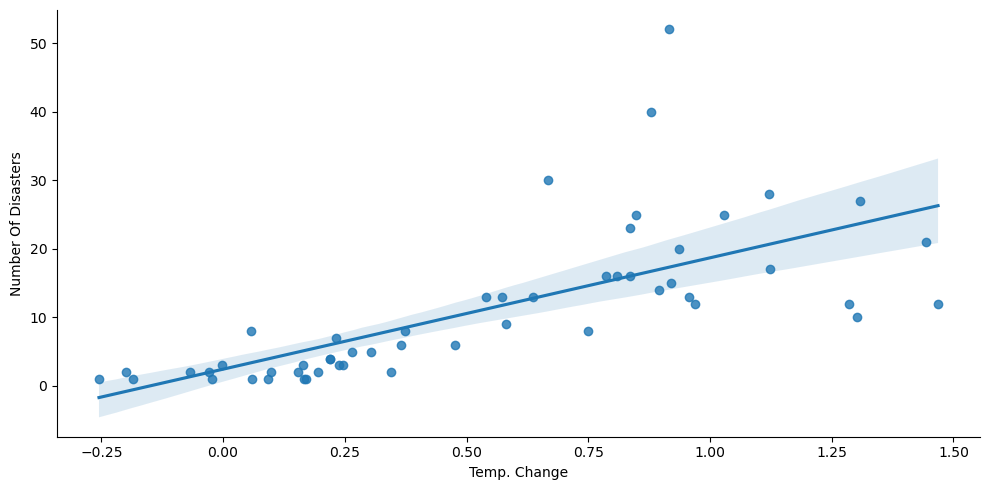

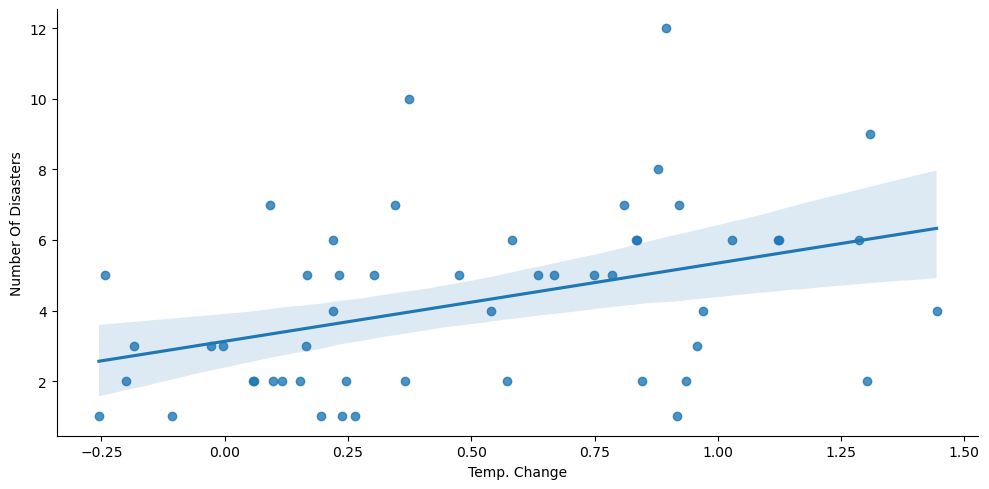

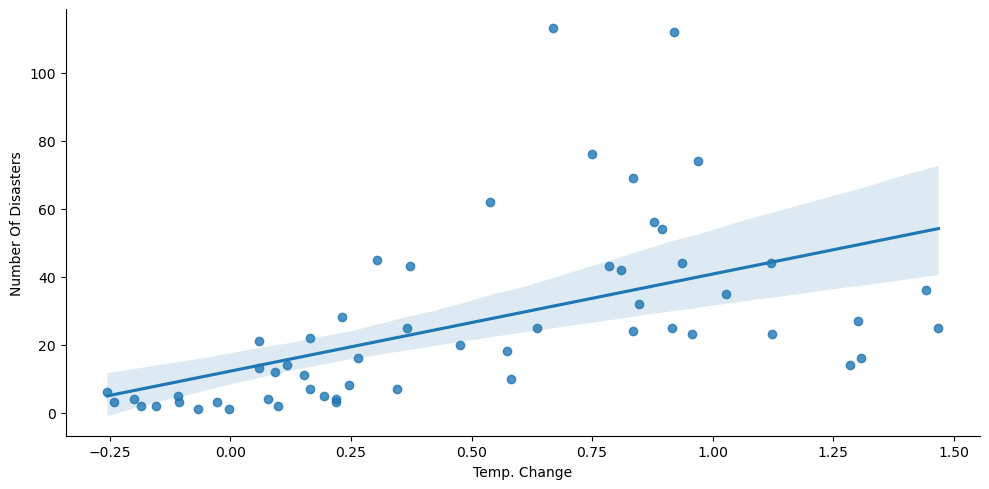

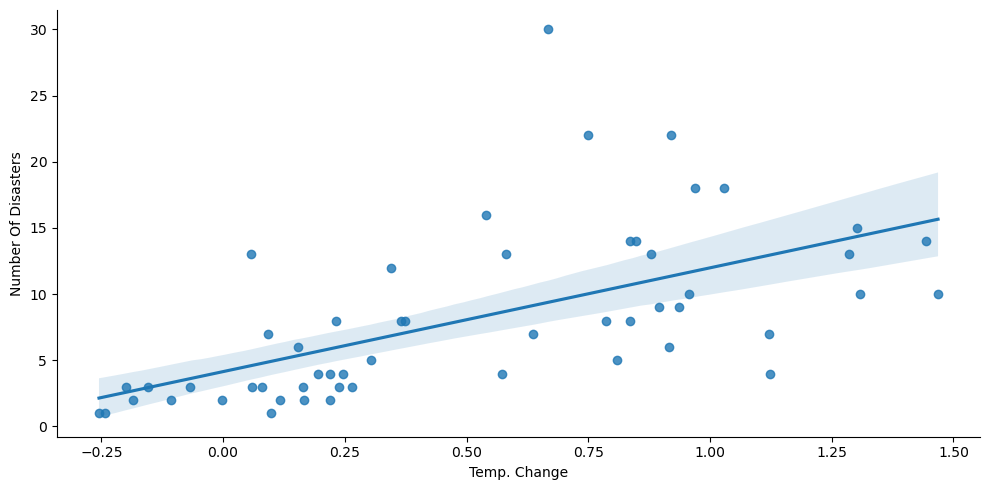

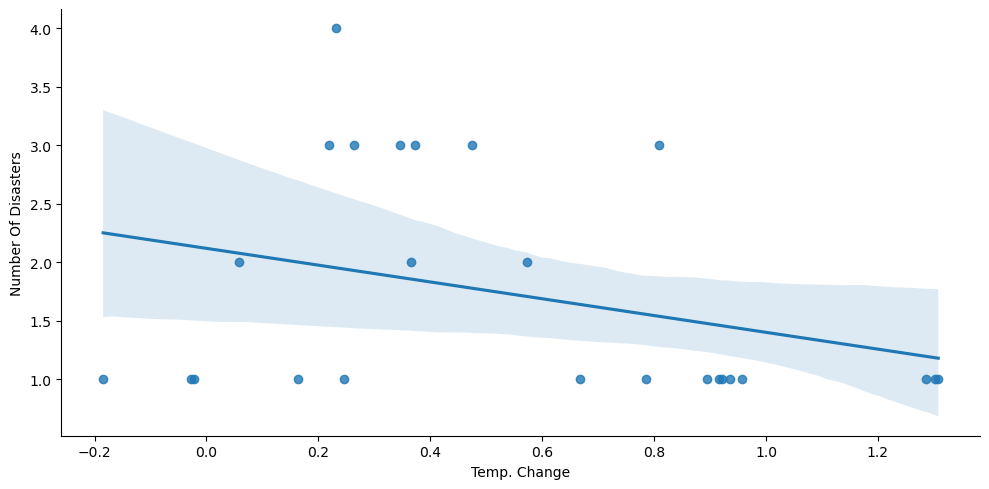

In [51]:

#sprawdzenie korelacji pomiędzy wzrotem temperatur a katastrofami (osobno dla każdej) w danym roku cały świat
DisasterType_list =['Storm', 'Drought', 'Earthquake', 'Landslide', 'Flood',
       'Extreme temperature ', 'Volcanic activity', 'Epidemic',
       'Wildfire', 'Mass movement (dry)']
for disaster in DisasterType_list:
    df_small_1 = df_1961_2020_tableau.loc[(df_1961_2020_tableau['DisasterType']==disaster)]
    df_group = df_small_1.groupby(['Year'])[['DisasterGroup']].count() 
    temp_change = temp_change.rename(columns={'Region':'Continent'})
    temp_change_world = temp_change.groupby(['Year'])[['Temp. Change']].mean()
    disasters_temp_change = df_group.merge(temp_change_world, on = ['Year'] , how= 'right')
    disasters_temp_change = disasters_temp_change.rename(columns = {'DisasterGroup': 'Number Of Disasters'})
    correlation = round(disasters_temp_change.corr(), 3)
    print (50*'^',disaster,50*'^')
    print (correlation)
    print (80*'-')
    sns.lmplot(data = disasters_temp_change, x = 'Temp. Change', y = 'Number Of Disasters', height= 5, aspect=2)

Storm
Asia
                   NumberOfDisasters  Temp. Change
NumberOfDisasters              1.000         0.802
Temp. Change                   0.802         1.000
--------------------------------------------------------------------------------
Storm
Europe
                   NumberOfDisasters  Temp. Change
NumberOfDisasters              1.000         0.388
Temp. Change                   0.388         1.000
--------------------------------------------------------------------------------
Storm
Africa
                   NumberOfDisasters  Temp. Change
NumberOfDisasters              1.000         0.642
Temp. Change                   0.642         1.000
--------------------------------------------------------------------------------
Storm
Oceania
                   NumberOfDisasters  Temp. Change
NumberOfDisasters              1.000         0.261
Temp. Change                   0.261         1.000
--------------------------------------------------------------------------------
Storm
America

c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


Flood
Europe
                   NumberOfDisasters  Temp. Change
NumberOfDisasters              1.000         0.697
Temp. Change                   0.697         1.000
--------------------------------------------------------------------------------
Flood
Africa
                   NumberOfDisasters  Temp. Change
NumberOfDisasters              1.000         0.822
Temp. Change                   0.822         1.000
--------------------------------------------------------------------------------
Flood
Oceania
                   NumberOfDisasters  Temp. Change
NumberOfDisasters              1.000         0.344
Temp. Change                   0.344         1.000
--------------------------------------------------------------------------------
Flood
Americas
                   NumberOfDisasters  Temp. Change
NumberOfDisasters              1.000         0.866
Temp. Change                   0.866         1.000
--------------------------------------------------------------------------------
Extreme t

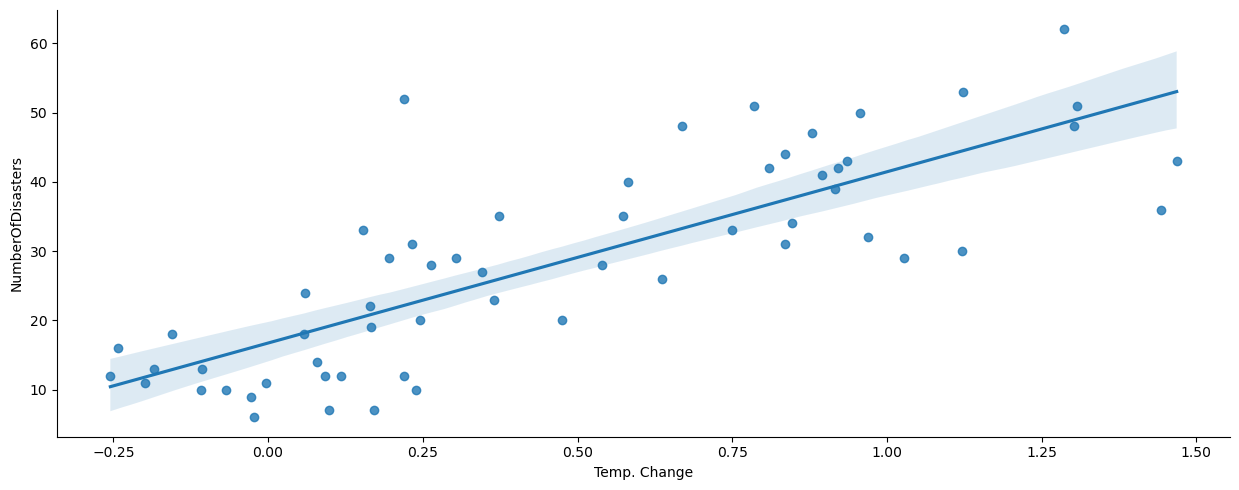

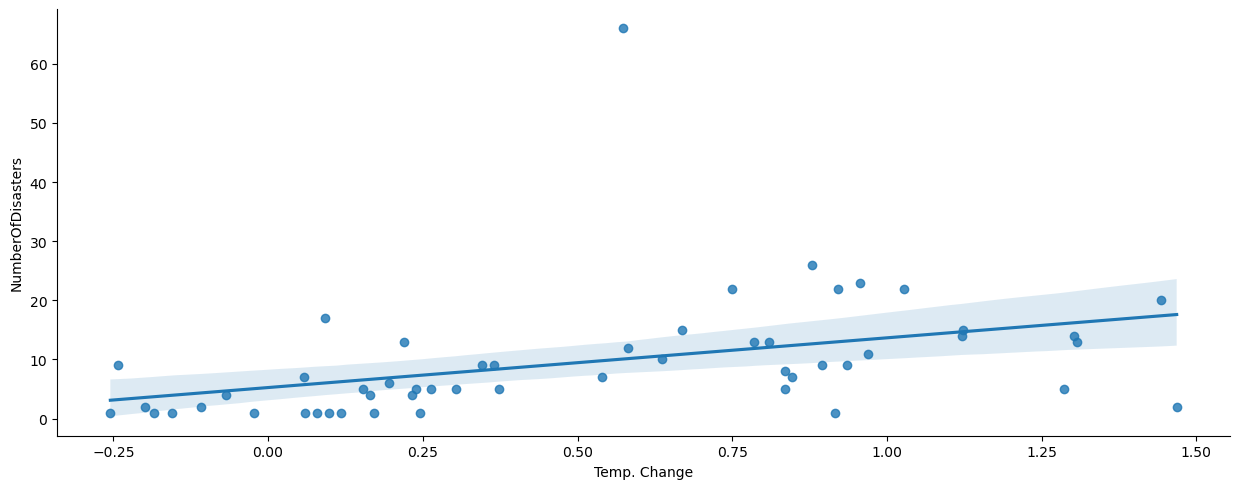

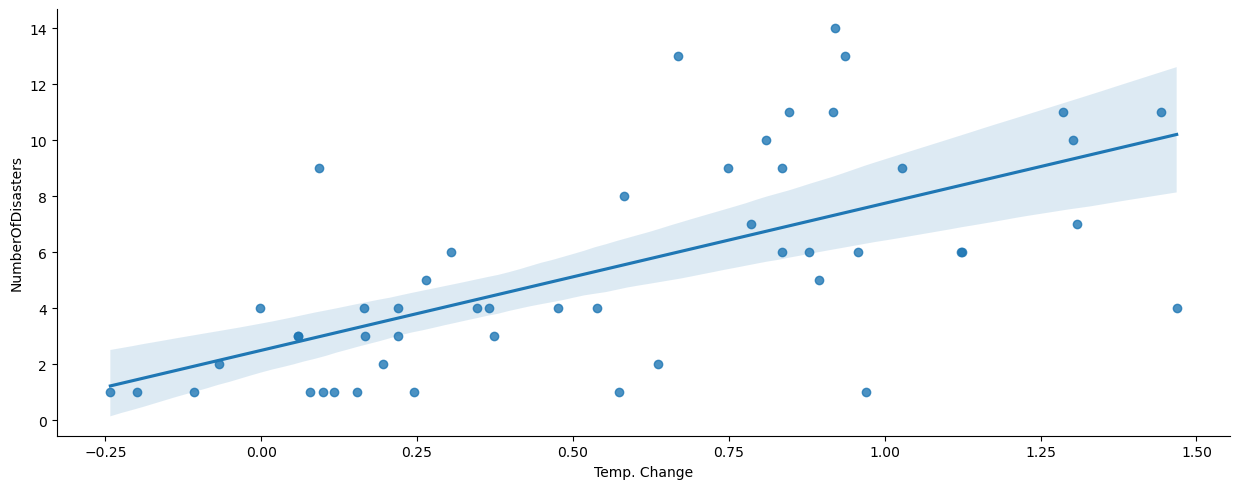

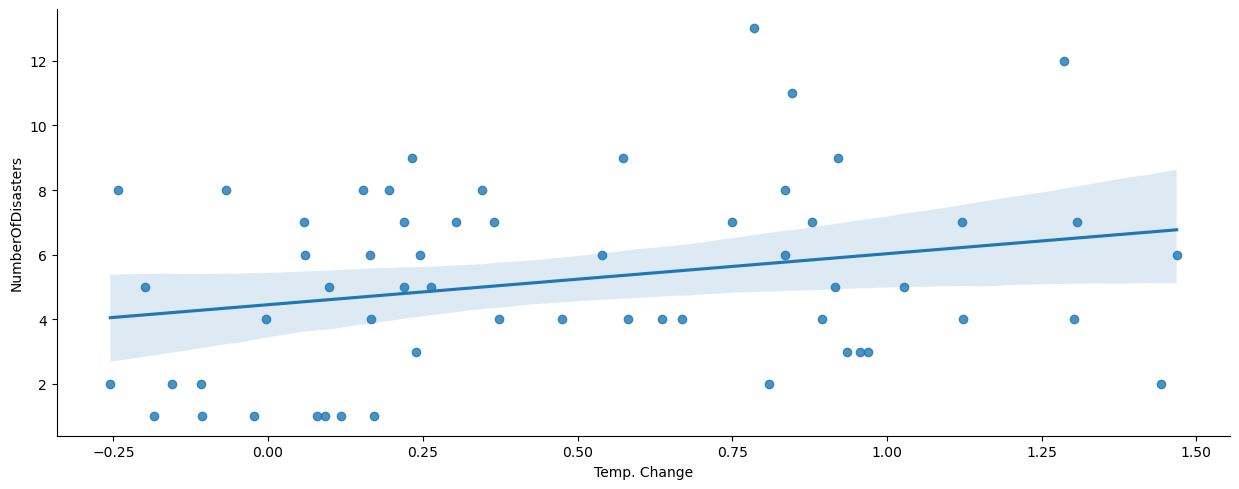

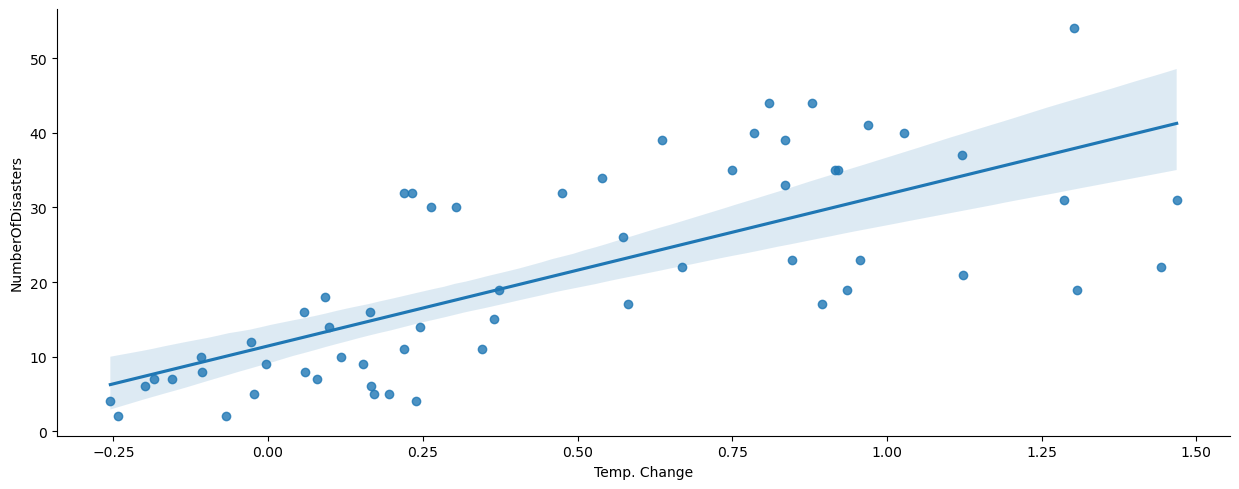

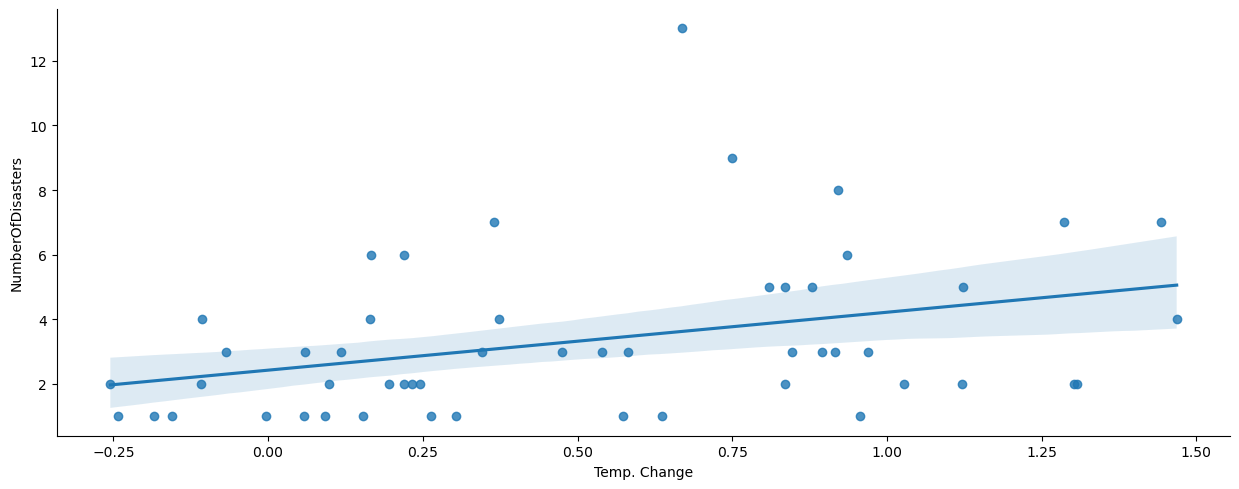

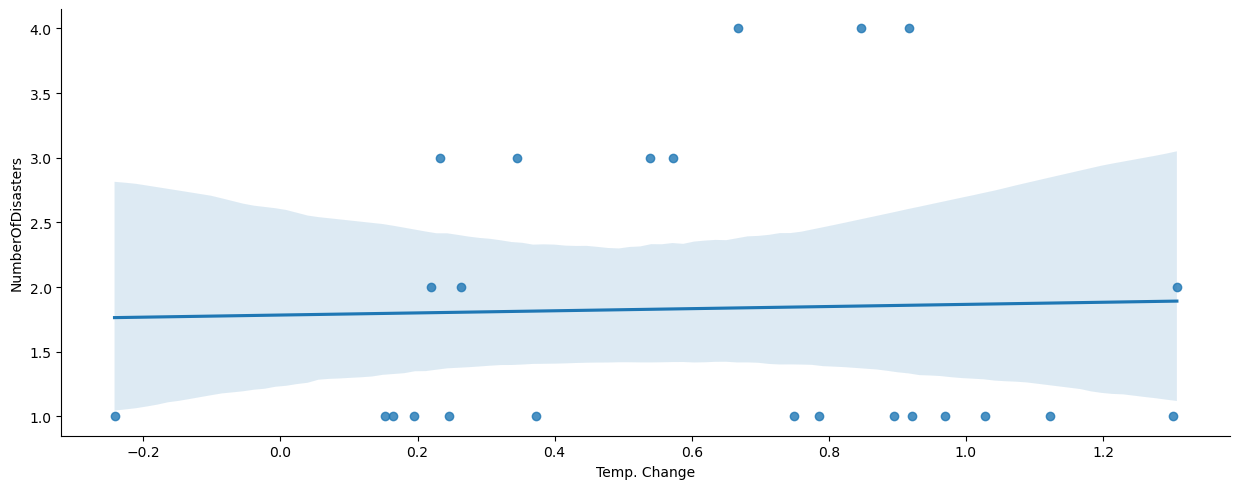

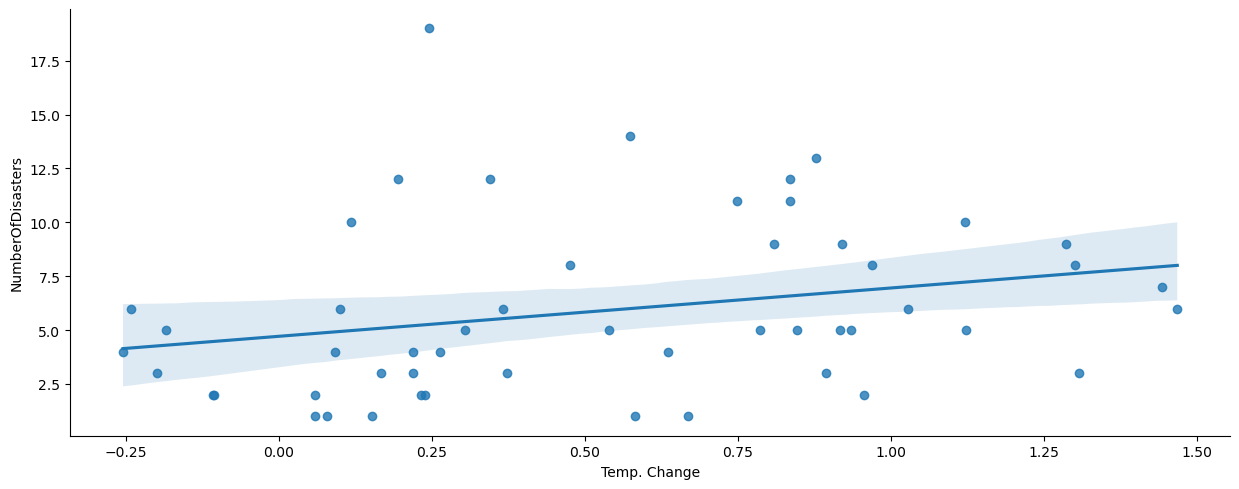

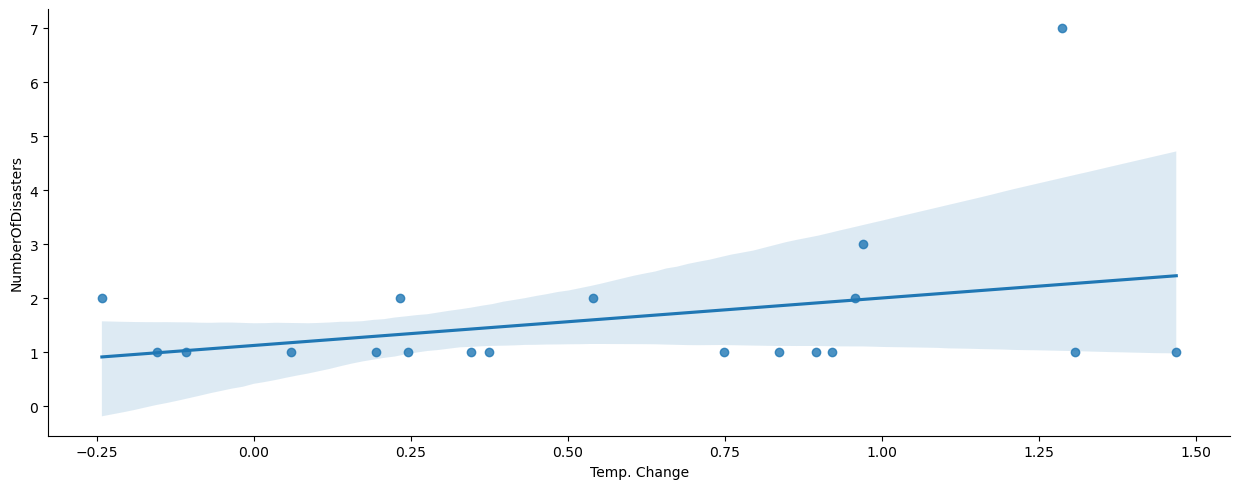

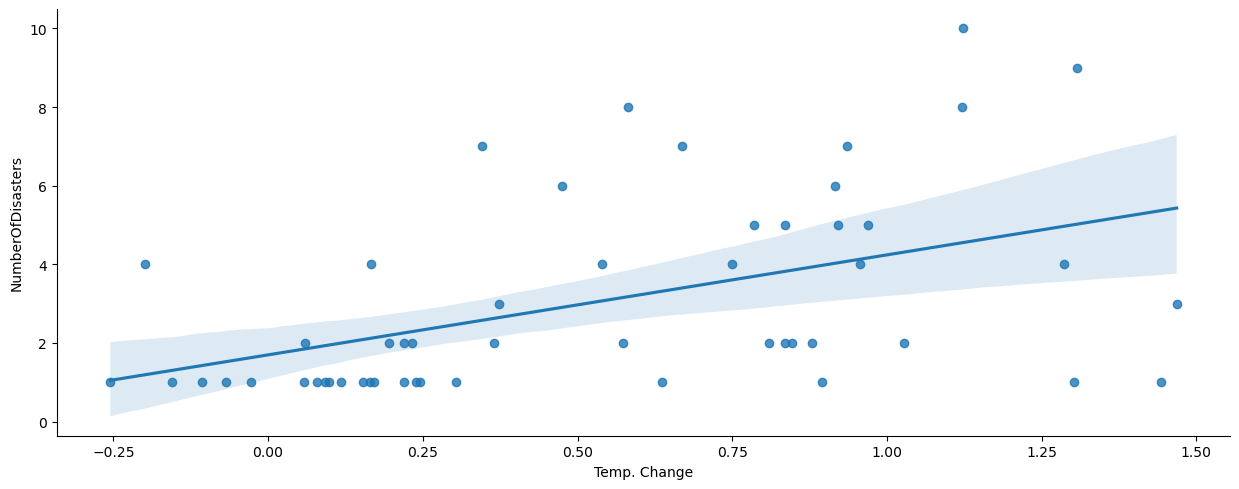

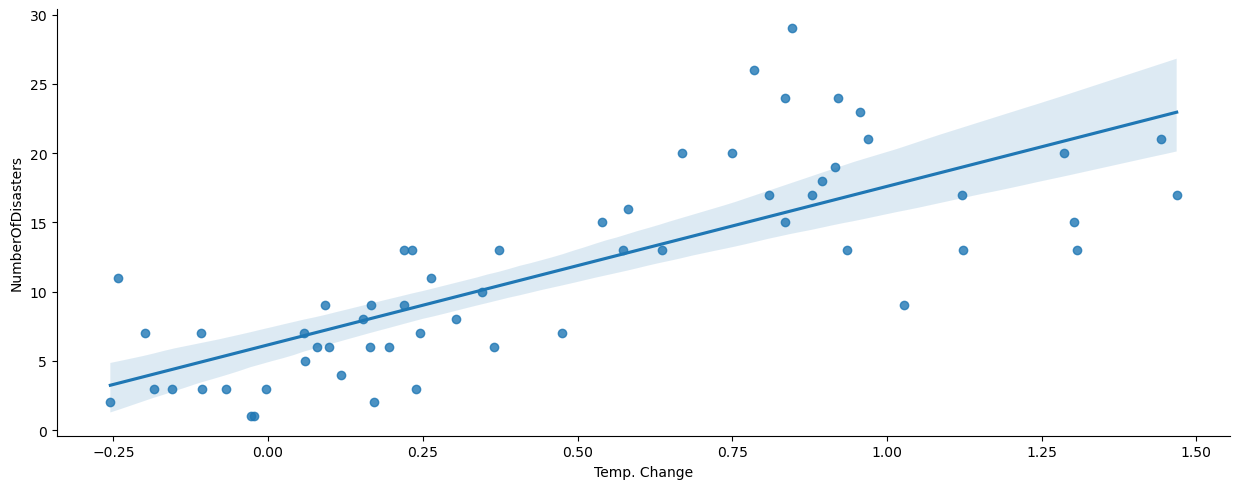

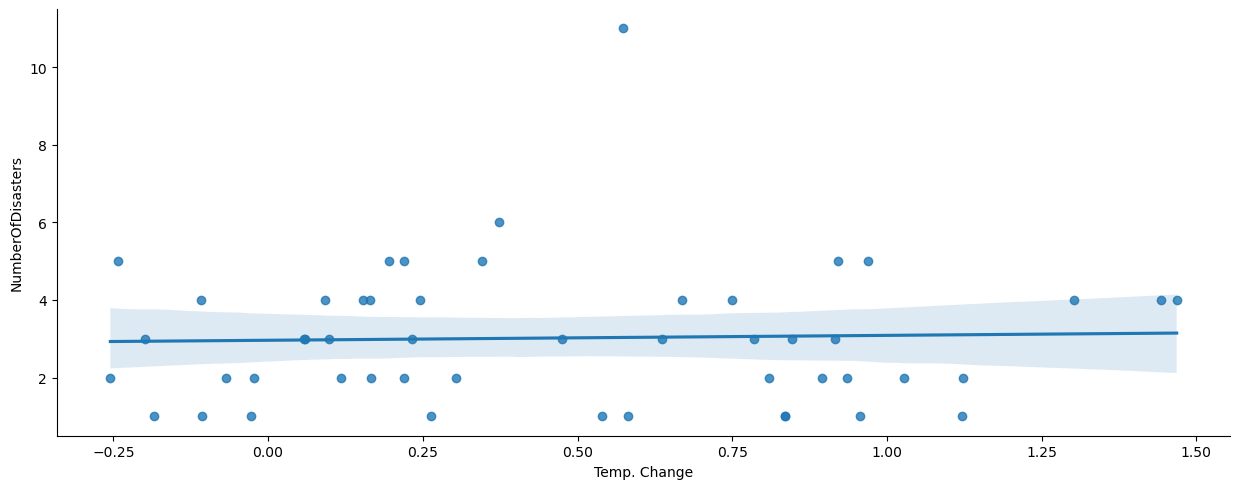

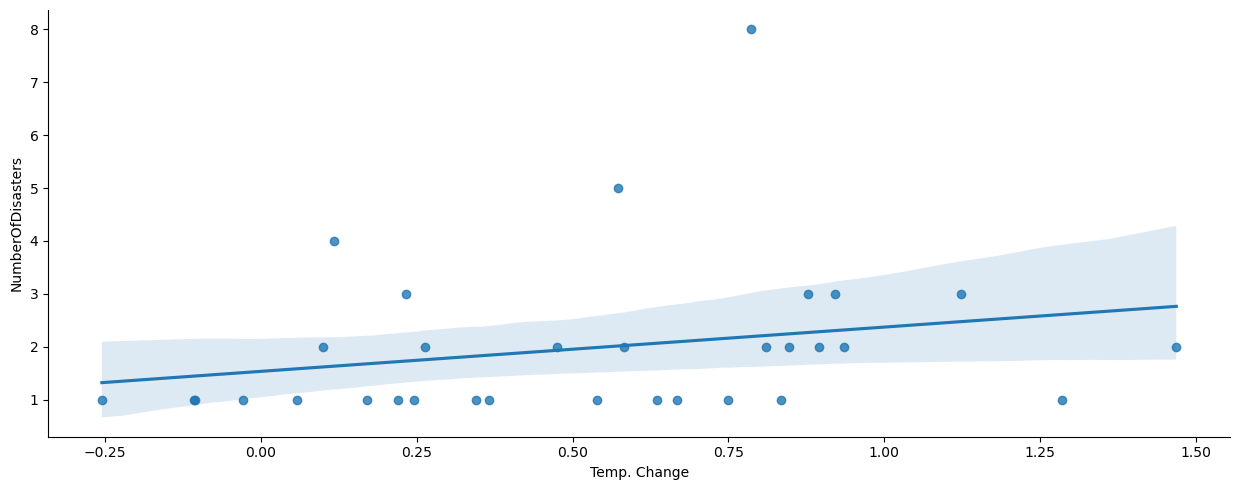

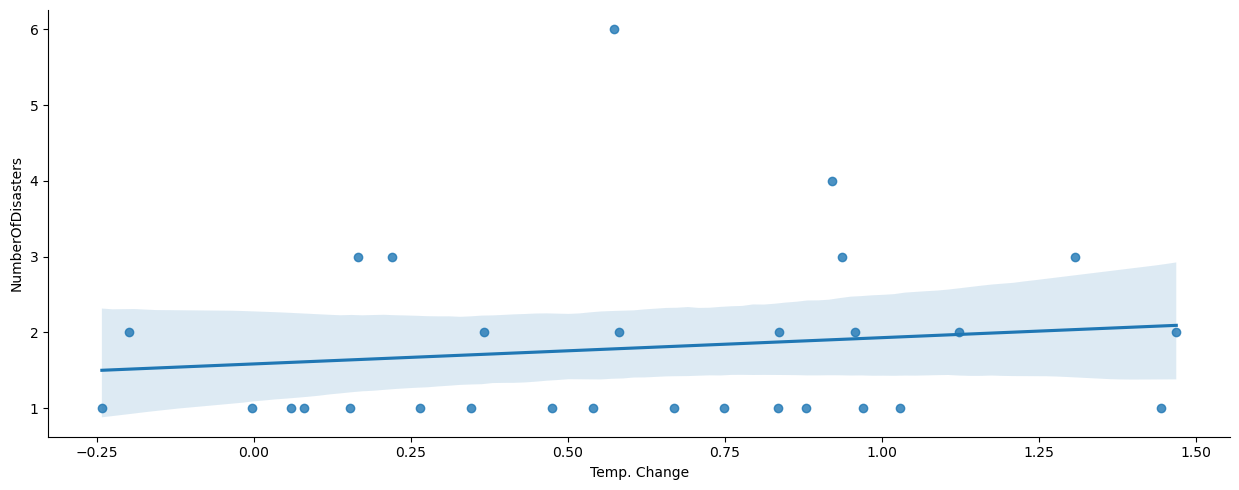

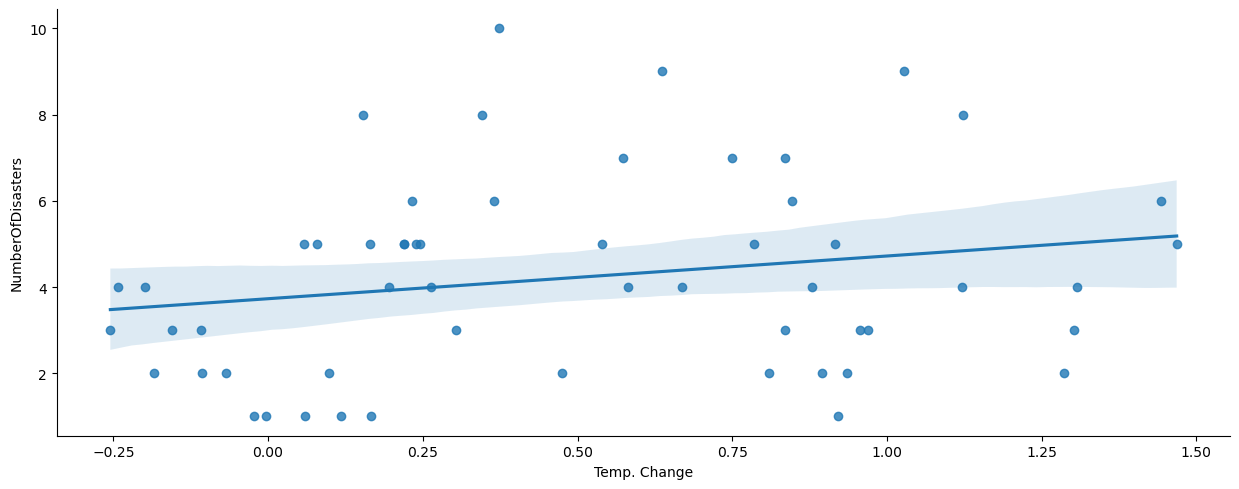

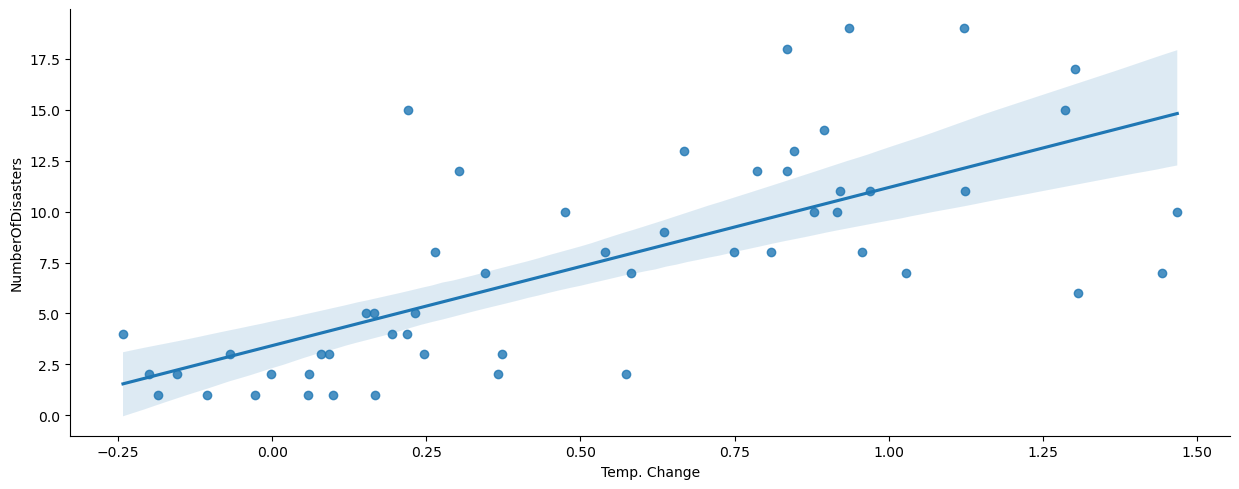

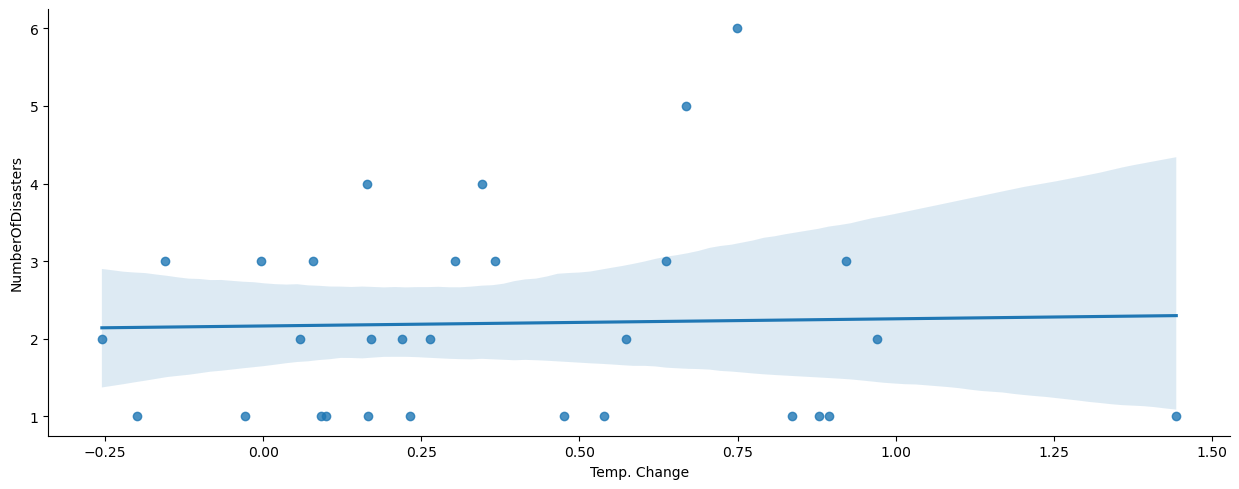

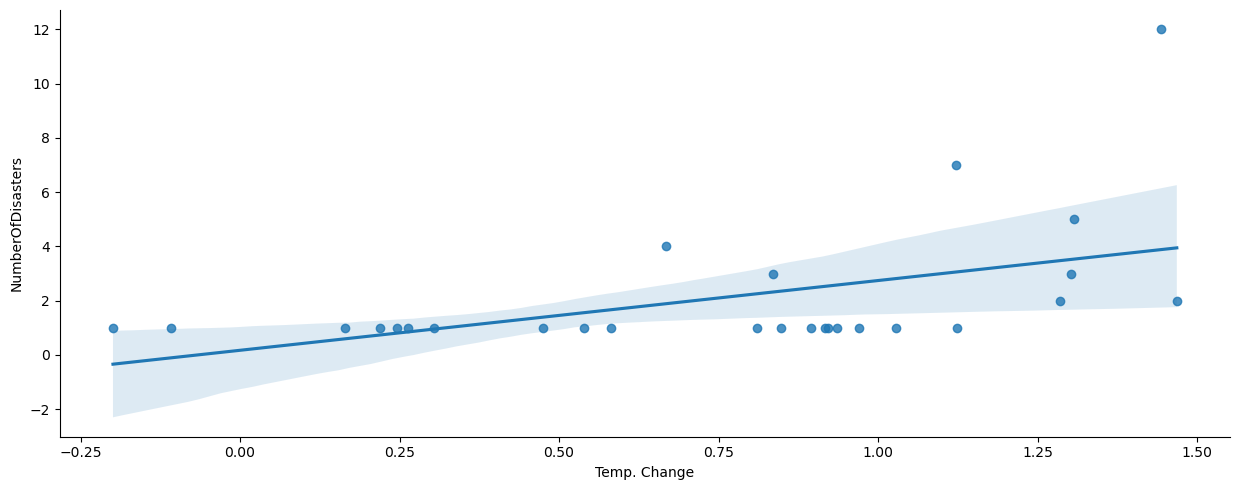

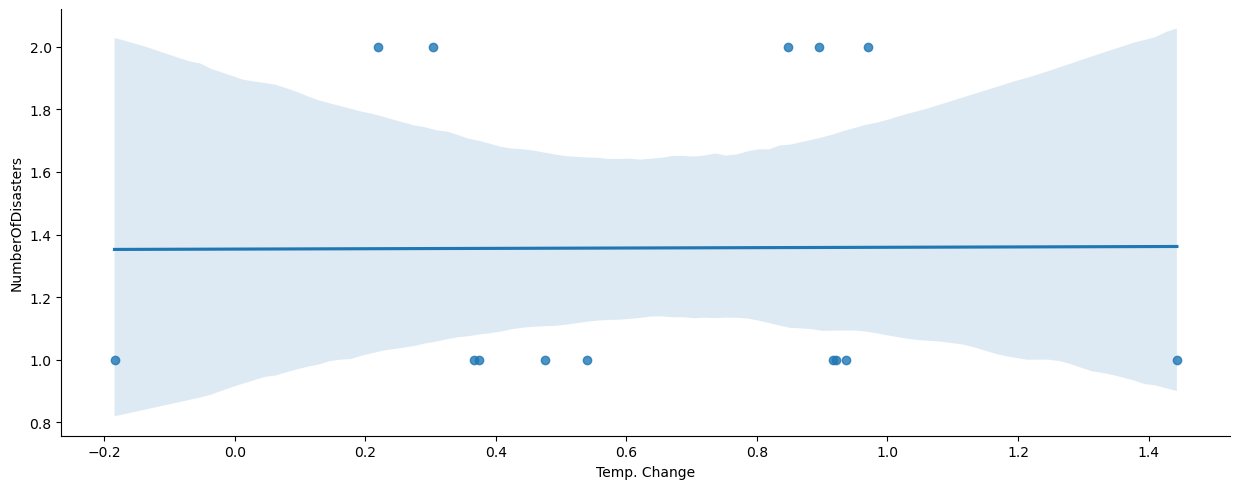

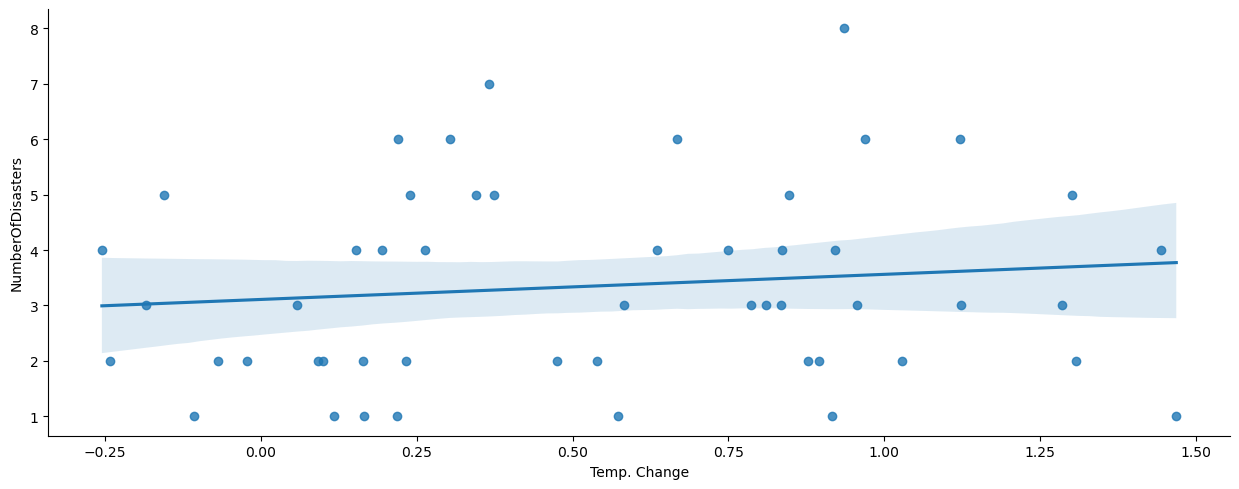

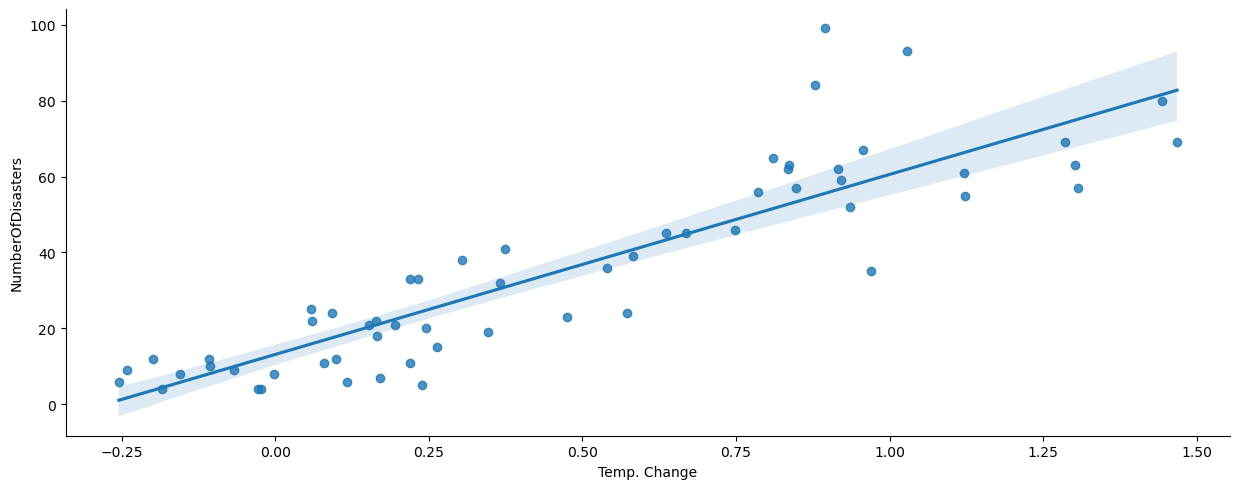

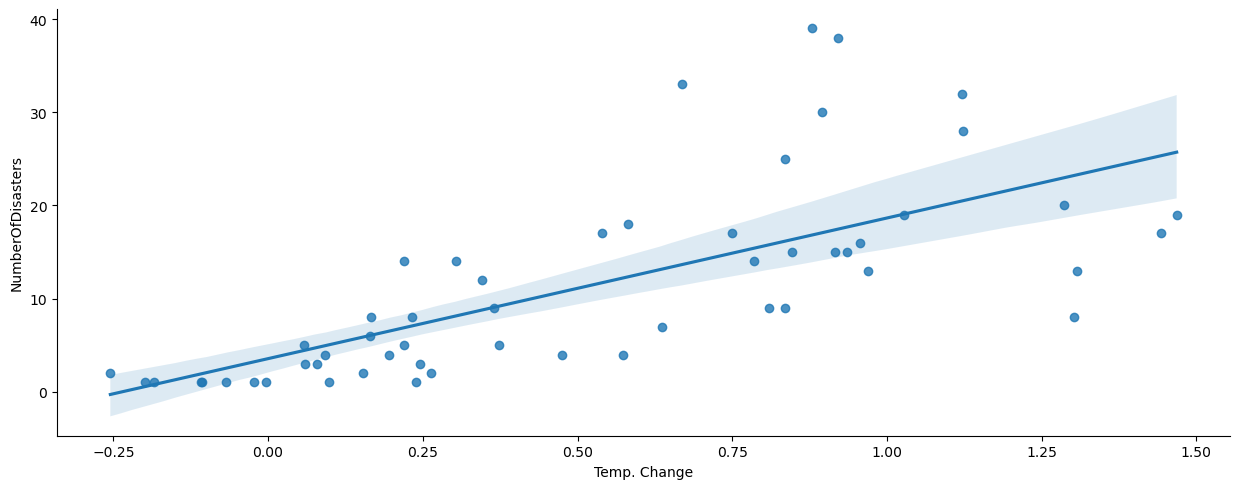

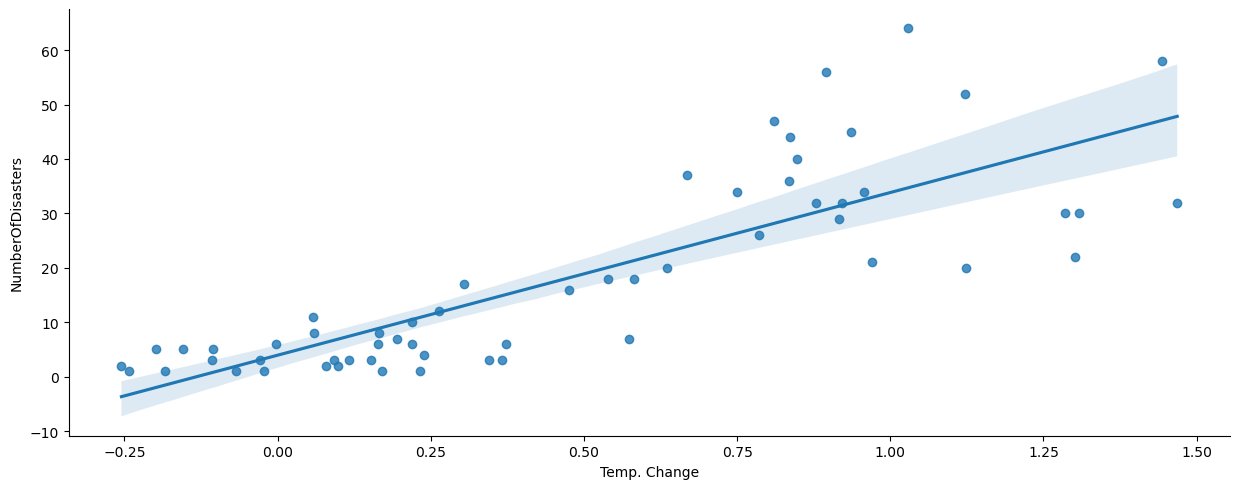

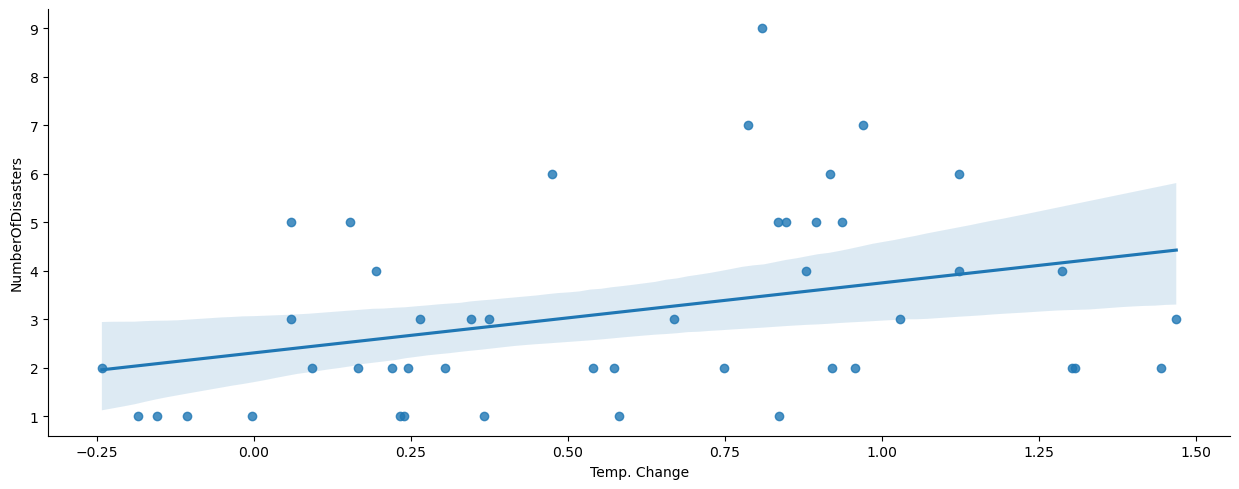

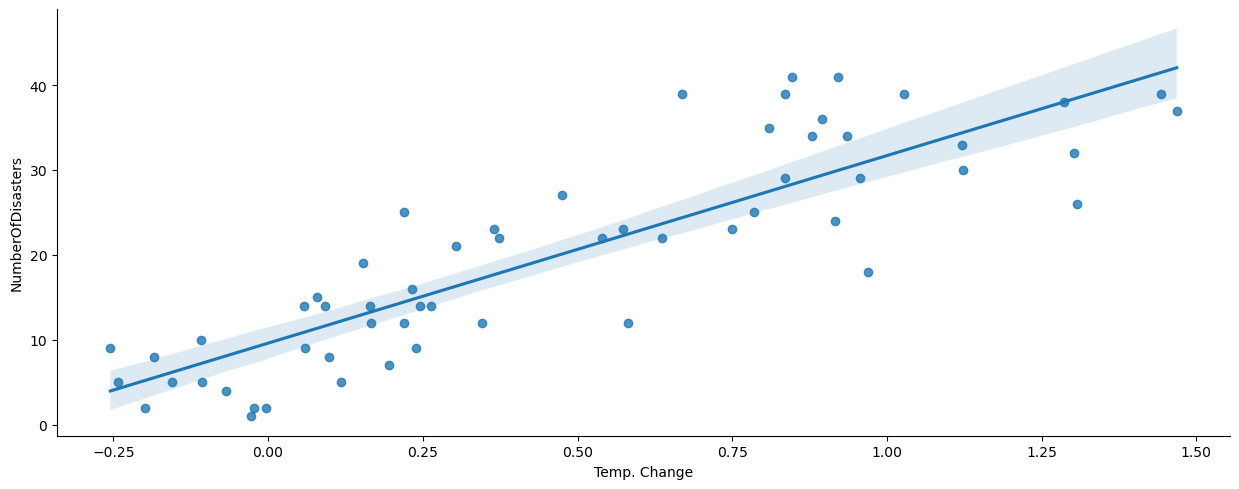

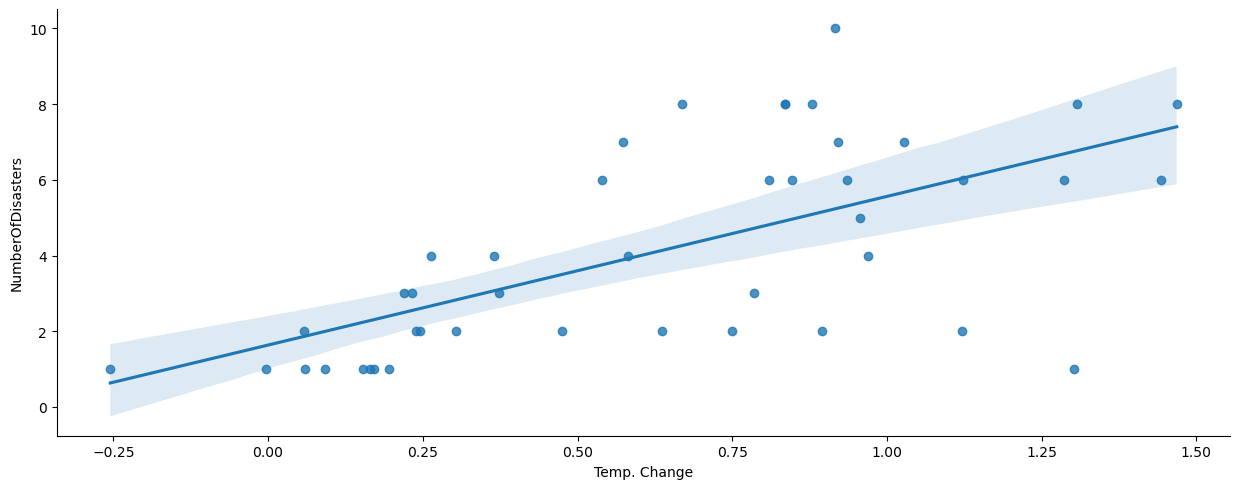

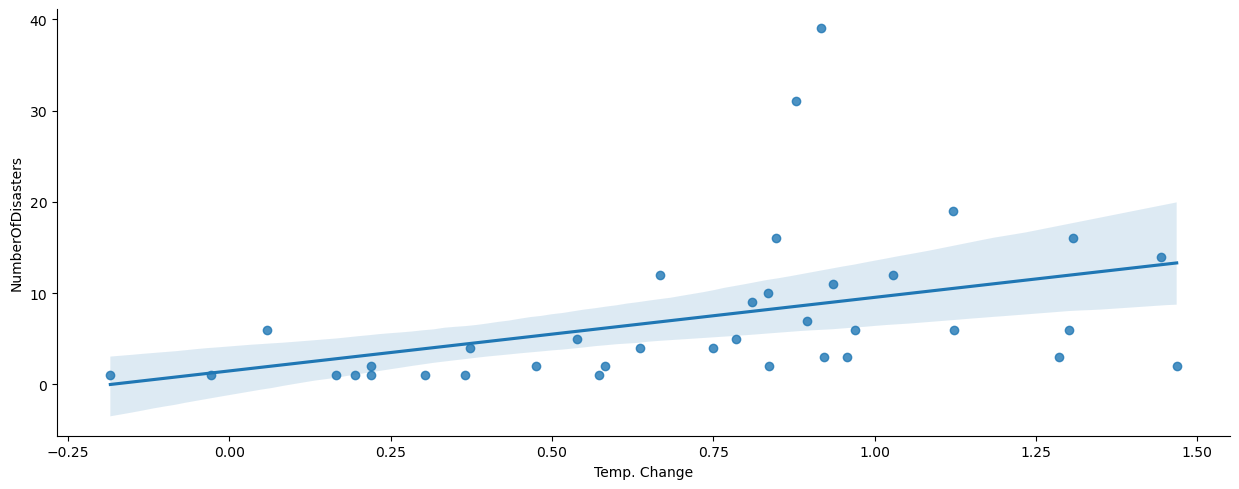

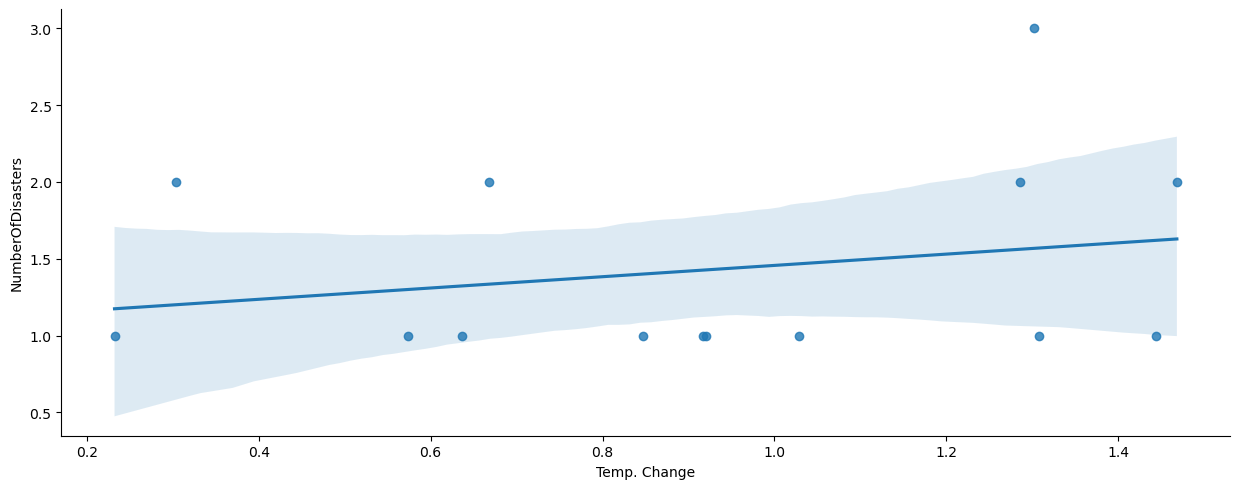

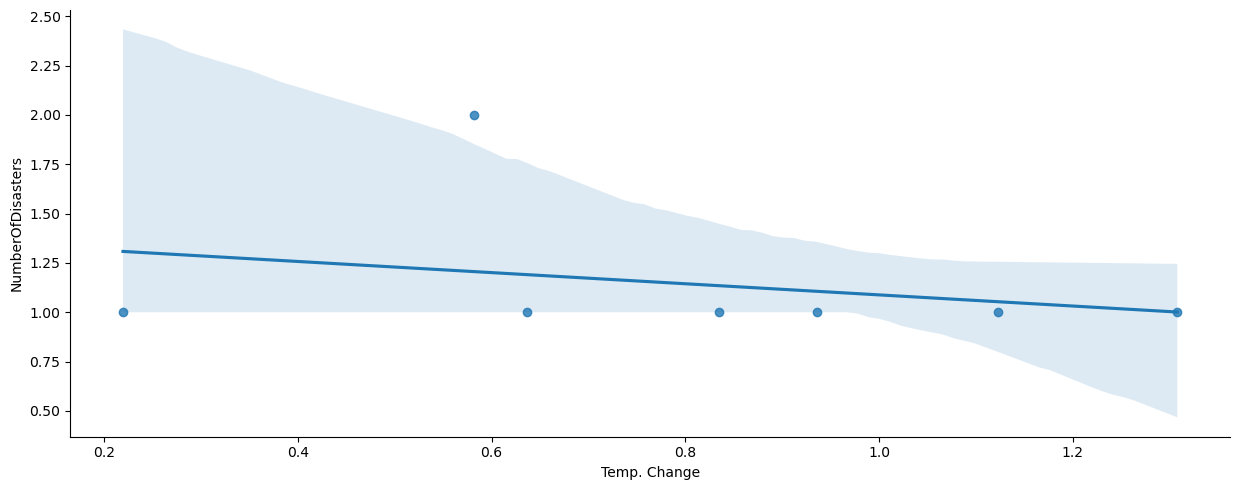

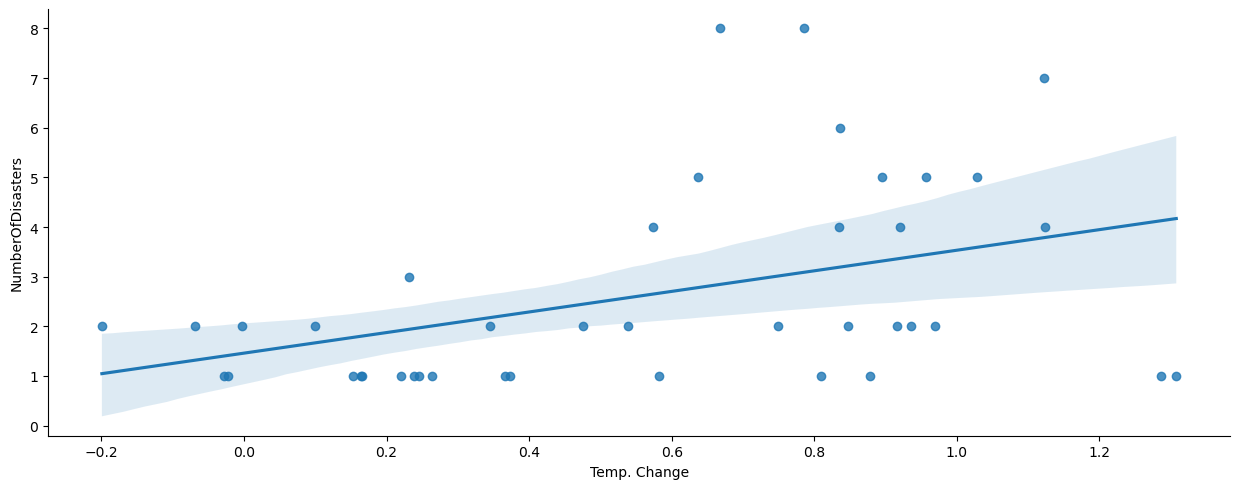

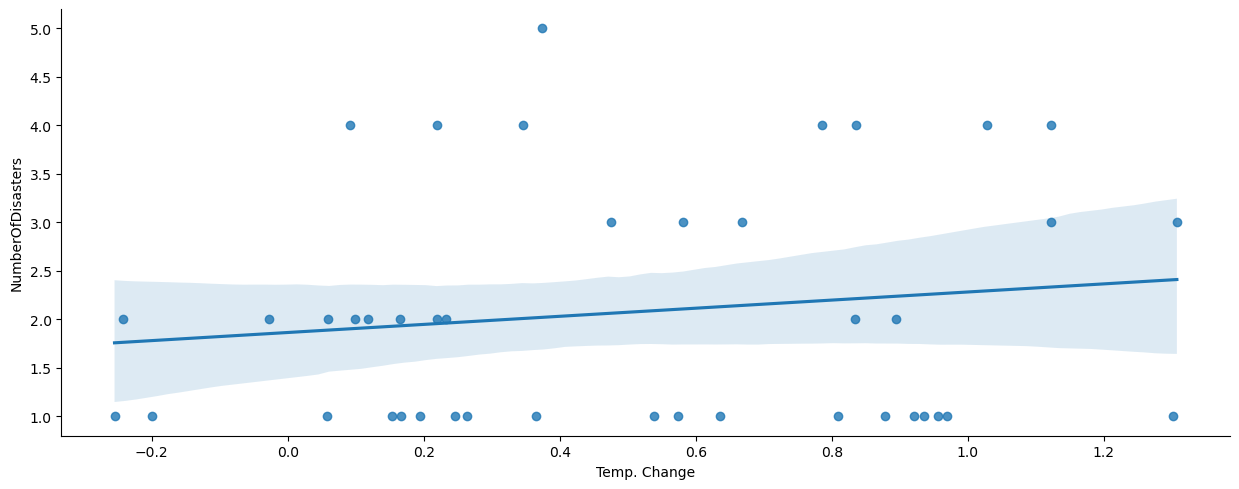

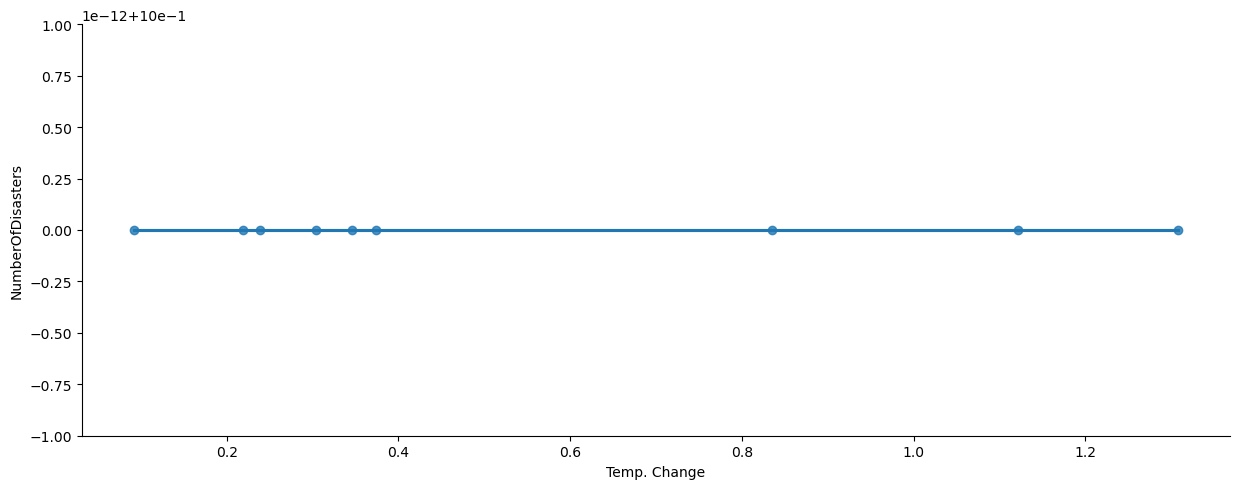

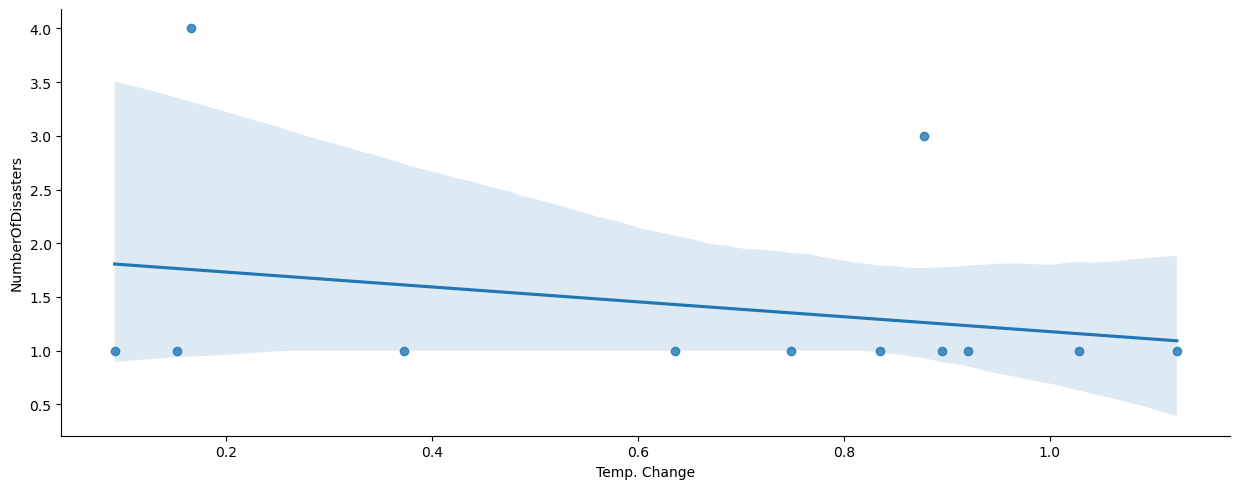

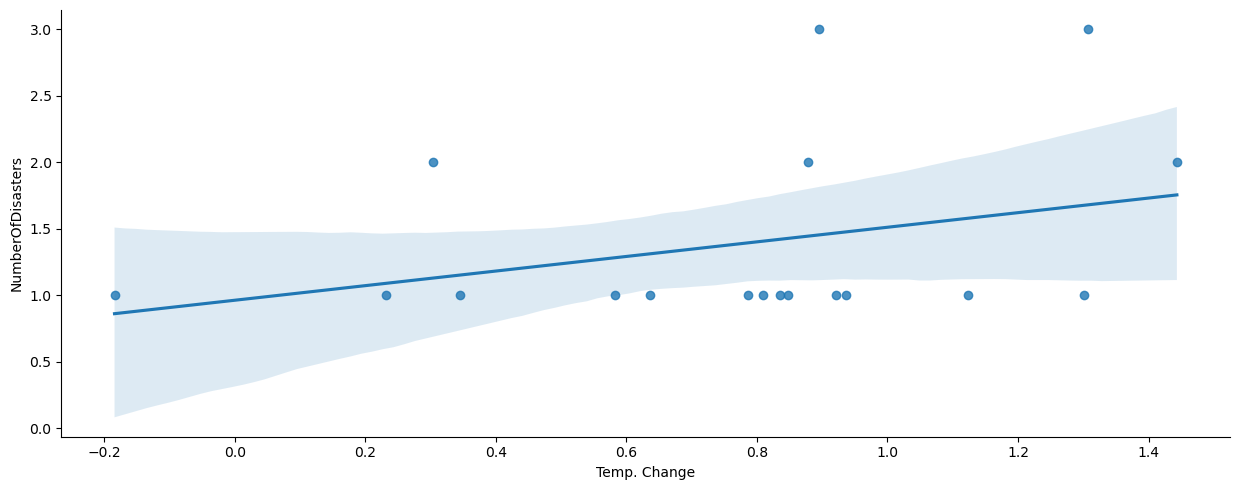

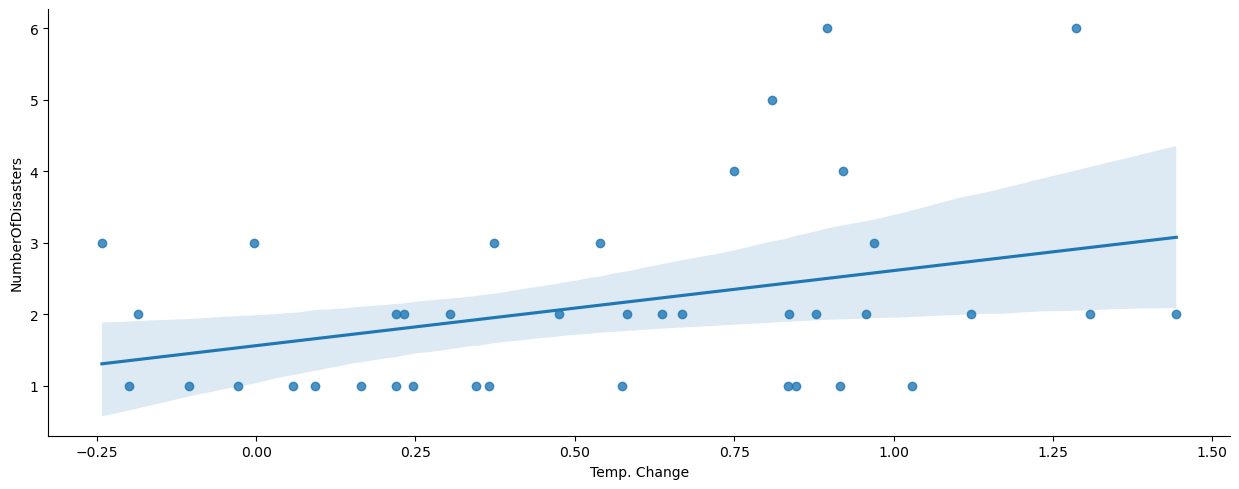

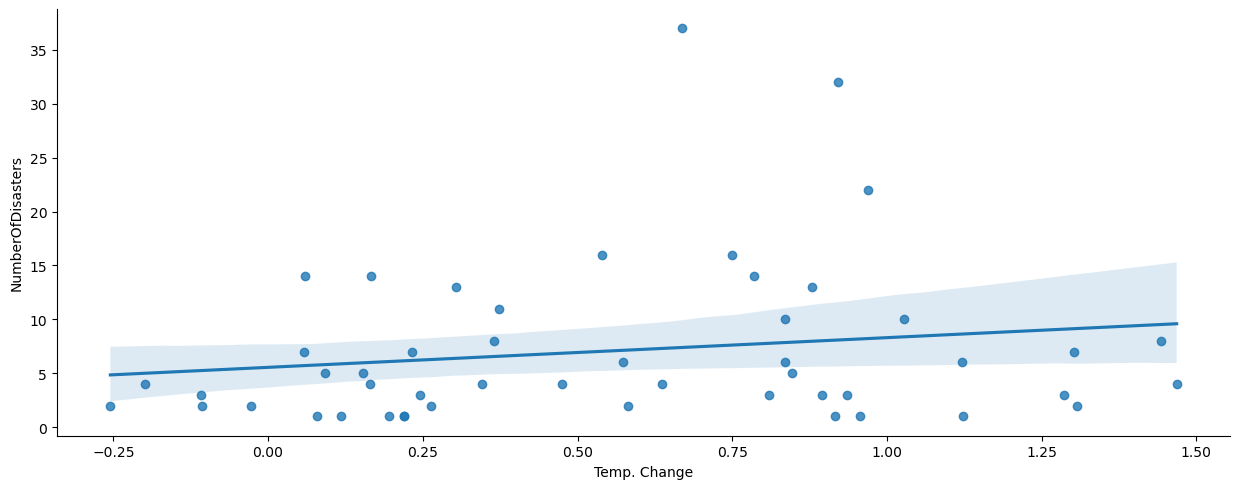

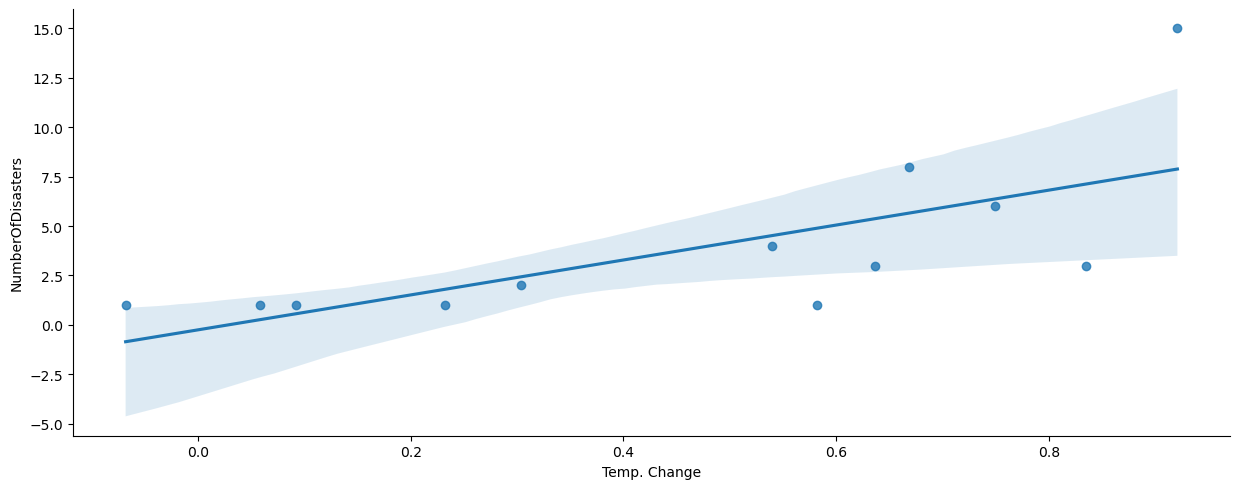

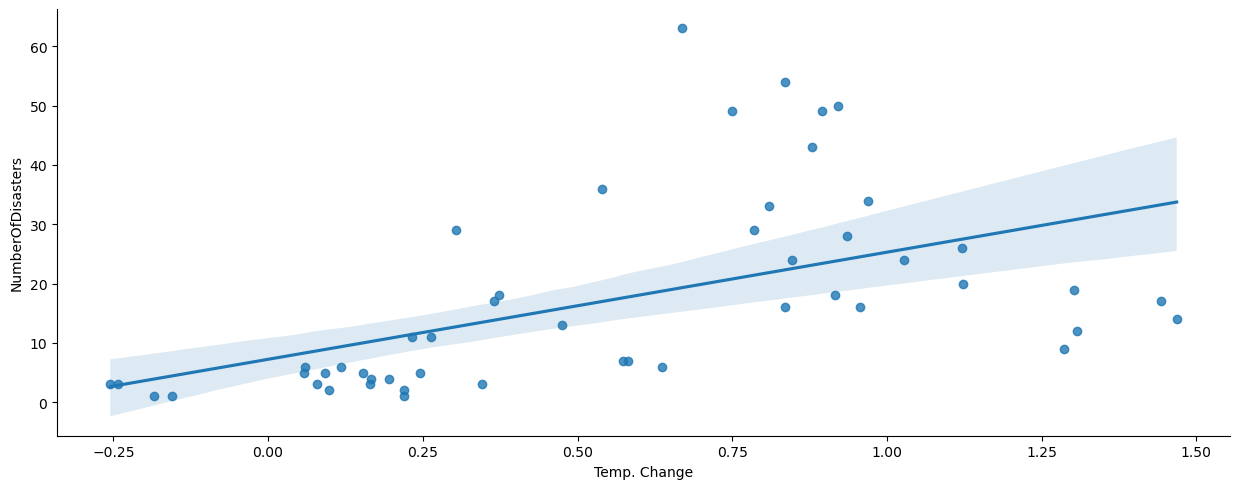

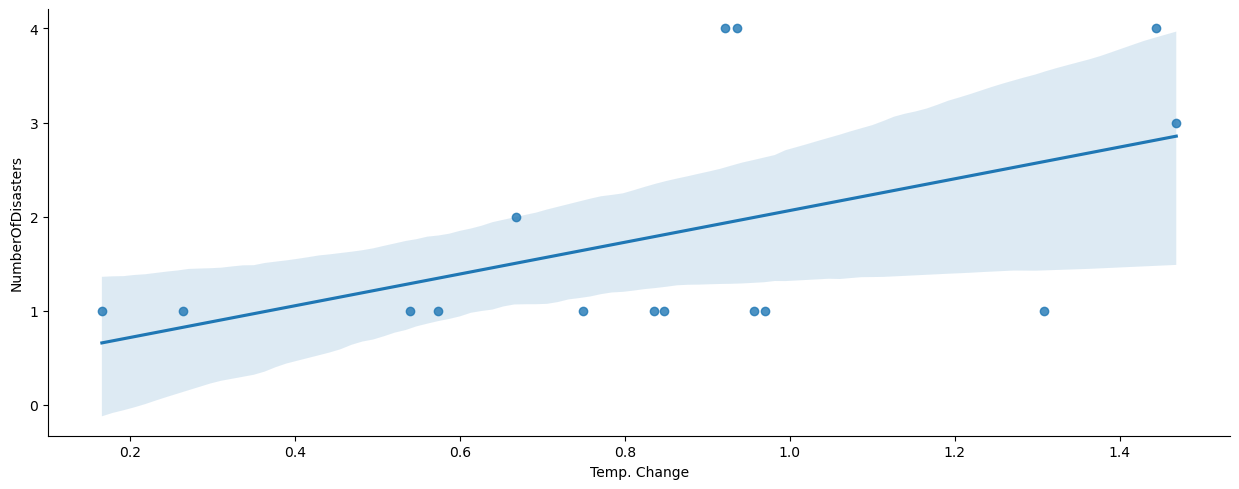

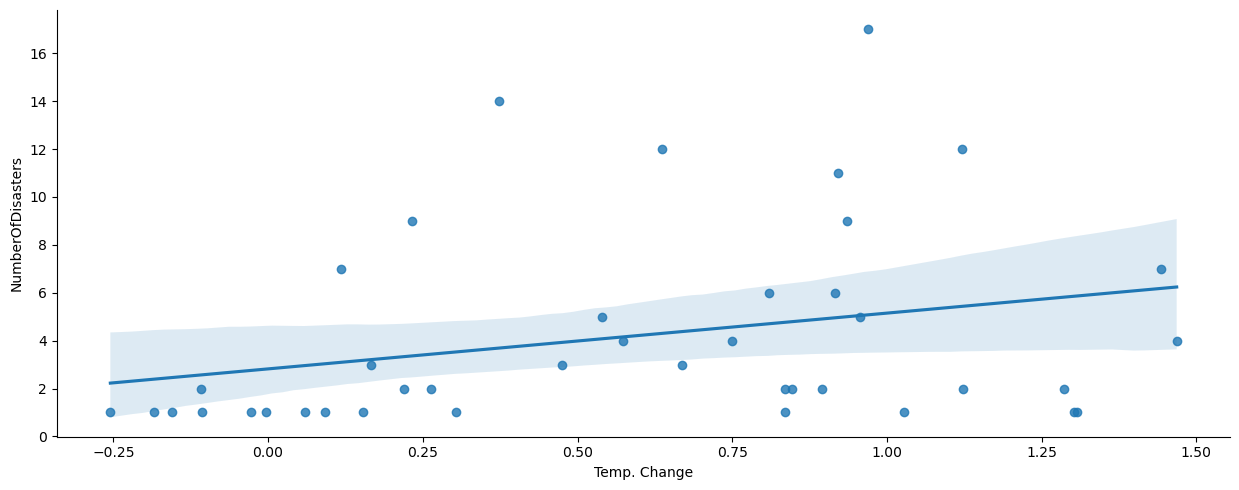

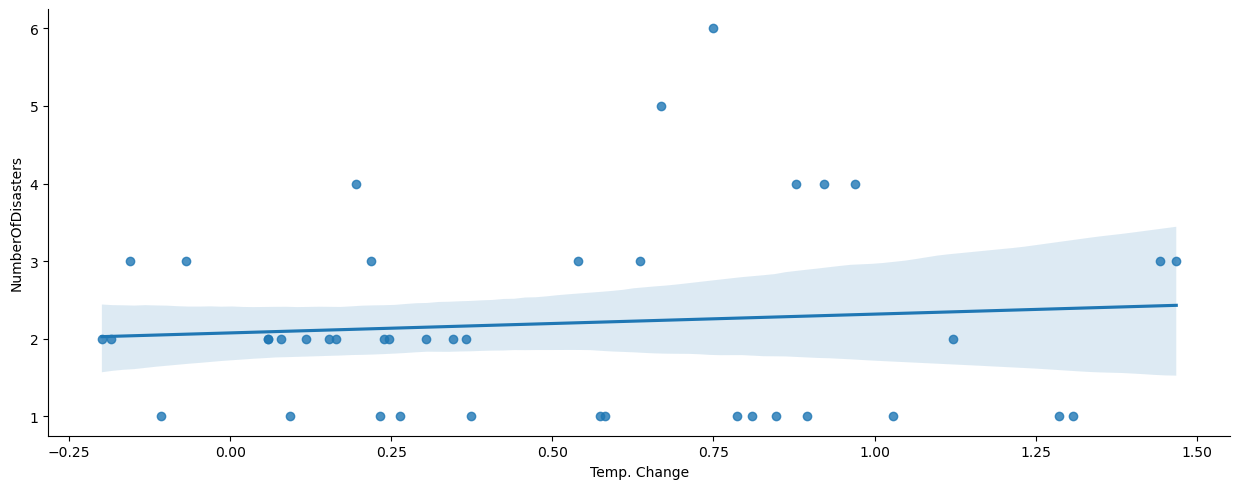

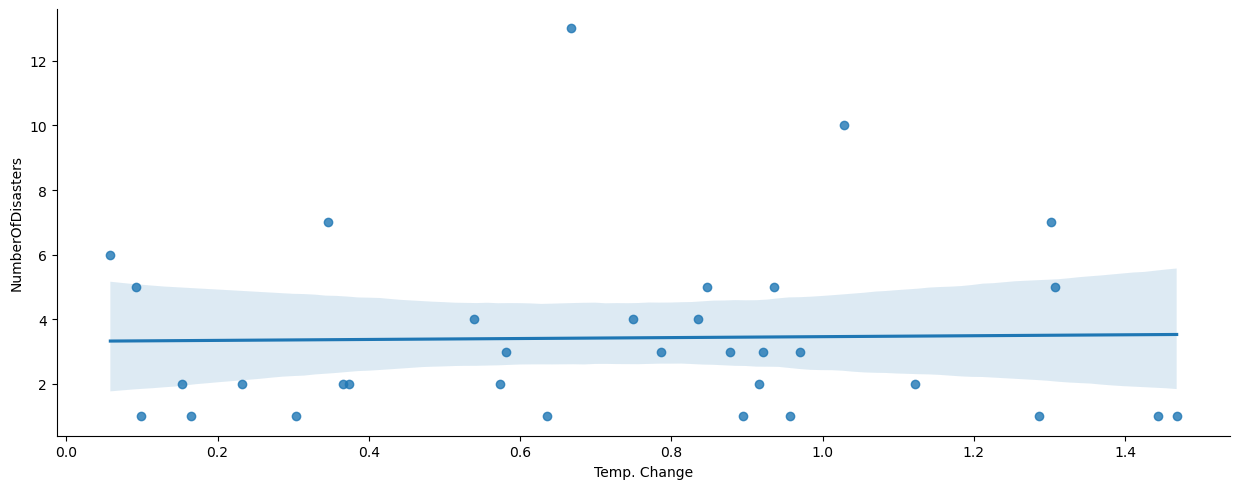

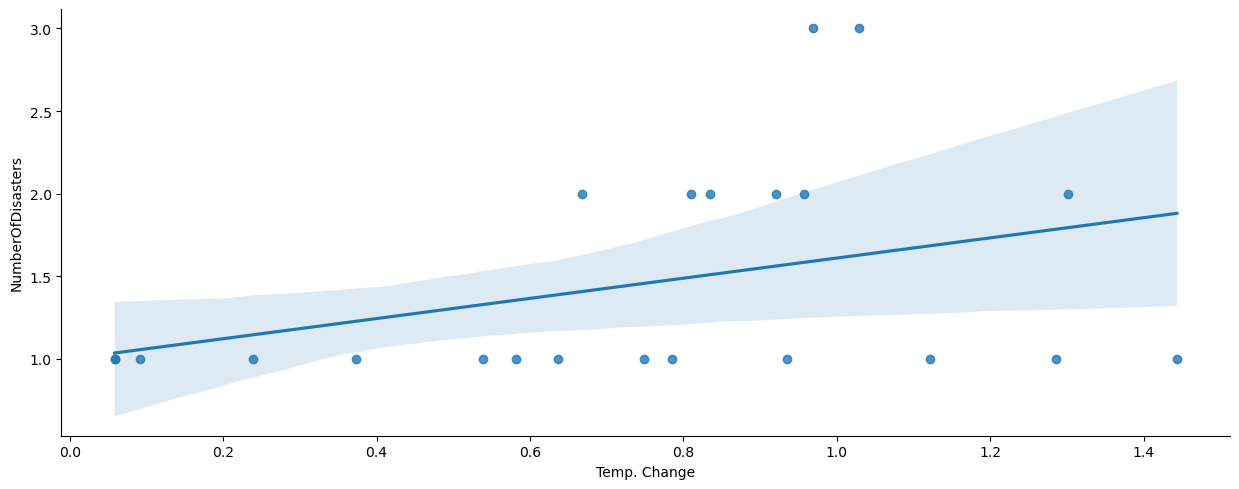

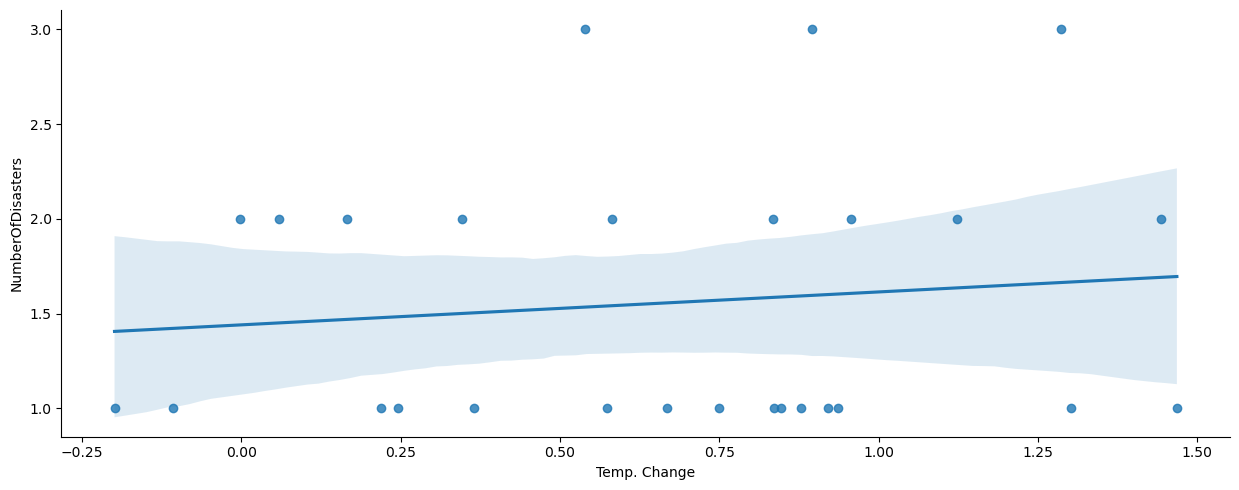

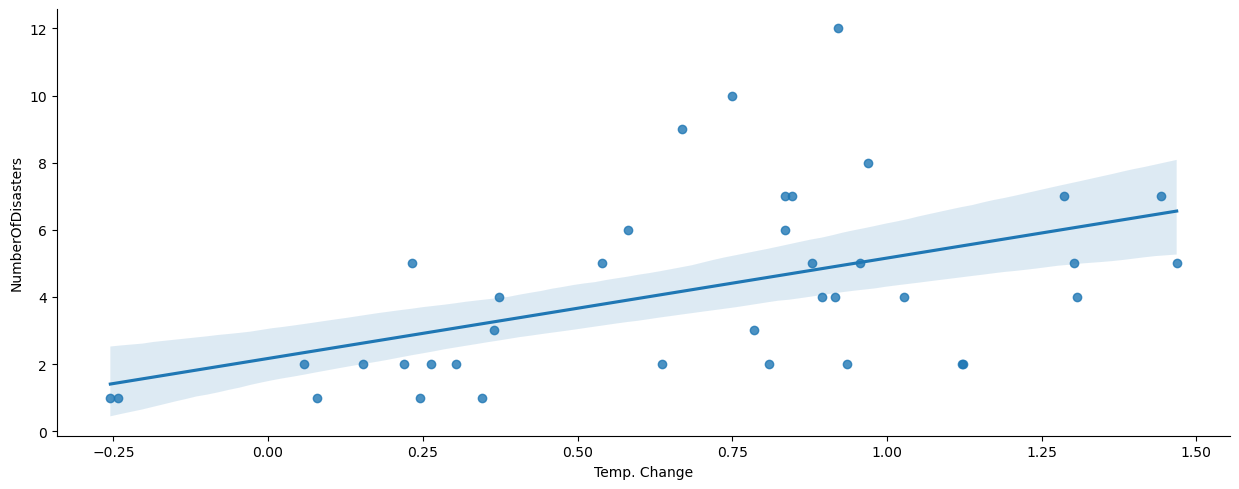

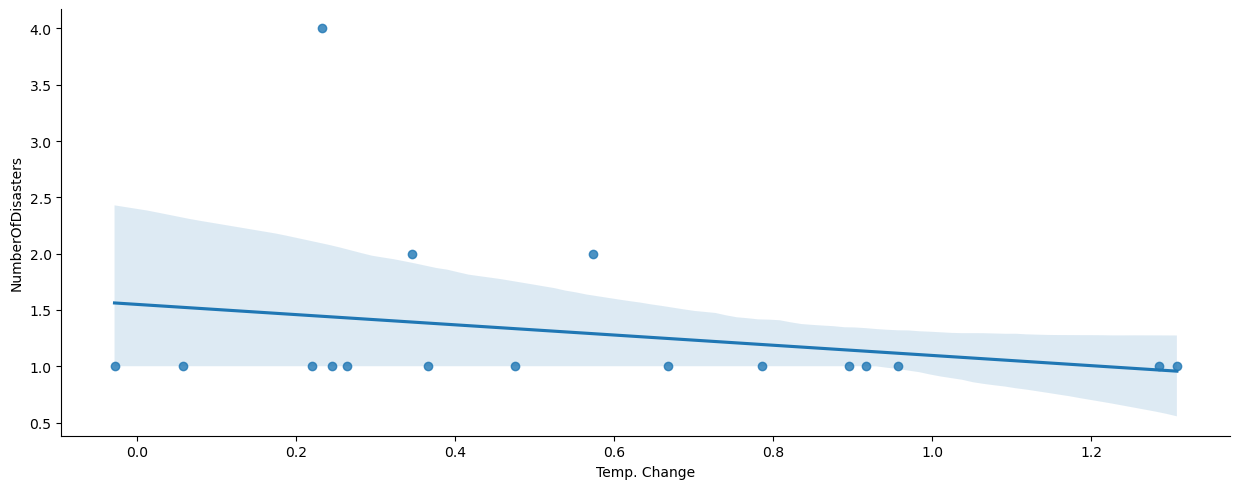

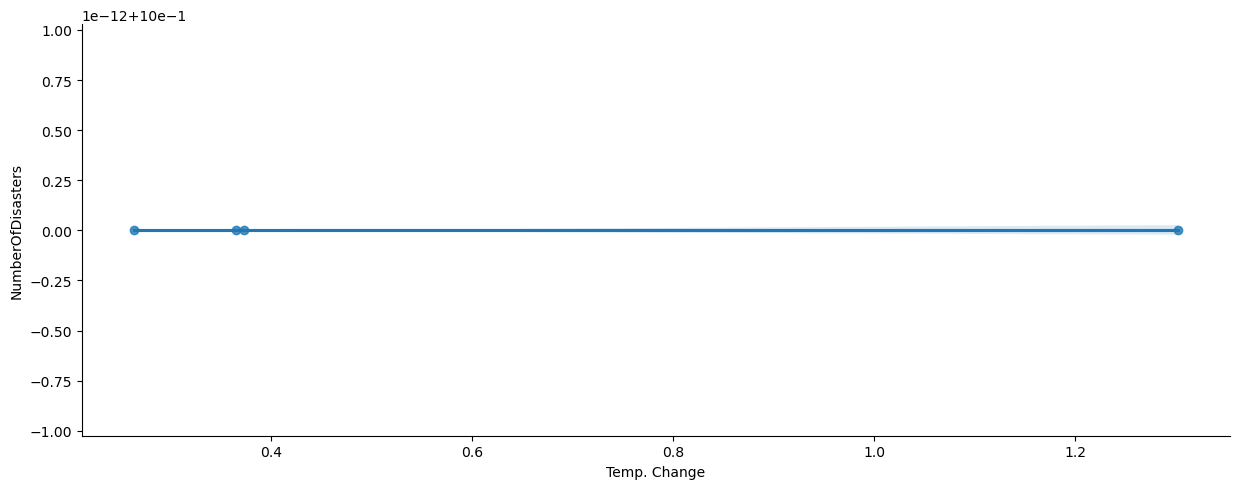

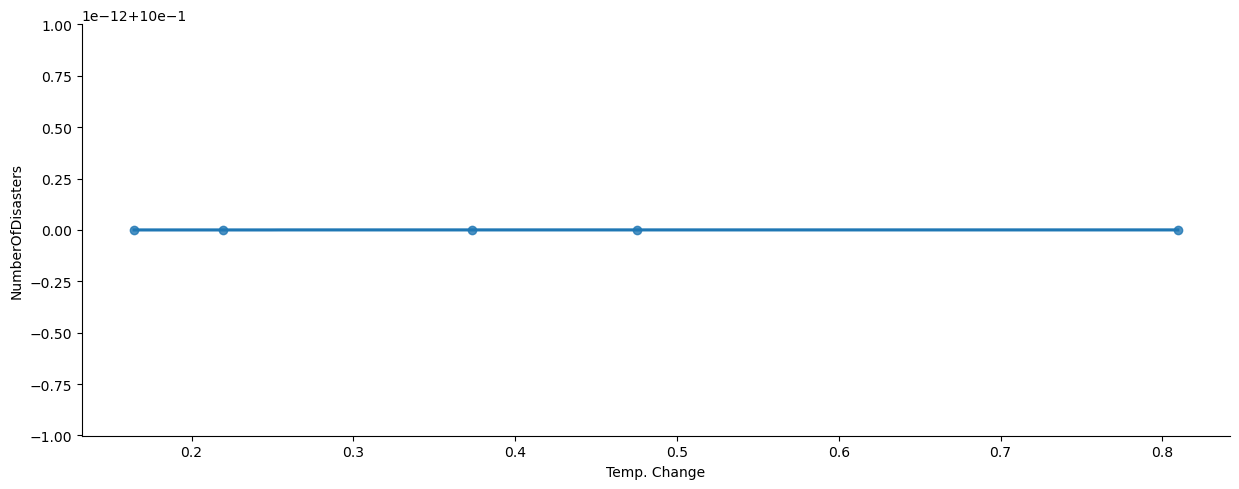

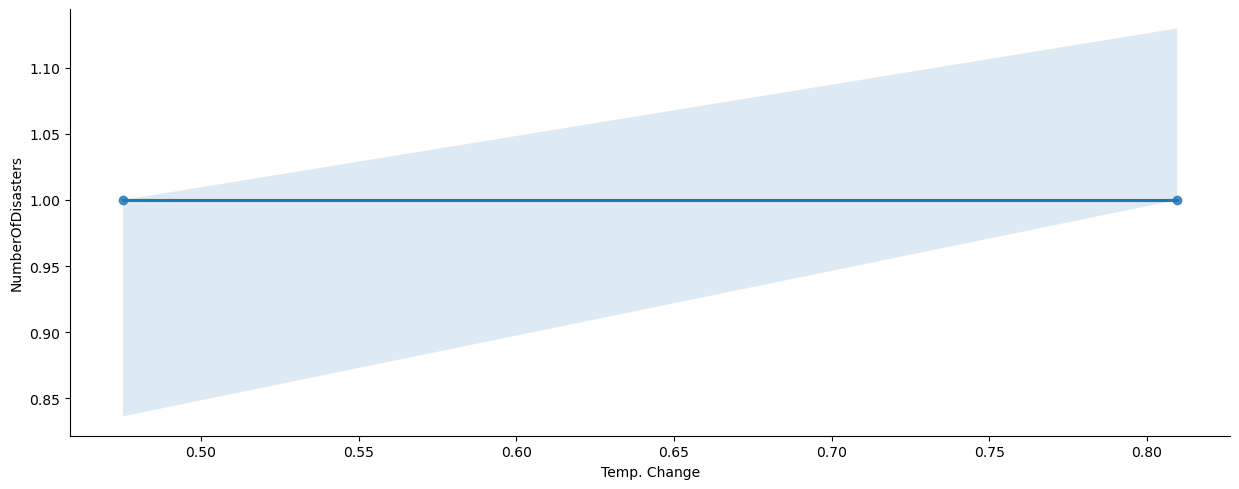

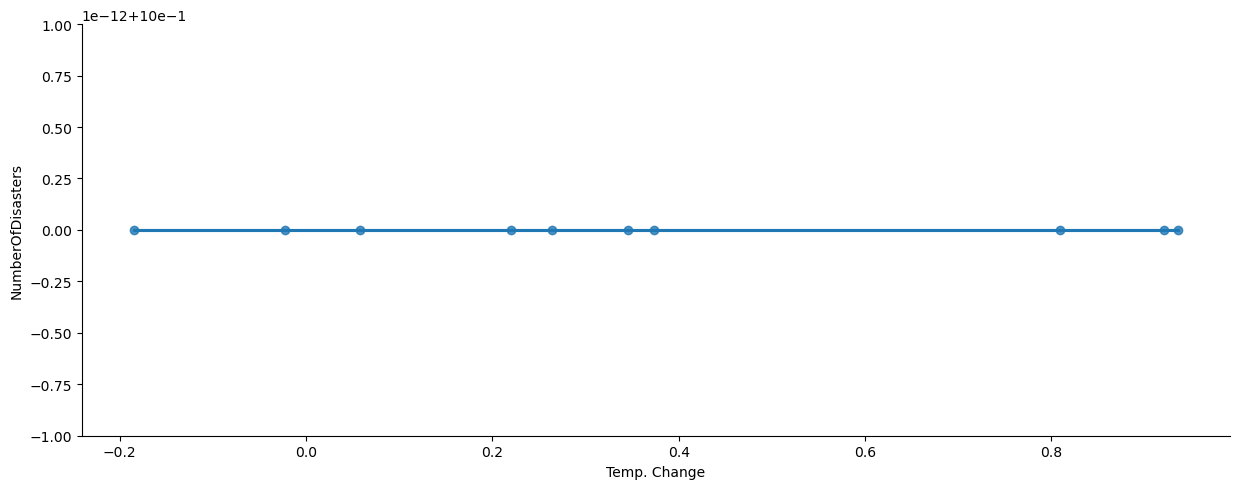

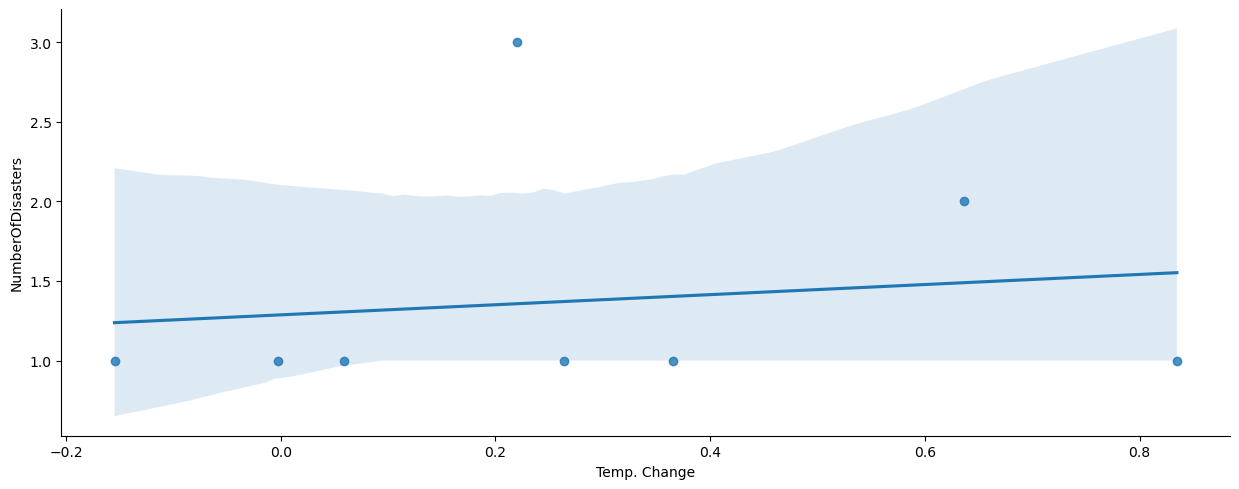

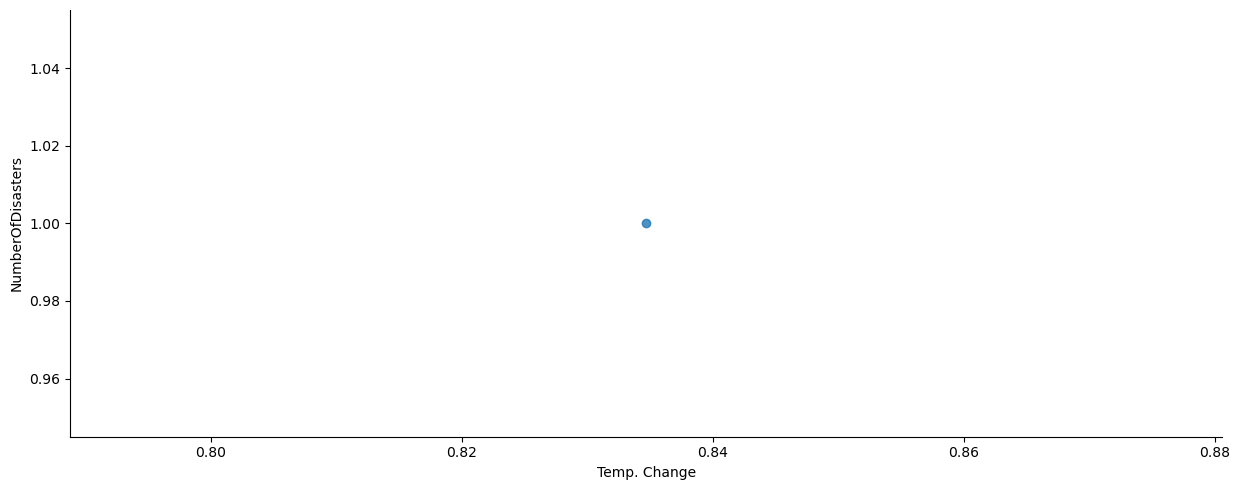

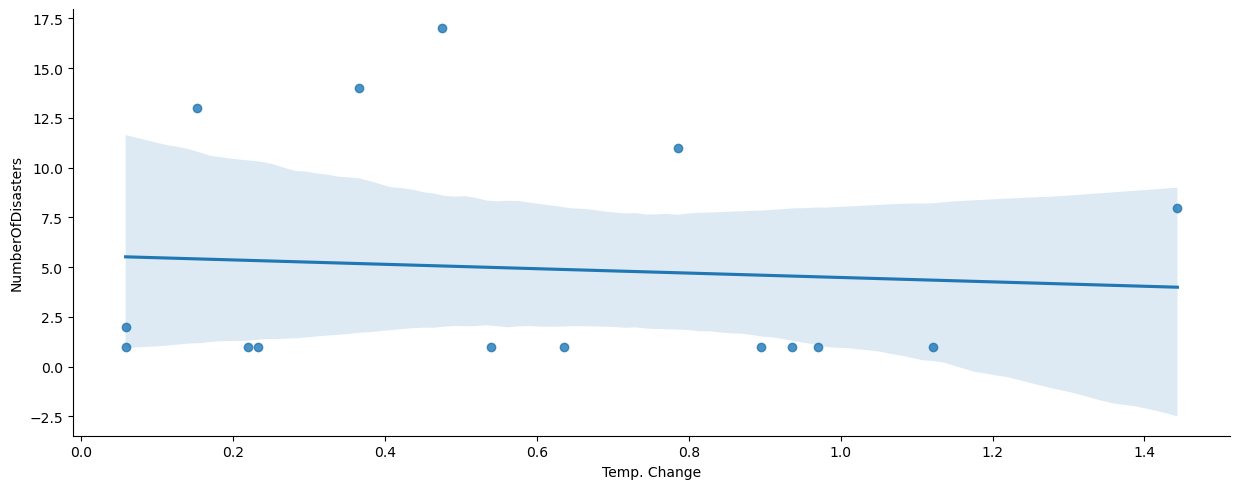

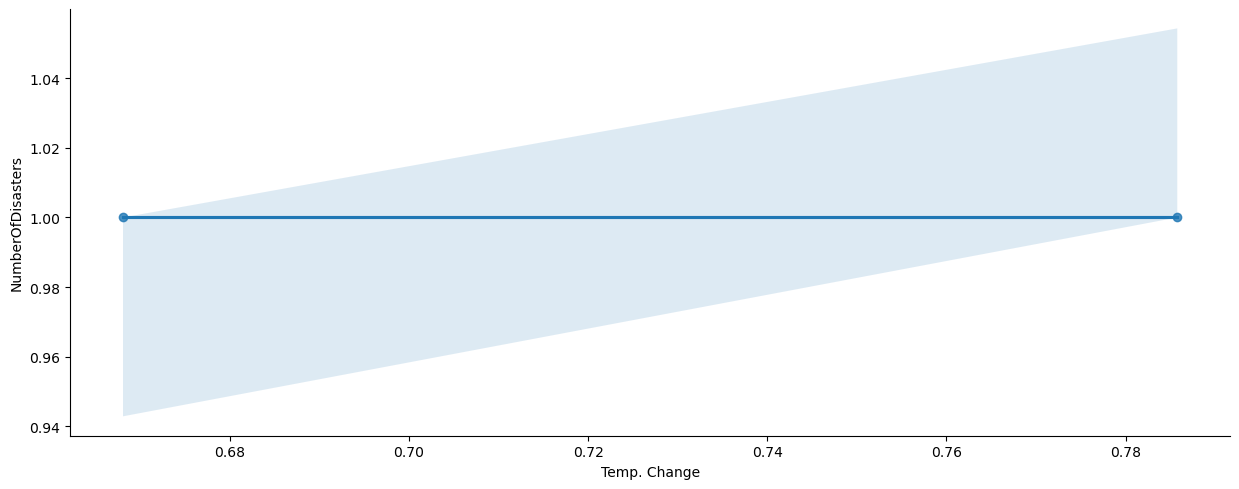

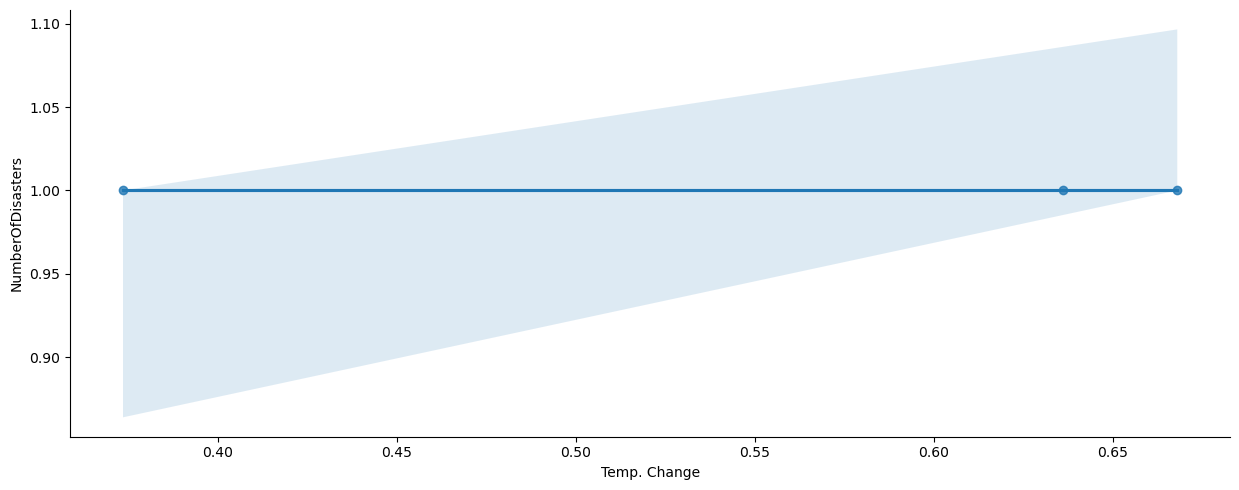

In [52]:
#sprawdzenie korelacji pomiędzy wzrotem temperatur a katastrofami (osobno dla każdej) w danym roku osobno dla każdego kontynentu 
#df_small = df_1961_2020_tableau.loc[(:, list_of_columns)]
Continent_list = ['Asia', 'Europe', 'Africa', 'Oceania', 'Americas']

DisasterType_list =['Storm', 'Drought', 'Earthquake', 'Landslide', 'Flood',
       'Extreme temperature ', 'Volcanic activity', 'Epidemic',
       'Wildfire', 'Mass movement (dry)', 'Insect infestation']

for disaster in DisasterType_list:
    df_small_1 = df_1961_2020_tableau.loc[(df_1961_2020_tableau['DisasterType']==disaster)]
    for continent in Continent_list:
        df_small_2 = df_small_1.loc[(df_small_1['Continent']==continent)]
        df_group = df_small_2.groupby(['Year'])[['DisasterGroup']].count() 
    #temp_change_world = temp_change.groupby(['Year'])[['Temp. Change']].mean()
    #df_small_1
    #temp_change_world
#print(df_small_2)

        disasters_temp_change = df_group.merge(temp_change_world, on = ['Year'] , how= 'right')
        disasters_temp_change = disasters_temp_change.rename(columns = {'DisasterGroup': 'NumberOfDisasters'})
        #disasters_temp_change
        correlation = round(disasters_temp_change.corr(), 3)
        print (disaster)
        print (continent)
        
        print (correlation)
        print (80*'-')
        sns.lmplot(data = disasters_temp_change, x = 'Temp. Change', y = 'NumberOfDisasters', height= 5, aspect=2.5)

In [53]:

df_1961_2020_tableau.loc[((df_1961_2020_tableau['DisasterType'] == 'Mass movement (dry)') & (df_1961_2020_tableau['Continent'] == 'Americas'))]

Year  Seq DisasterGroup DisasterSubgroup         DisasterType  \
565    1971   31       Natural      Geophysical  Mass movement (dry)   
1287   1962    2       Natural      Geophysical  Mass movement (dry)   
2267   1983  100       Natural      Geophysical  Mass movement (dry)   
3170   1985   71       Natural      Geophysical  Mass movement (dry)   
4119   1993  233       Natural      Geophysical  Mass movement (dry)   
4193   1989  575       Natural      Geophysical  Mass movement (dry)   
4434   1991   46       Natural      Geophysical  Mass movement (dry)   
7942   2002  437       Natural      Geophysical  Mass movement (dry)   
10603  2008  538       Natural      Geophysical  Mass movement (dry)   
10714  2009    3       Natural      Geophysical  Mass movement (dry)   

      DisasterSubtype EventName    Country  ISO            Region Continent  \
565         Landslide       NaN     Canada  CAN  Northern America  Americas   
1287        Landslide       NaN       Peru  PER     South America  Americas   
2267         Rockfall       NaN   Colombia  COL     South America  Americas   
3170        Landslide       NaN       Peru  PER     South America  Americas   
4119        Landslide       NaN   Colombia  COL     South America  Americas   
4193        Avalanche       NaN   Honduras  HND   Central America  Americas   
4434         Rockfall       NaN  Guatemala  GTM   Central America  Americas   
7942        Landslide       NaN    Ecuador  ECU     South America  Americas   
10603       Landslide       NaN   Colombia  COL     South America  Americas   
10714       Landslide       NaN  Guatemala  GTM   Central America  Americas   

                                                Location  StartYear  \
565                                Jean Vianney (Quebec)       1971   
1287                                     Ranrahirca area       1962   
2267                                             Gachala       1983   
3170                                    La Hoyada region       1985   
4119                                  Antioquia Province       1993   
4193                                                 NaN       1989   
4434                             Quetzaltenango province       1991   
7942   Santiago De Mendez municipality (Santiago dist...       2002   
10603             Medellin district (Antioquia province)       2008   
10714  Aquil Grande, Aquil Pequeno, Independencia, Za...       2009   

       StartMonth  StartDay  EndYear  EndMonth  EndDay  TotalDeaths  \
565           5.0       4.0     1971       5.0     4.0         31.0   
1287          1.0      10.0     1962       1.0    10.0       2000.0   
2267          7.0      28.0     1983       7.0    28.0        160.0   
3170          6.0      16.0     1985       6.0    16.0          NaN   
4119         12.0      18.0     1993      12.0    18.0         75.0   
4193          NaN       NaN     1989       NaN     NaN         10.0   
4434          1.0       6.0     1991       1.0     6.0         23.0   
7942          7.0      16.0     2002       7.0    16.0         60.0   
10603        11.0      16.0     2008      11.0    16.0         12.0   
10714         1.0       4.0     2009       1.0     4.0         36.0   

       NoAffected  TotalAffected  TotalDamages('000US$)  
565           NaN         1500.0                    NaN  
1287          NaN            NaN               200000.0  
2267          NaN            NaN                    NaN  
3170          NaN            NaN                    NaN  
4119       2250.0         2411.0                    NaN  
4193          NaN            NaN                    NaN  
4434          NaN            NaN                    NaN  
7942          NaN            NaN                    NaN  
10603         NaN            NaN                    NaN  
10714      2037.0         3028.0                    NaN

In [54]:
temp_change_world = temp_change.groupby(['Year'])[['Temp. Change']].mean()
temp_change_world

Temp. Change
Year              
1961      0.170922
1962     -0.022873
1963     -0.028361
1964     -0.106037
1965     -0.254930
1966      0.098972
1967     -0.107878
1968     -0.199280
1969      0.117191
1970      0.078967
1971     -0.184592
1972     -0.068146
1973      0.238936
1974     -0.154871
1975     -0.002631
1976     -0.241992
1977      0.166094
1978      0.059012
1979      0.219171
1980      0.245718
1981      0.194947
1982      0.164478
1983      0.345508
1984      0.092090
1985      0.058295
1986      0.152861
1987      0.365744
1988      0.475261
1989      0.263939
1990      0.573261
1991      0.373477
1992      0.232180
1993      0.219629
1994      0.581753
1995      0.636172
1996      0.303722
1997      0.539236
1998      0.969641
1999      0.749031
2000      0.668065
2001      0.834709
2002      0.920863
2003      0.847217
2004      0.785777
2005      0.878186
2006      0.894813
2007      1.028390
2008      0.809573
2009      0.935700
2010      1.122019
2011      0.835892
2012      0.916589
2013      0.956744
2014      1.123158
2015      1.285736
2016      1.468284
2017      1.301789
2018      1.307709
2019      1.443481

In [56]:

(df_1961_2020_tableau.loc[(df_1961_2020_tableau['DisasterType']=='Storm')]['DisasterSubtype']).unique()


array(['Tropical cyclone', nan, 'Convective storm',
       'Extra-tropical storm'], dtype=object)

In [57]:
(df_1961_2020_tableau.loc[(df_1961_2020_tableau['DisasterType']=='Epidemic')]['EventName']).unique()

array([nan, 'Polio', 'Bubonic', 'Meningitis, measles', 'Yellow fever',
       'Bolivian haemorrhagic fever', 'Equine encephalitis', 'Cholera',
       'Typhoid', 'Encephalitis', 'Cerebral meningitis',
       'Ebola haemorrhagic fever', 'Dengue fever', 'Influenza',
       'Swine fever', 'Dysentery', 'Gastroenteritis', 'Salmonella',
       'Legionellosis', 'Water-borne diseases', 'Rotavirus',
       'Encaphalitis', 'Cerebro spinal', 'Plague', 'Dengue', 'Typhus',
       'Neuromyelopathy', 'Lassa fever', 'Listeria',
       'Meningococcal disease', 'Cryptosporidiosis',
       'Cerebrospinal meningitis', 'Shigellosis', 'Bloody diarrhoea',
       'Acute haemorrhagic fever syndrome', 'Ebola', 'Pneumonic',
       'Viral meningitis', 'Dengue/dengue haemorrhagic fever',
       'Meningococcal meningitis', 'Japanese encephalities',
       'Campylobacter', 'Rift Valley fever', 'Dengue haemorrhagic fever',
       'Coxsackievirus', 'Dengue and Dengue Haemorrhagic Fever',
       'Fatal myocarditis', 'Ja

In [58]:
df_1961_2020_tableau.groupby('Country')[['DisasterGroup']].count().sort_values('DisasterGroup')

DisasterGroup
Country                                                    
Saint Martin (French Part)                                1
United Arab Emirates (the)                                1
Saint Barthélemy                                          1
Saint Helena, Ascension and Tristan da Cunha              1
Bahrain                                                   1
...                                                     ...
Indonesia                                               531
Philippines (the)                                       618
India                                                   682
China                                                   900
United States of America (the)                          958

[228 rows x 1 columns]